<a href="https://colab.research.google.com/github/Rochakr4/CAPSTONE-PROJECT-3--Cardiovascular-Risk-Prediction/blob/main/CAPSTONE_PROJECT_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [1]:
#libraries used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer


# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting drive to google account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

# Data preprocessing

In [4]:
data_df.head()#how does the data set looklike

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
data_df=data_df.drop(columns=['id'])#'id' feature has no relevence in this analysis so droping it from further analysis

In [6]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [7]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [8]:
#Running describe function
data_df[num_features].describe()

age      totChol   cigsPerDay       sysBP        diaBP  \
count  3390.000000  3352.000000  3368.000000  3390.00000  3390.000000   
mean     49.542183   237.074284     9.069477   132.60118    82.883038   
std       8.592878    45.247430    11.879078    22.29203    12.023581   
min      32.000000   107.000000     0.000000    83.50000    48.000000   
25%      42.000000   206.000000     0.000000   117.00000    74.500000   
50%      49.000000   234.000000     0.000000   128.50000    82.000000   
75%      56.000000   264.000000    20.000000   144.00000    90.000000   
max      70.000000   696.000000    70.000000   295.00000   142.500000   

               BMI    heartRate      glucose  
count  3376.000000  3389.000000  3086.000000  
mean     25.794964    75.977279    82.086520  
std       4.115449    11.971868    24.244753  
min      15.960000    45.000000    40.000000  
25%      23.020000    68.000000    71.000000  
50%      25.380000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

In [9]:
#label Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

## NaN value handling

In [10]:
#Checking Nan Value count
data_df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Nan value handling, simple imputer("most_frequent") for categorical features and Knn imputer for numerical features is implemented.

In [11]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [12]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

## Distribution and outlier analysis

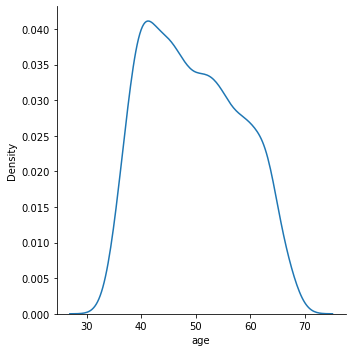

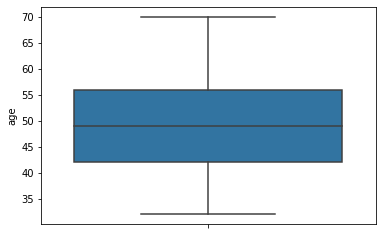

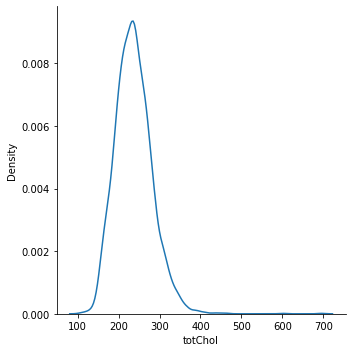

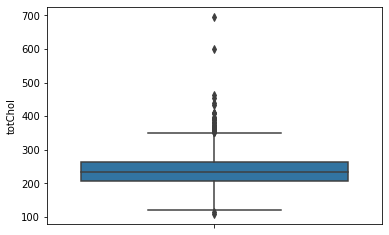

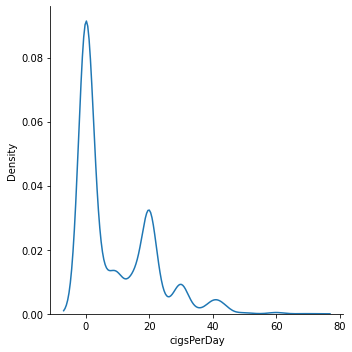

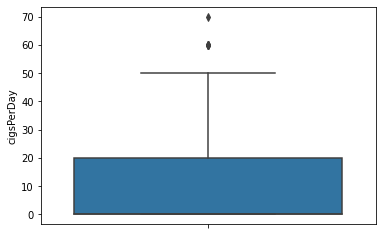

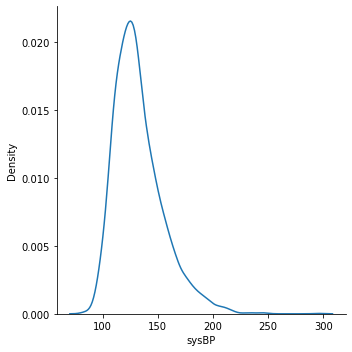

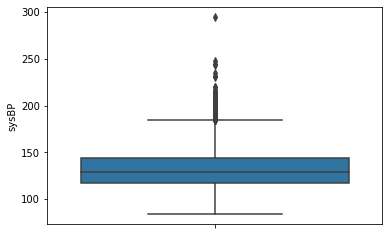

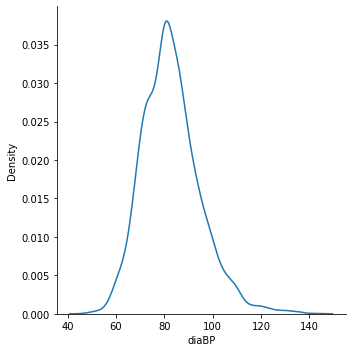

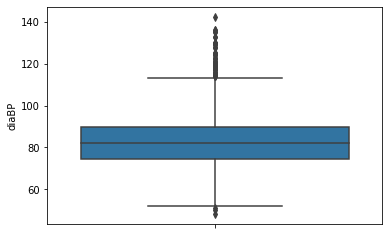

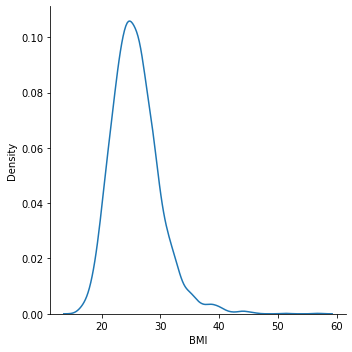

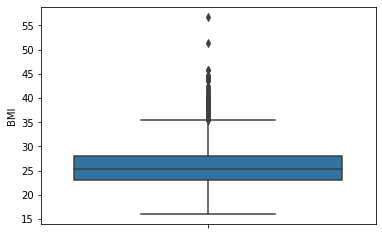

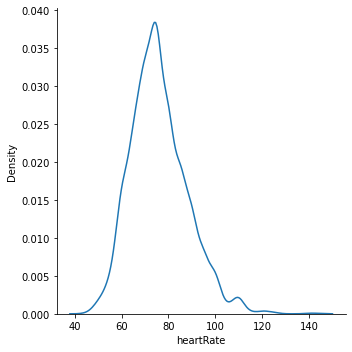

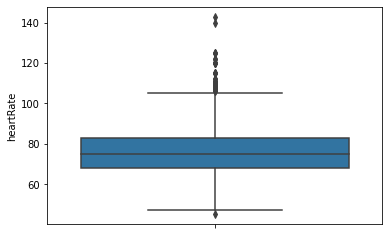

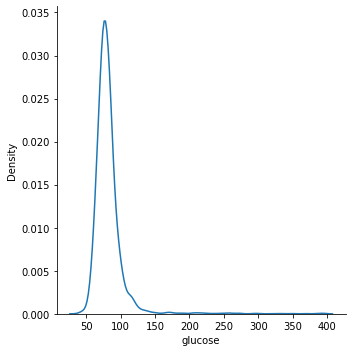

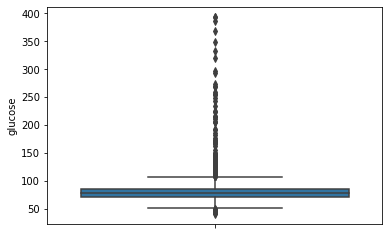

In [13]:
#Disrtribution and outlier analysis
for v in num_features:
   sns.displot(data=data_df, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data_df,y=v)#boxplot for outlier analysis
   plt.show()

REMARKS:

1.   No outliers and good distribution is observed in age feature.
2.   Outliers are observed in 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose' features.

So, in order to handle those outliers IQR method is implemented.


In [14]:
#Implementing IQR method 
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data_df[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data_df[v] = data_df[v].apply(lambda x : min_lim if x < min_lim else x)
   data_df[v] = data_df[v].apply(lambda x : max_lim if x > max_lim else x)

Since 'glucose' feature is having very high outliers, Iam assigning max limit as 145(because in medical terms glucose level above 145 is considered to be high)


In [15]:
#Implementing IQR method 
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





## Analysing each categorical feature with respect to each other

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

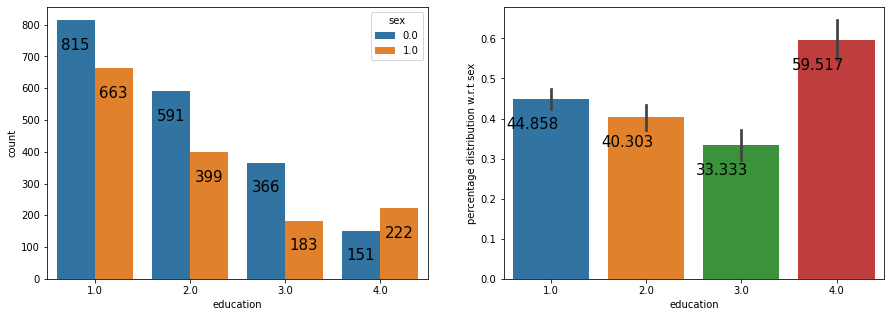

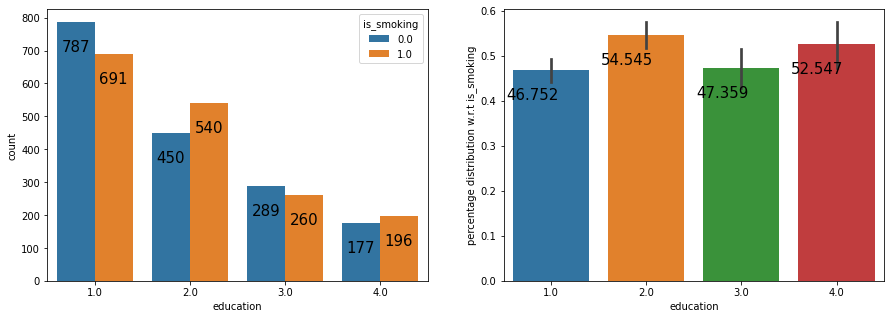

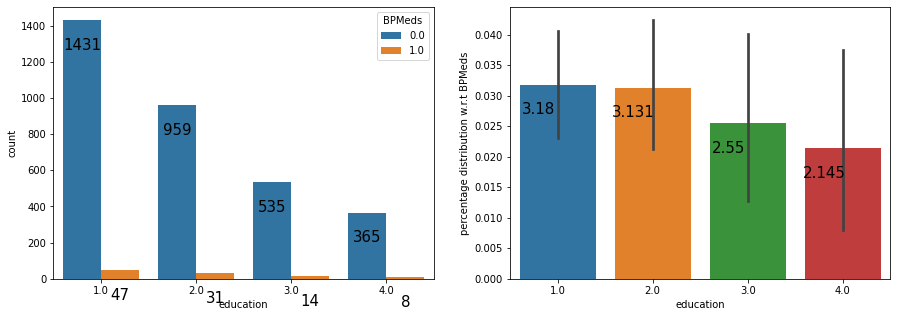

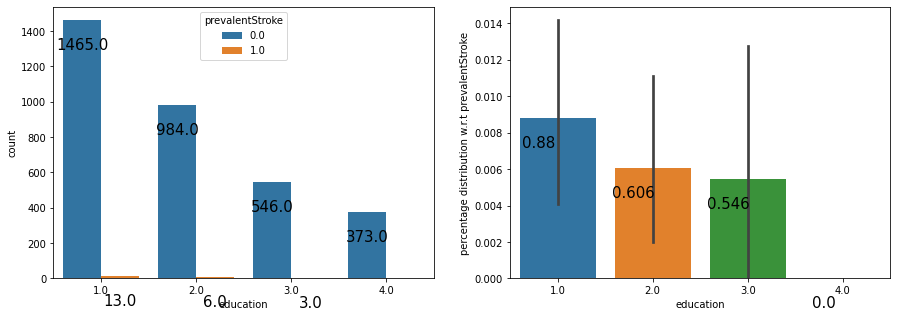

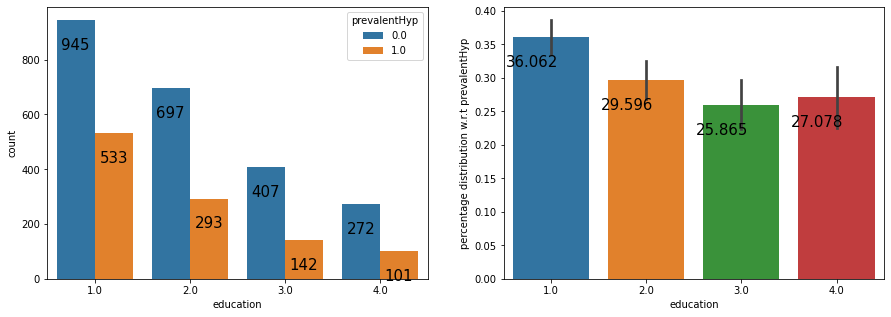

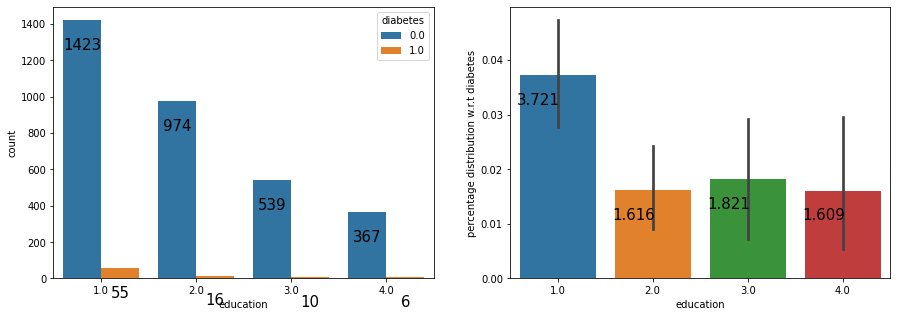

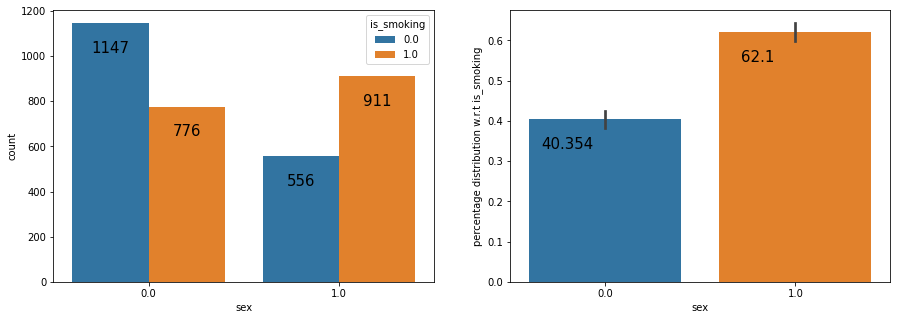

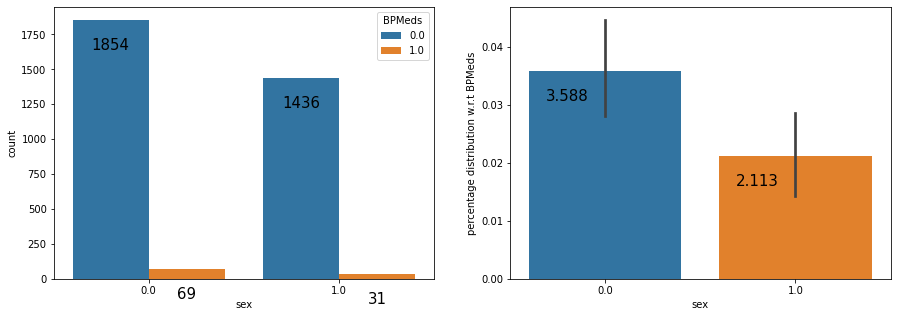

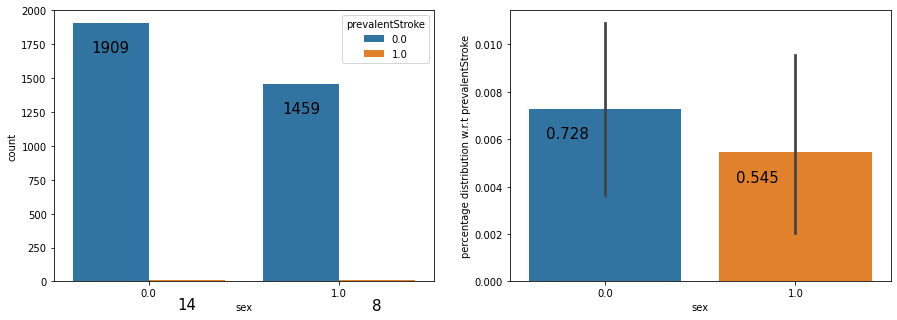

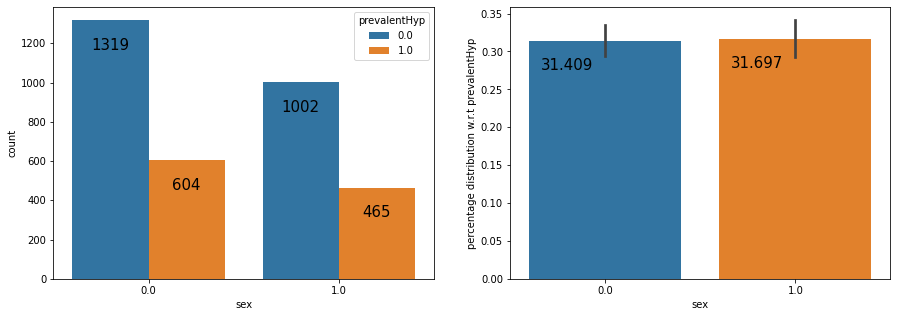

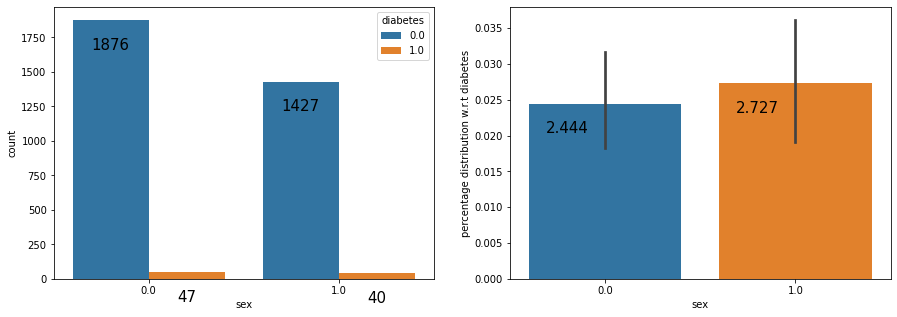

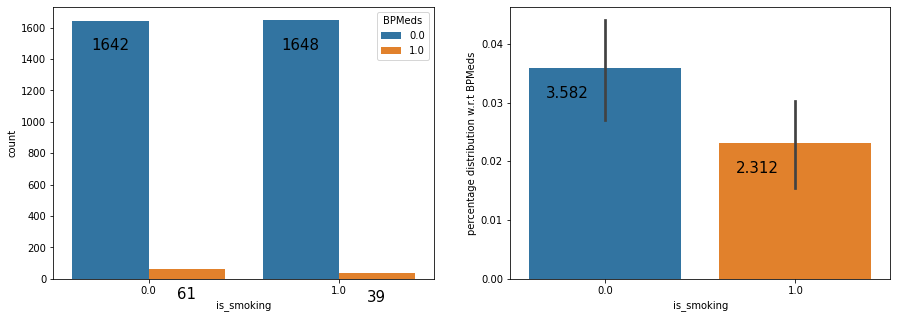

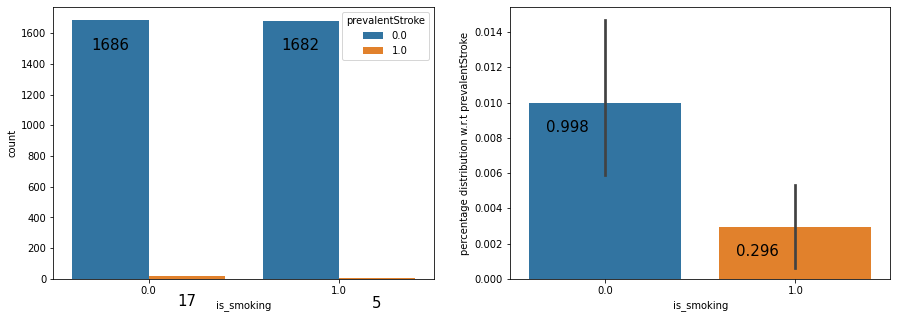

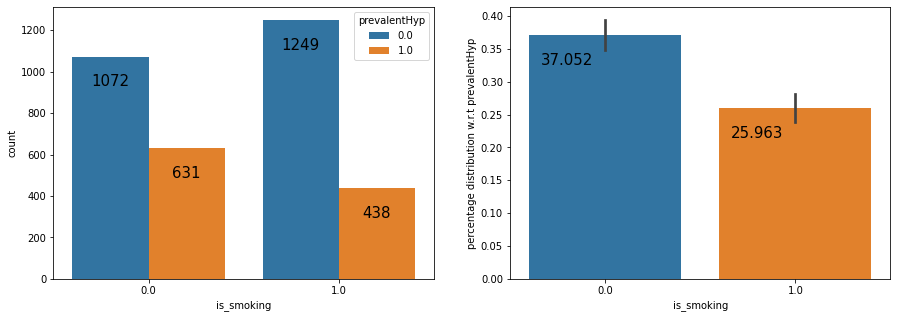

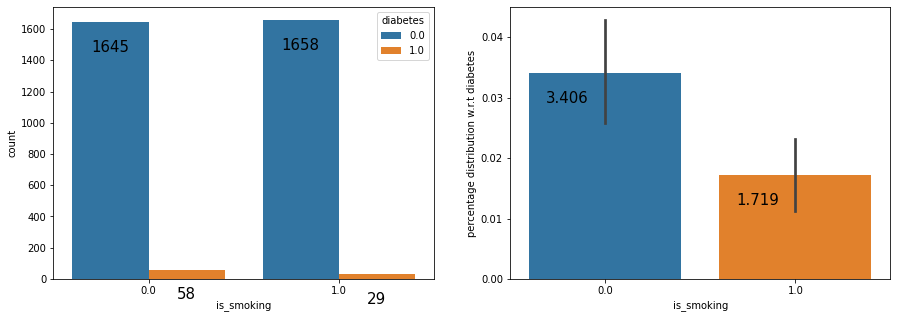

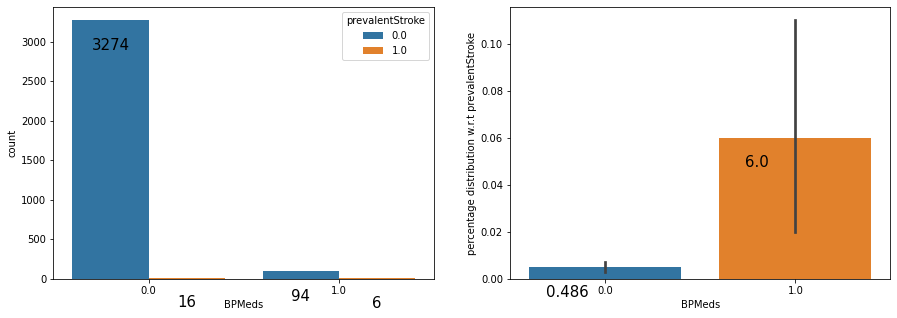

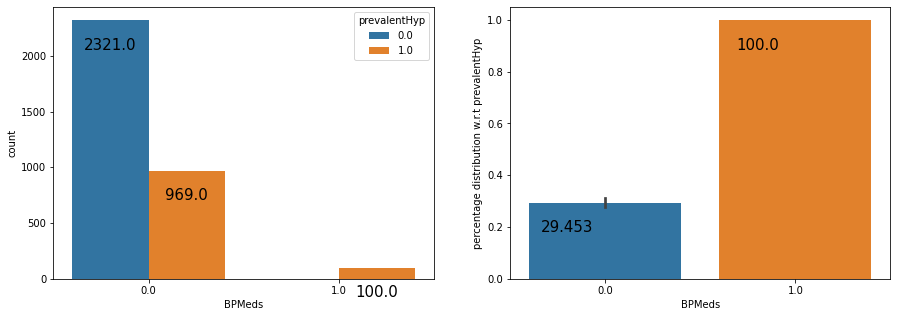

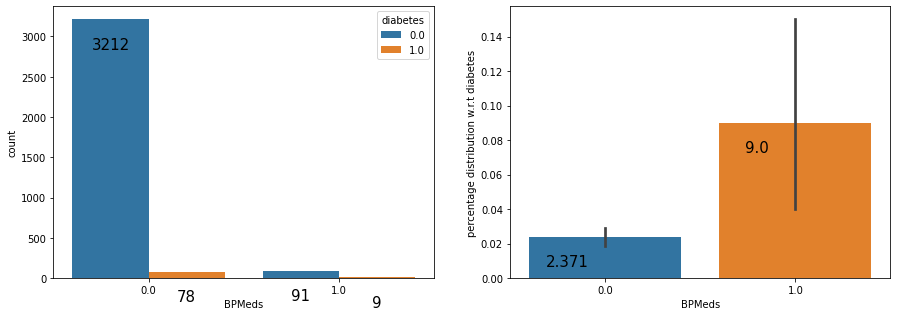

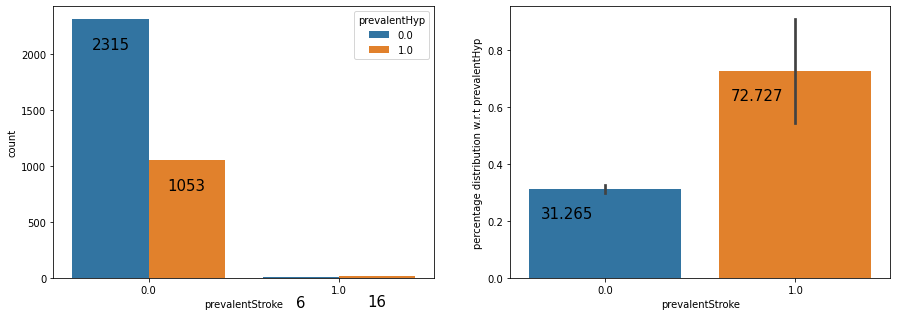

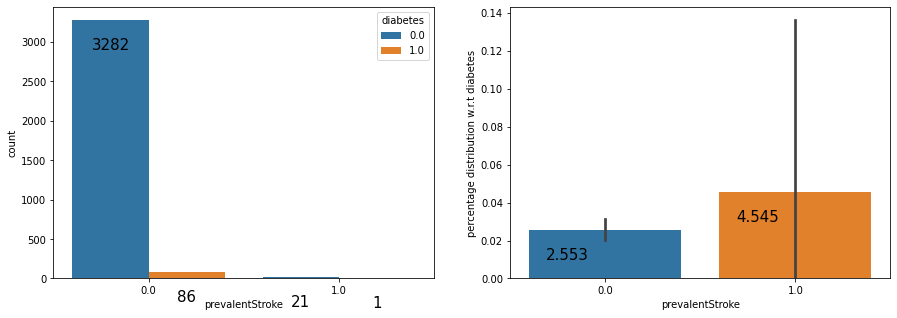

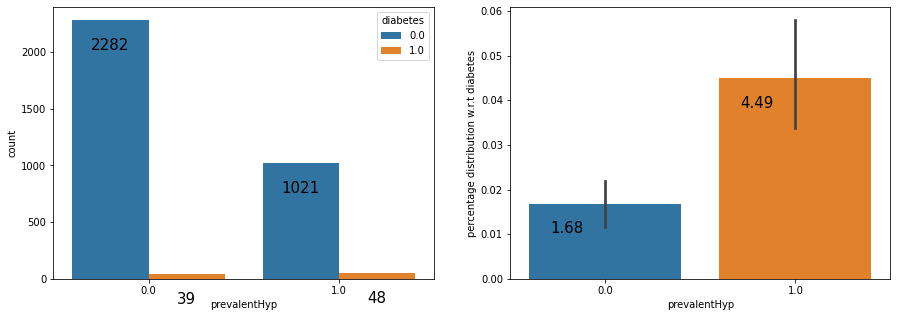

In [17]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   Males have higher chance to be a smoker.
*   Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









## Categorical features with respect to target feature

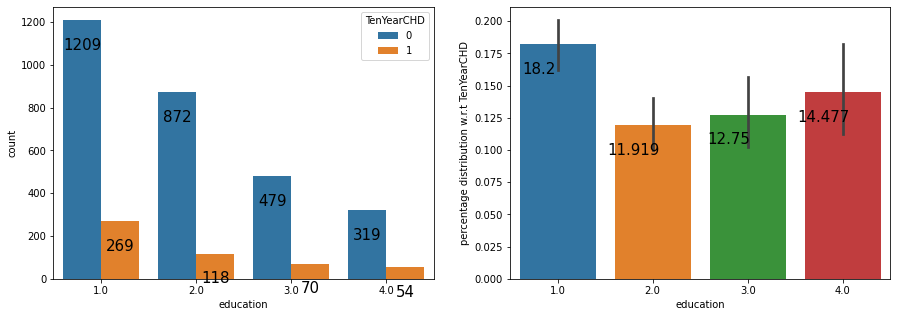

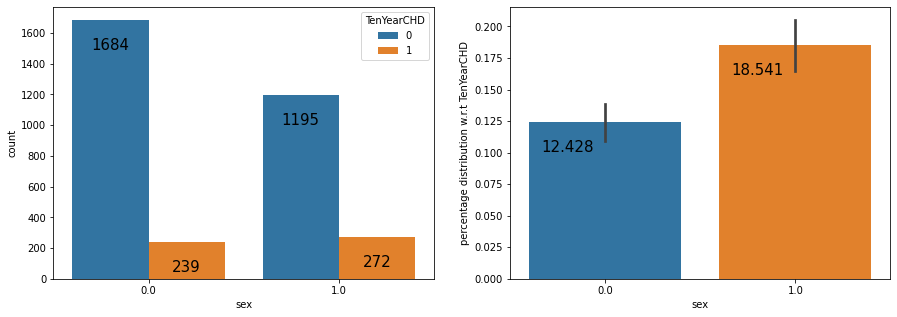

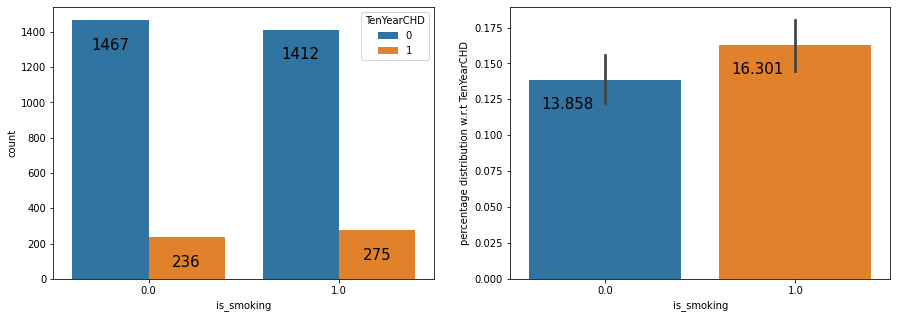

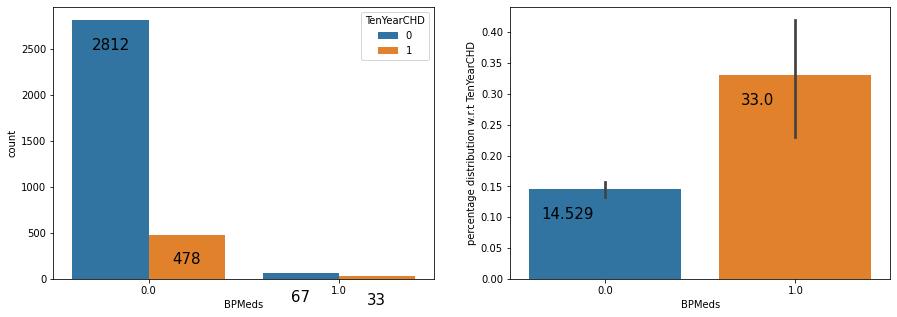

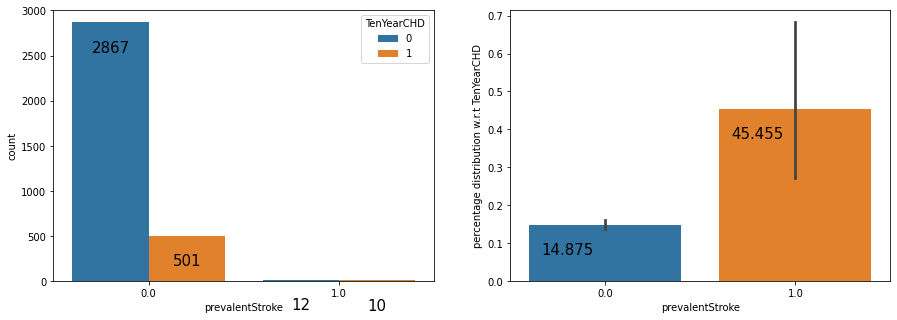

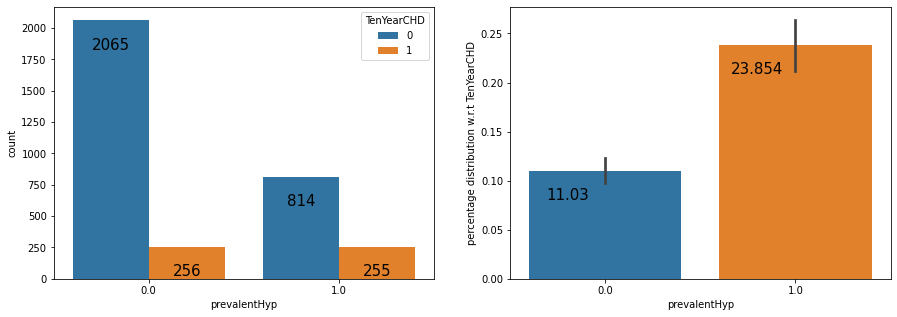

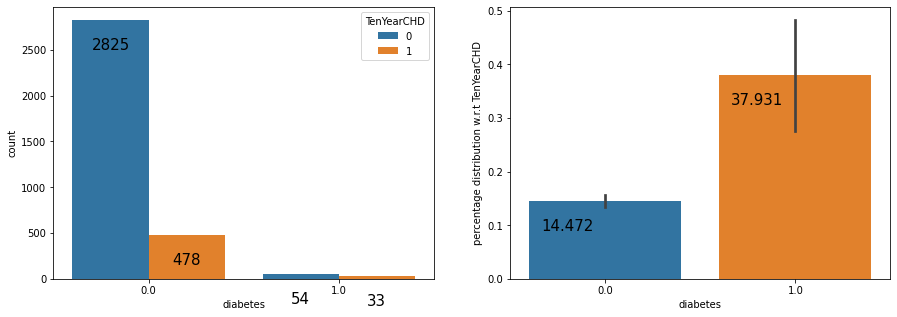

In [18]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



## Analysing Numerical features with respect to other categorical features

### Analysis with respect to age

**Analysising age feature with respect to other categorical features :**

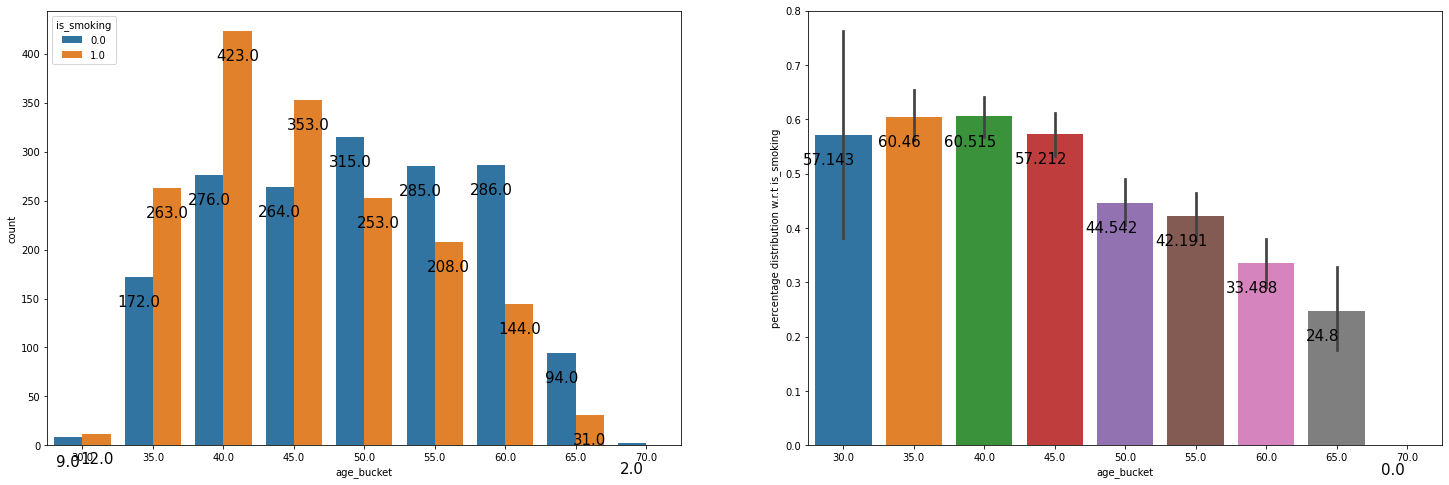

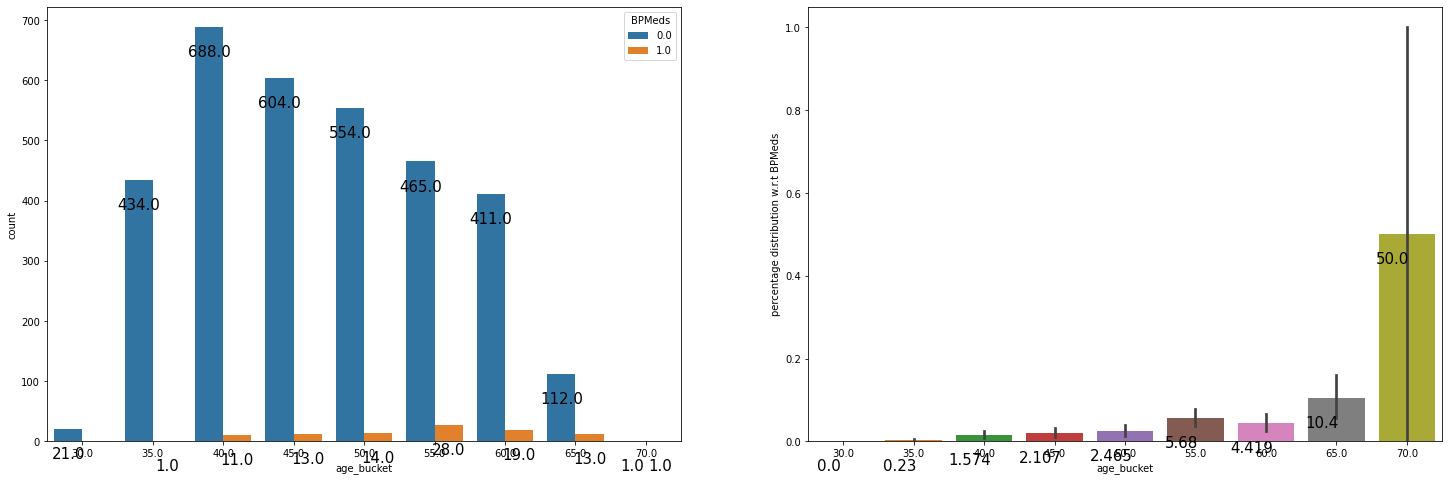

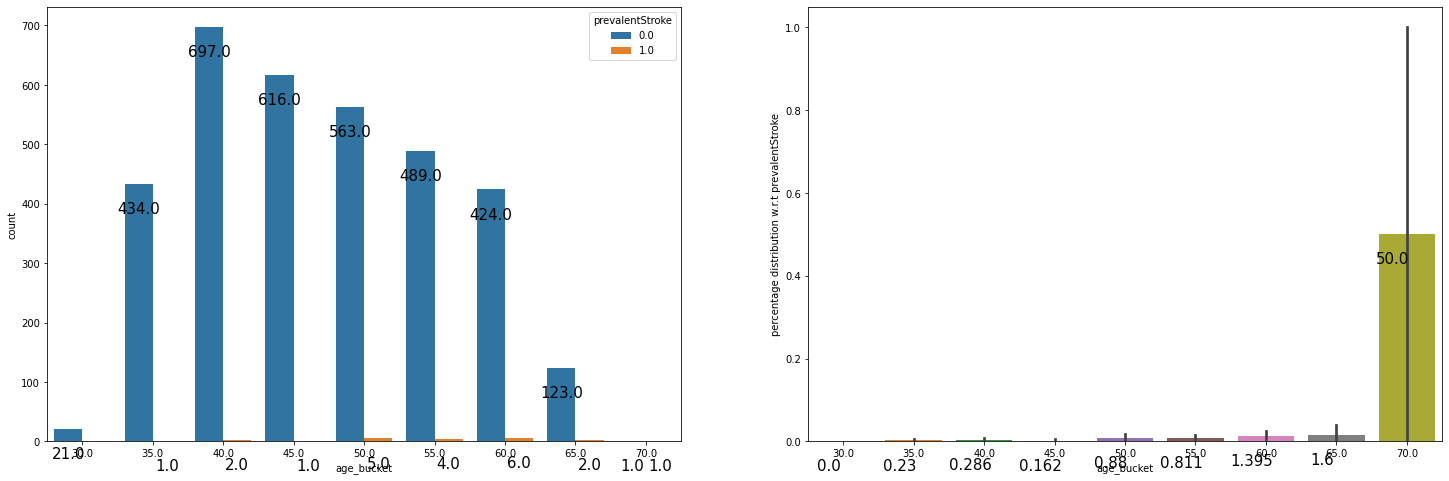

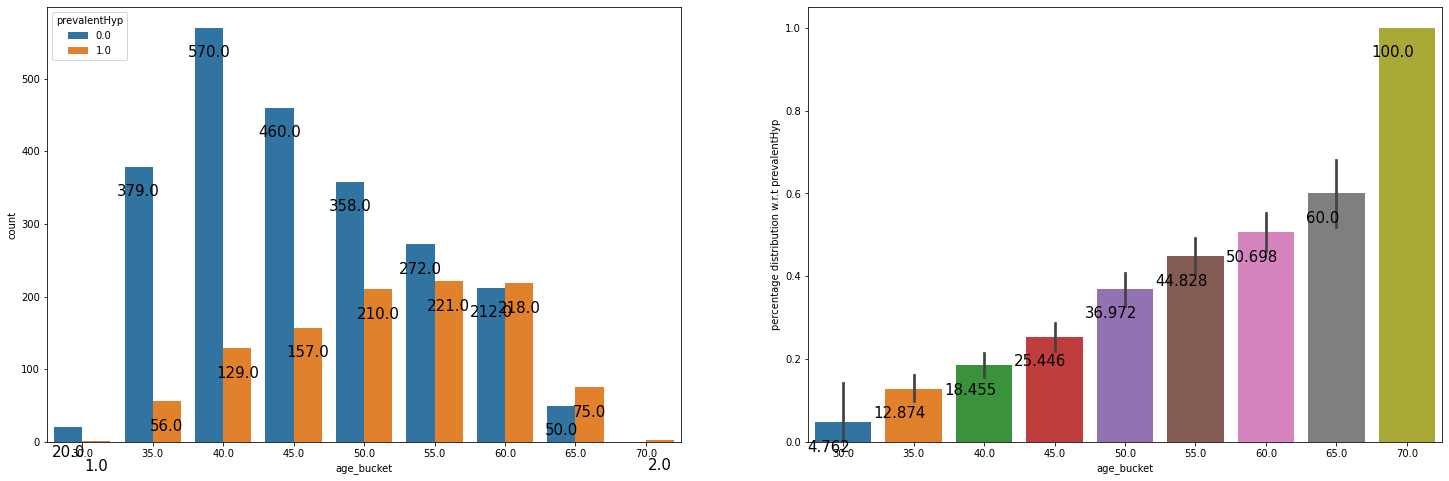

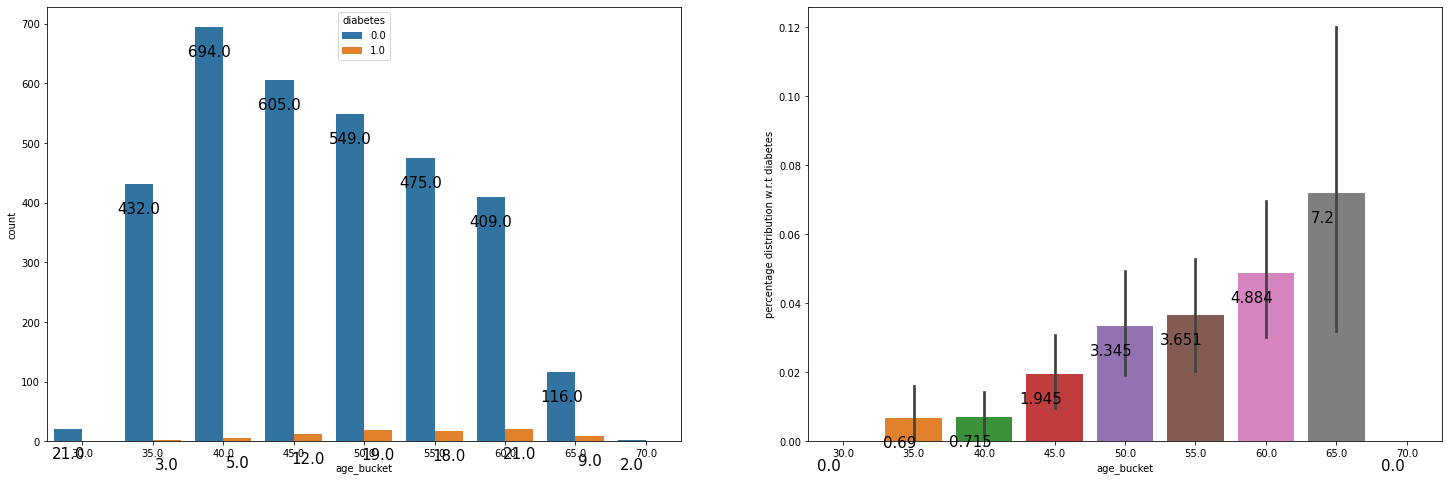

In [19]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.



### Analysis with respect to totChol

**Analysising totChol feature with respect to other categorical features :**

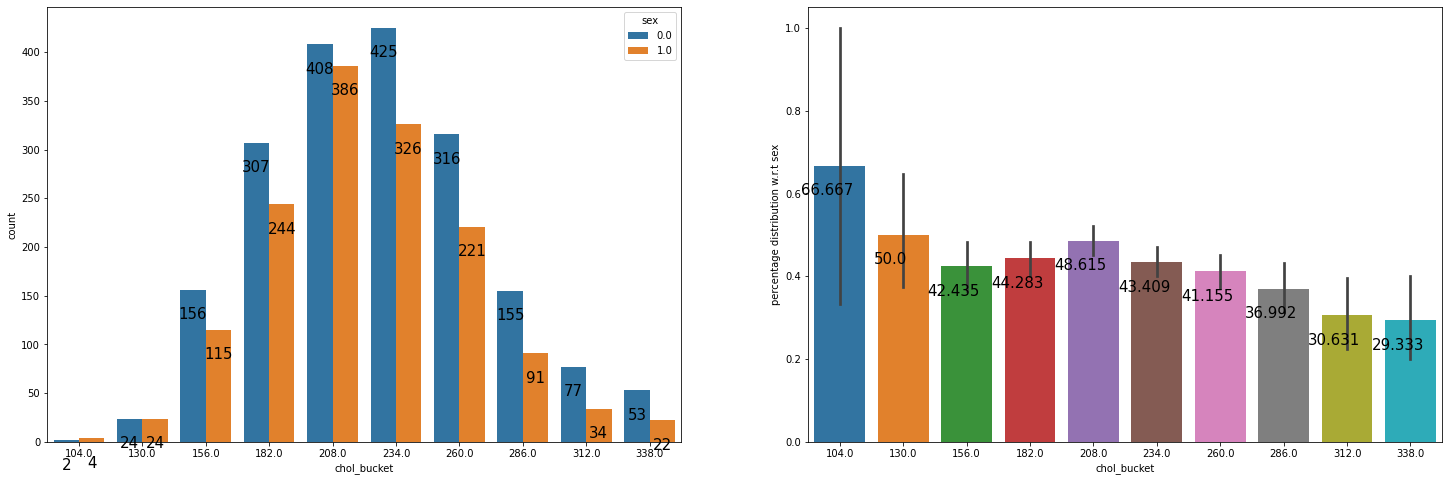

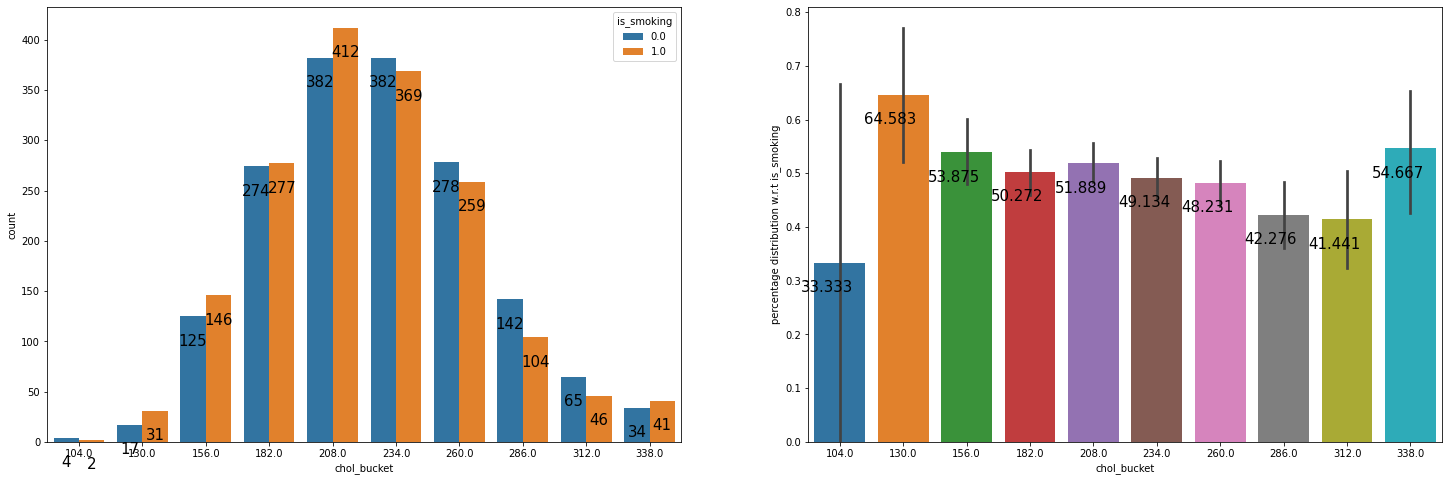

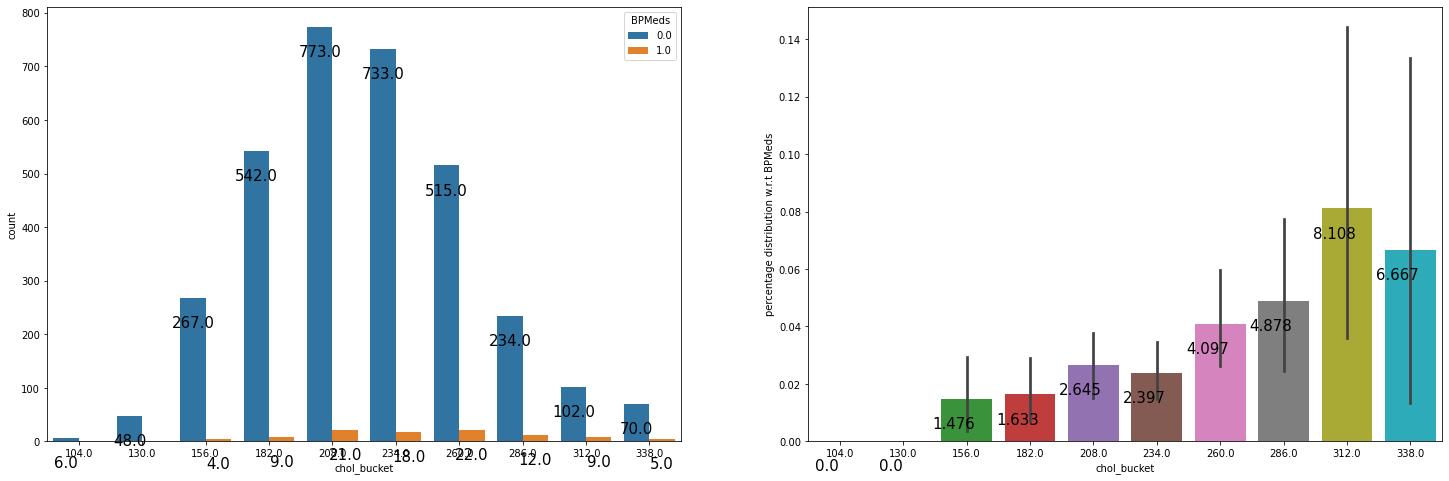

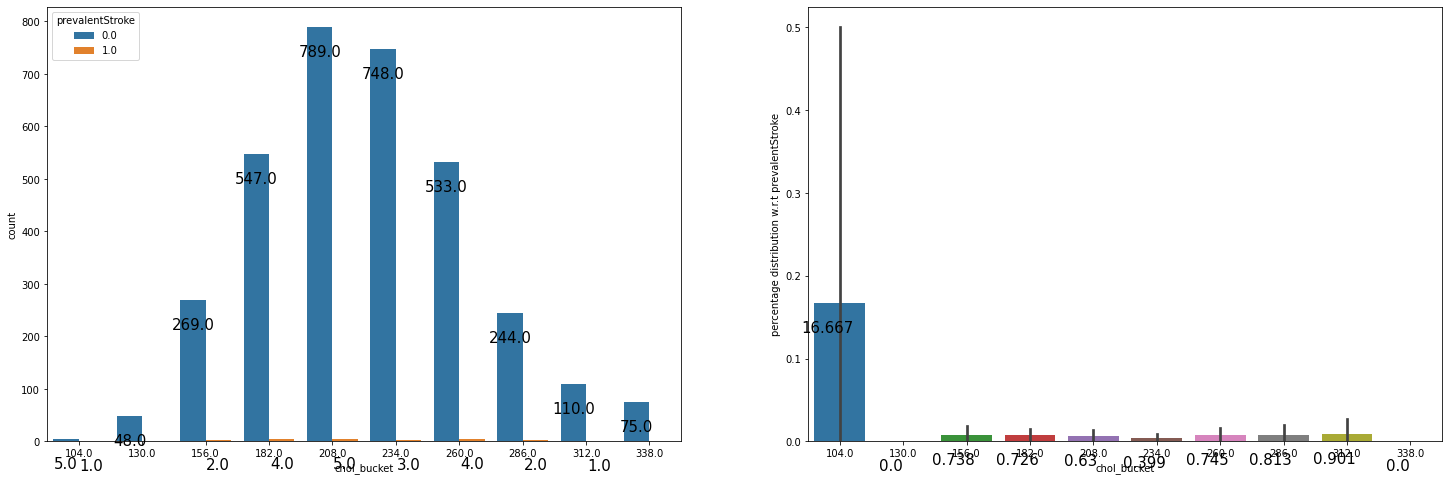

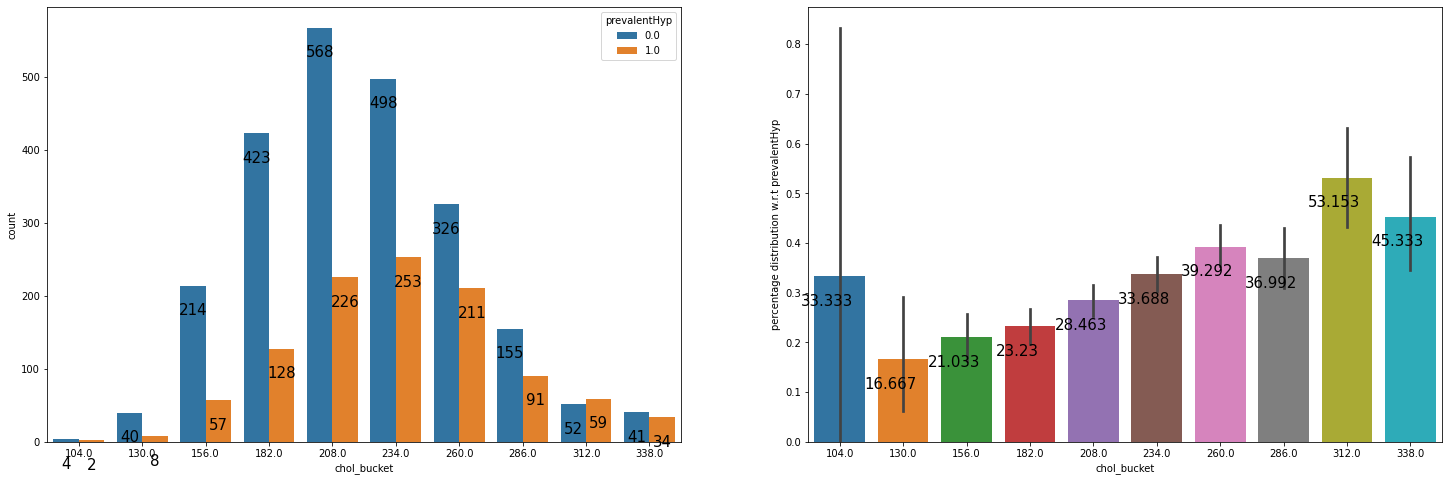

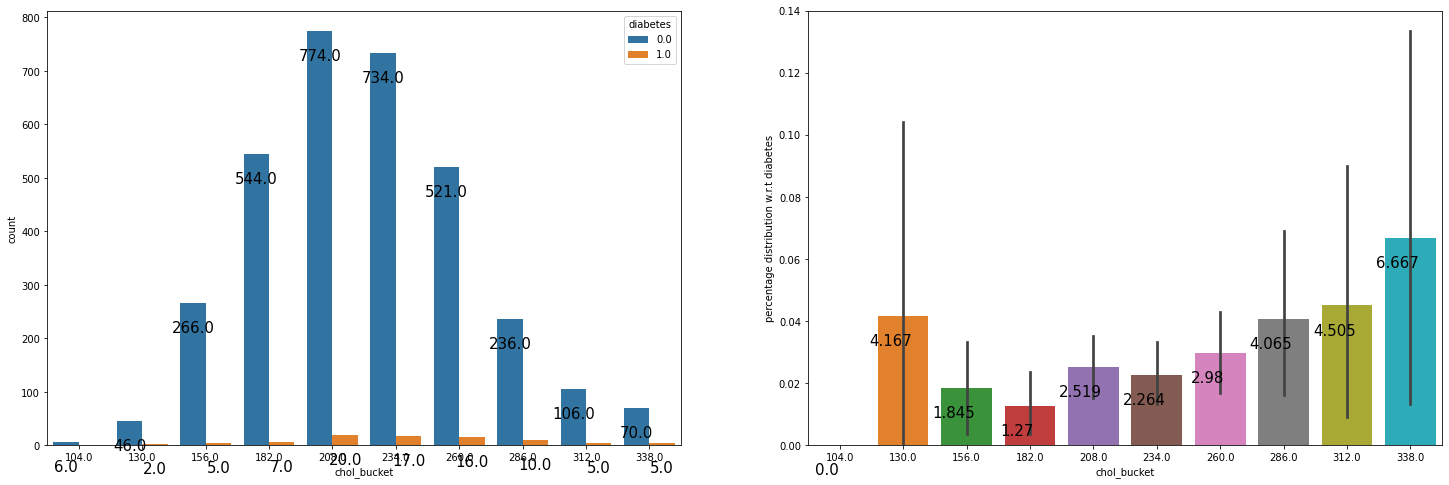

In [20]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels



### **Analysis with respect to cigsPerDay**

**Analysising cigsPerDay feature with respect to other categorical features :**

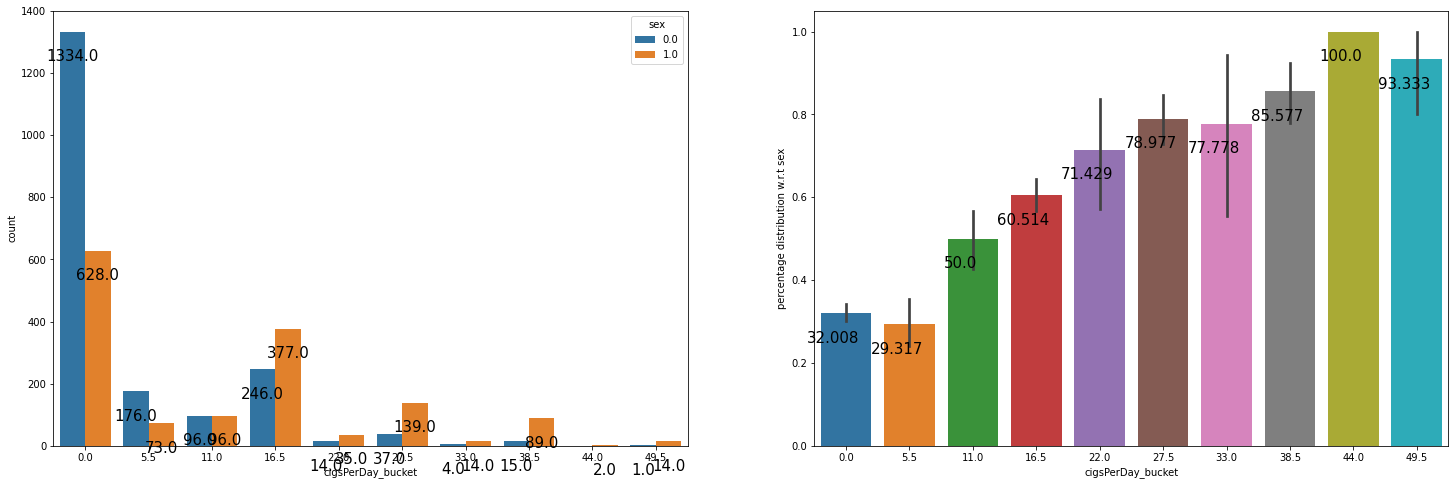

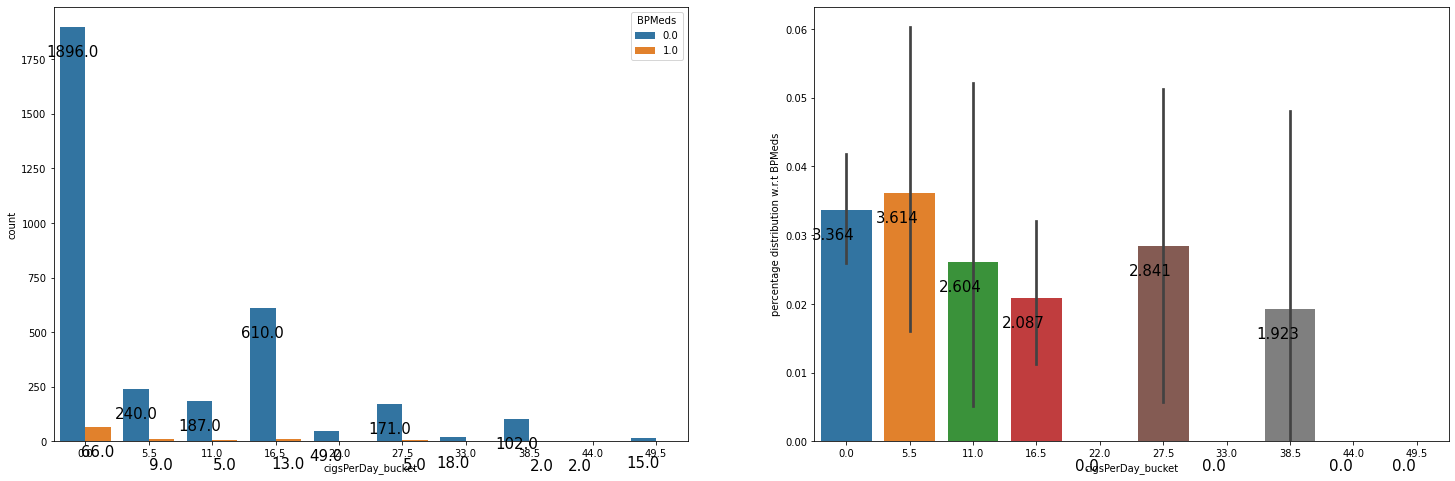

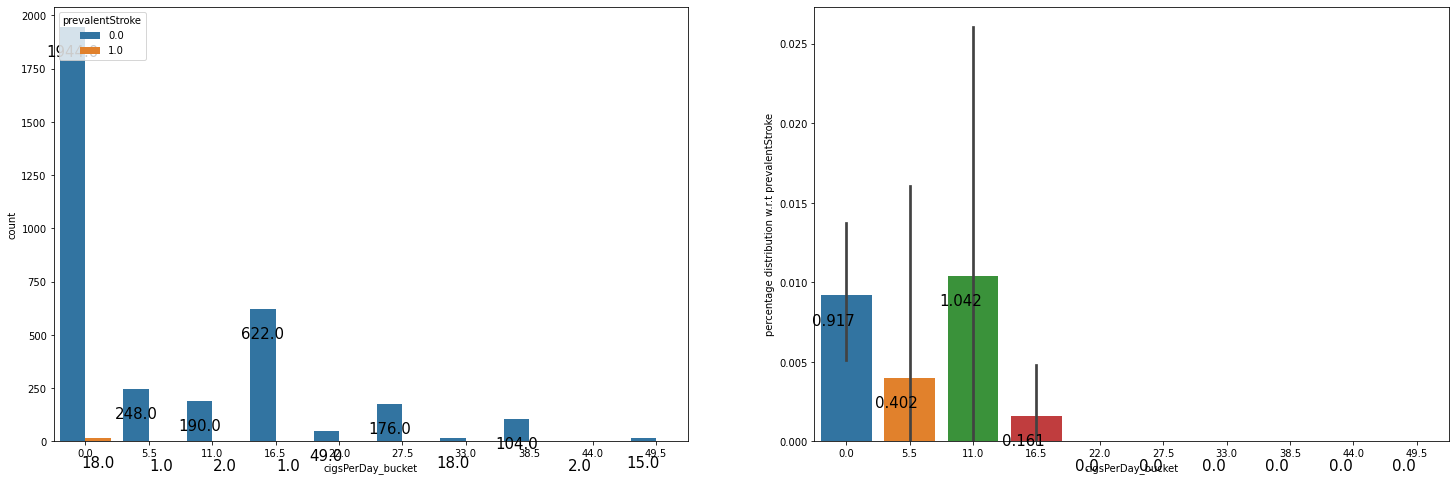

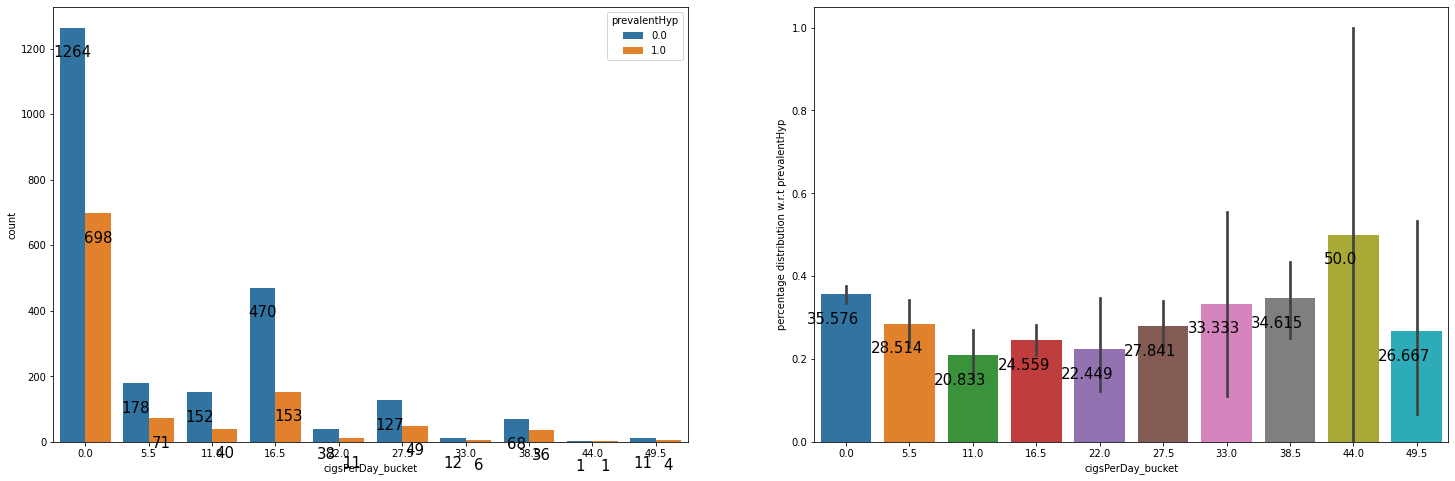

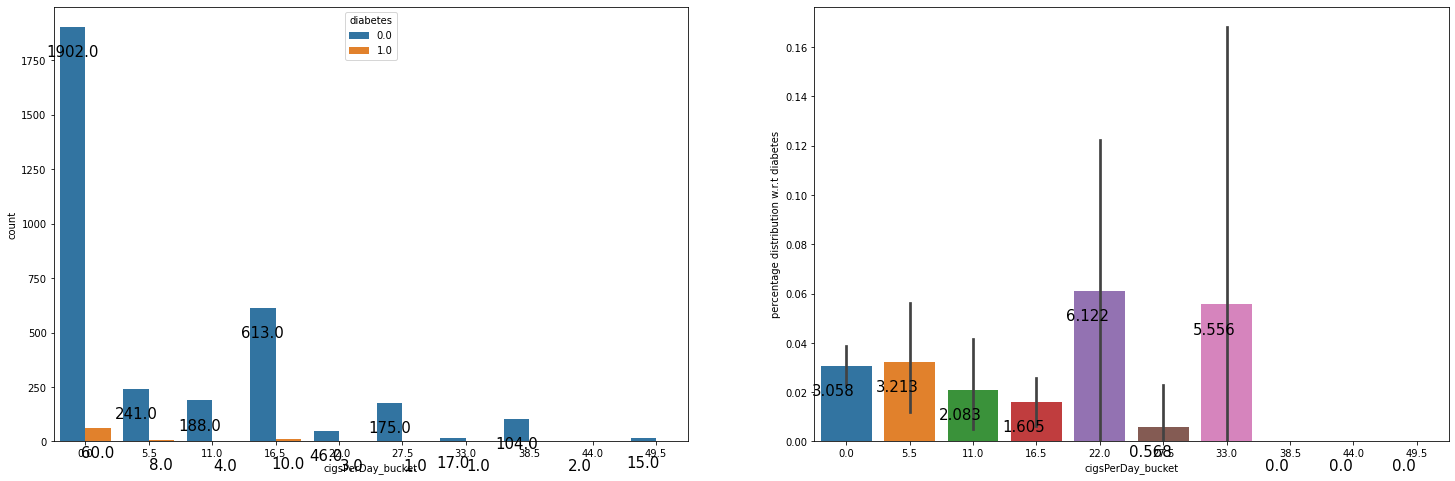

In [21]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   Males tend to smoke more cigarettes compared to females.



### Analysis with respect to sysBP

**Analysising sysBP feature with respect to other categorical features :**

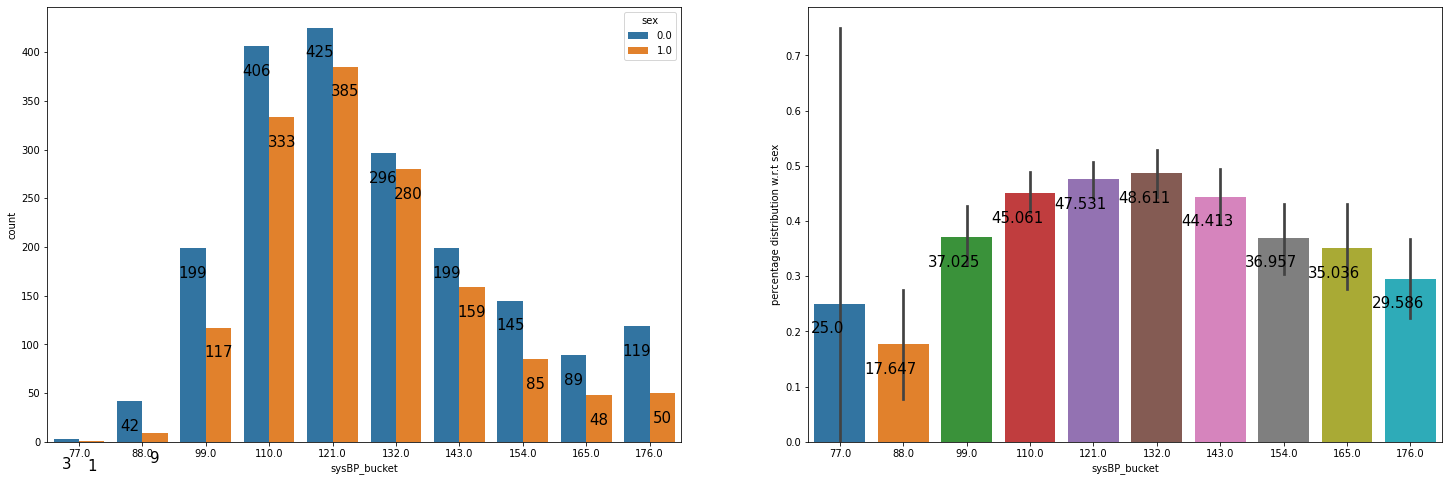

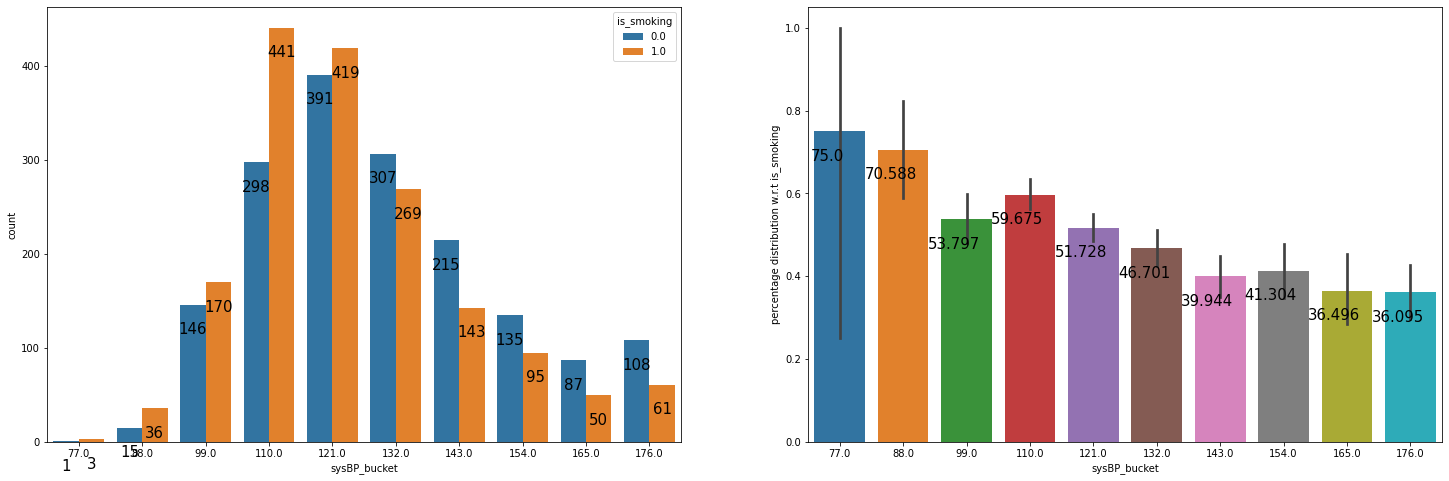

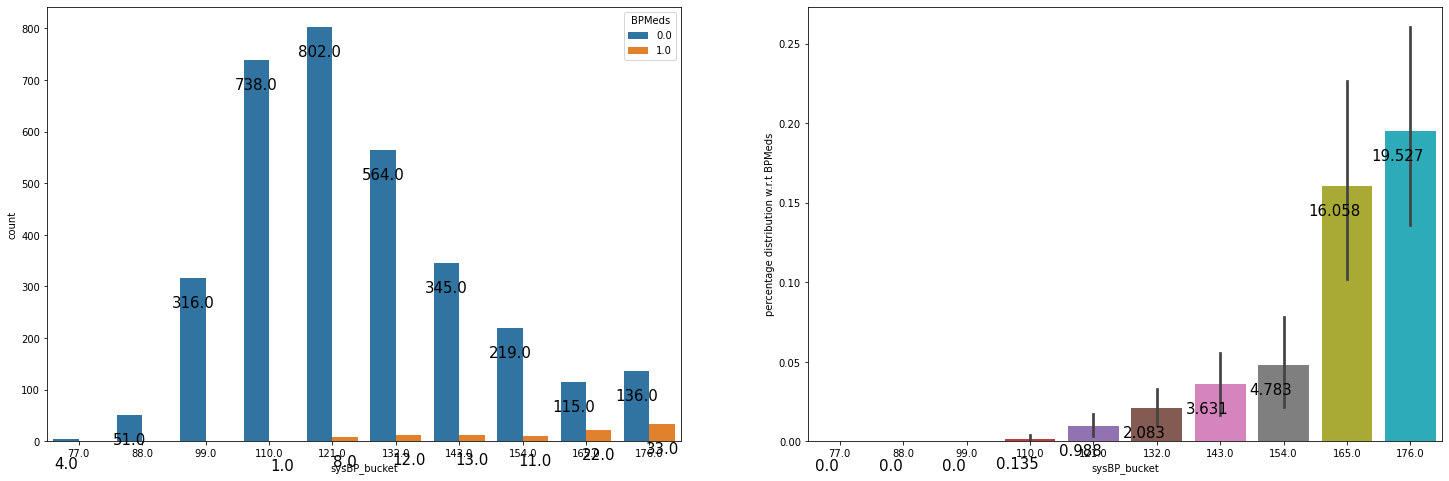

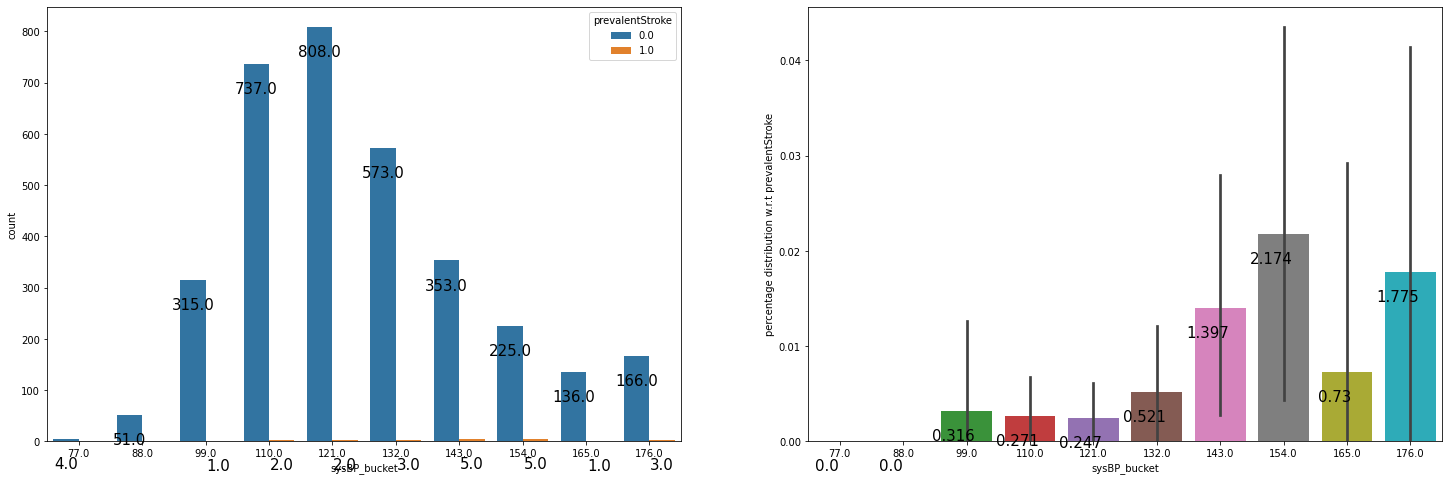

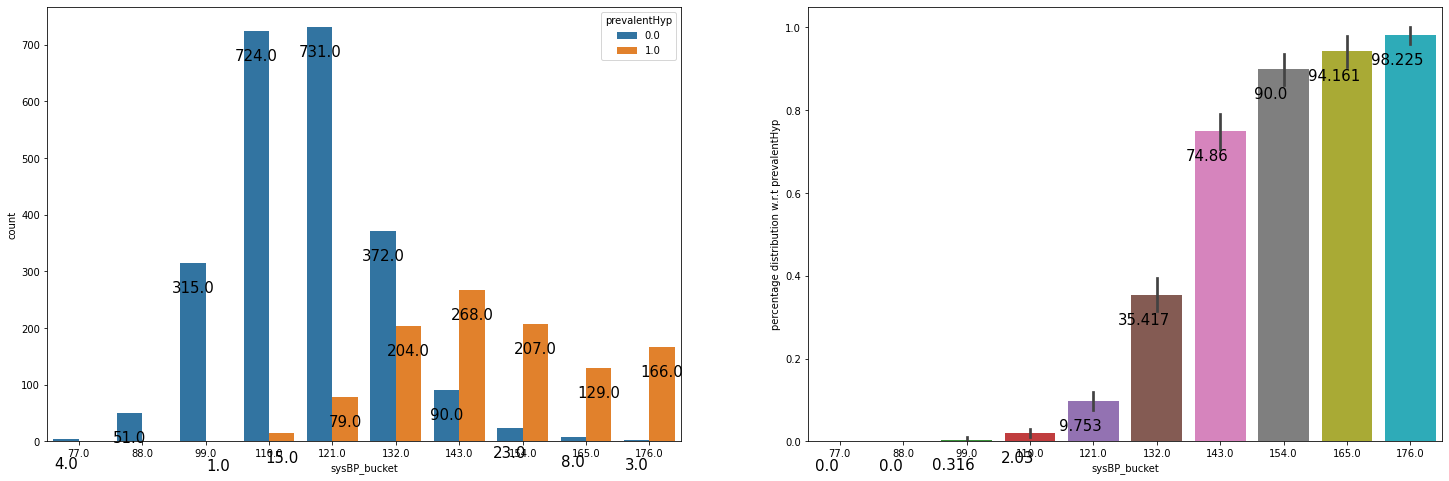

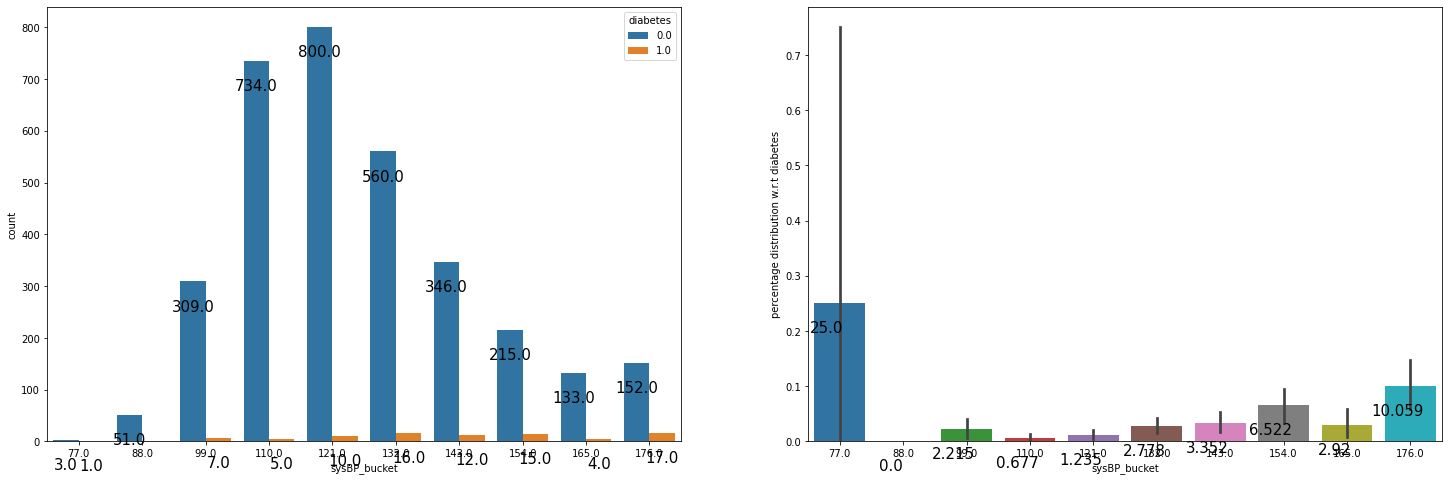

In [22]:
#For better further analysis binning is implemented on age feature
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   SysBp tends to be low for smokers.
*   SysBp tends to be high for people with BP medication and hypertension issues.




### **Analysis with respect to diaBP**

**Analysising diaBP feature with respect to other categorical features :**

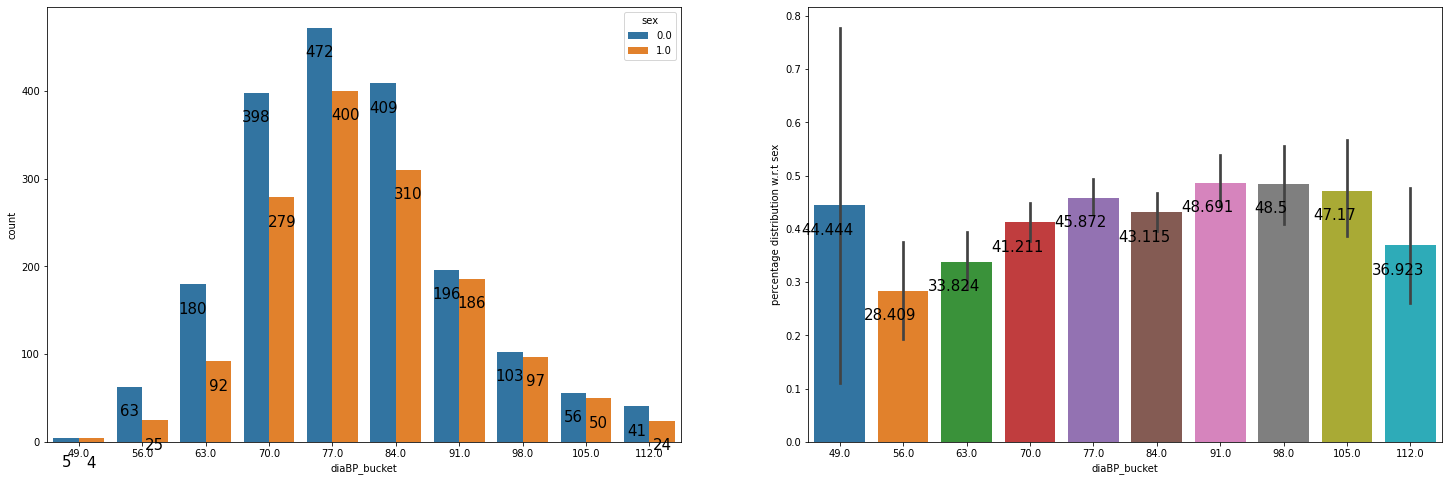

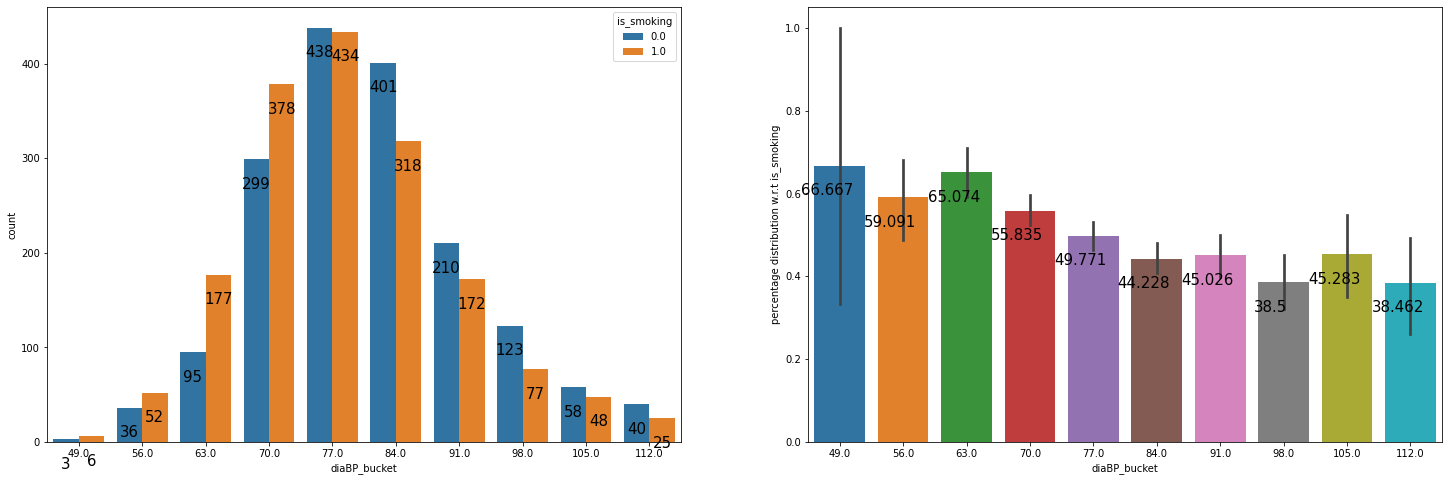

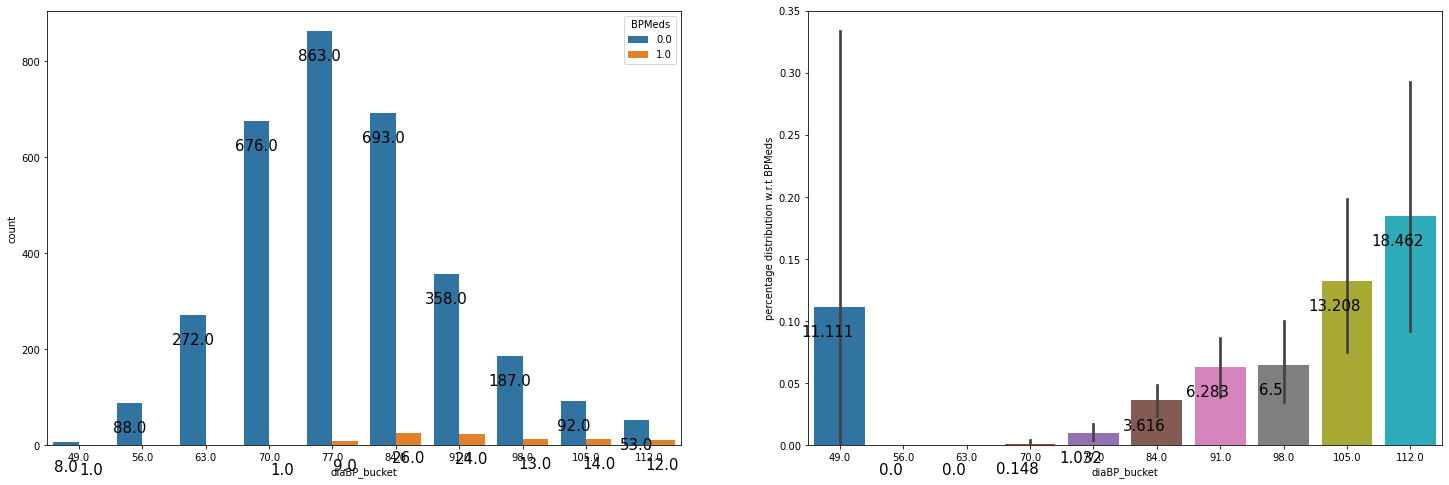

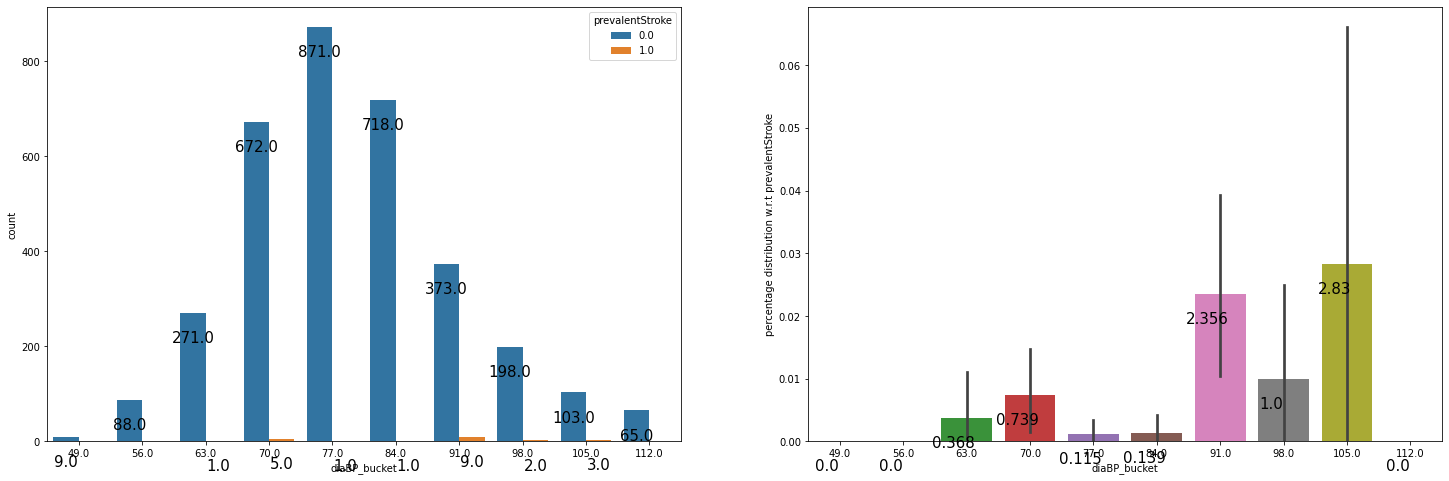

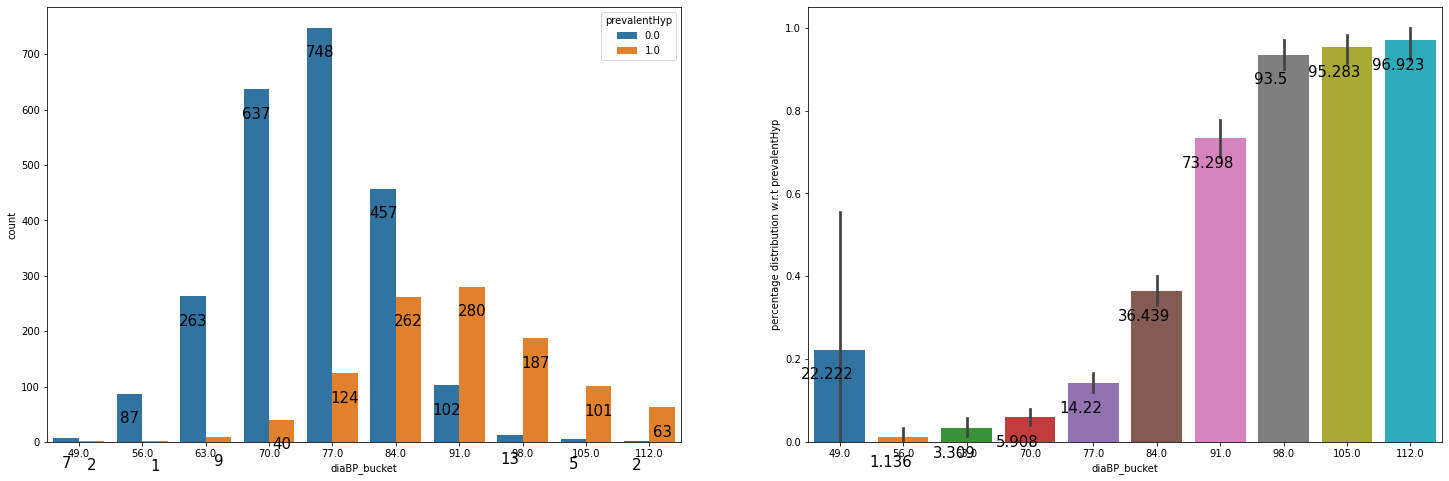

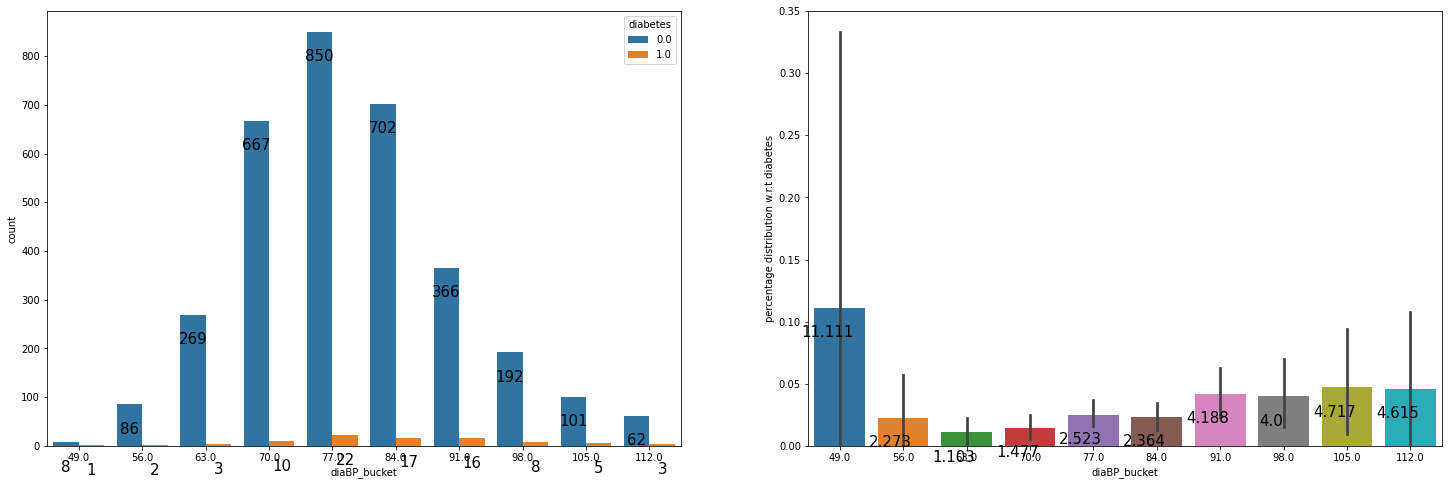

In [23]:
#For better further analysis binning is implemented on age feature
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   DiaBp tends to be low for smokers.
*   DiaBp tends to be high for people with BP medication and hypertension issues.



### **Analysis with respect to BMI**

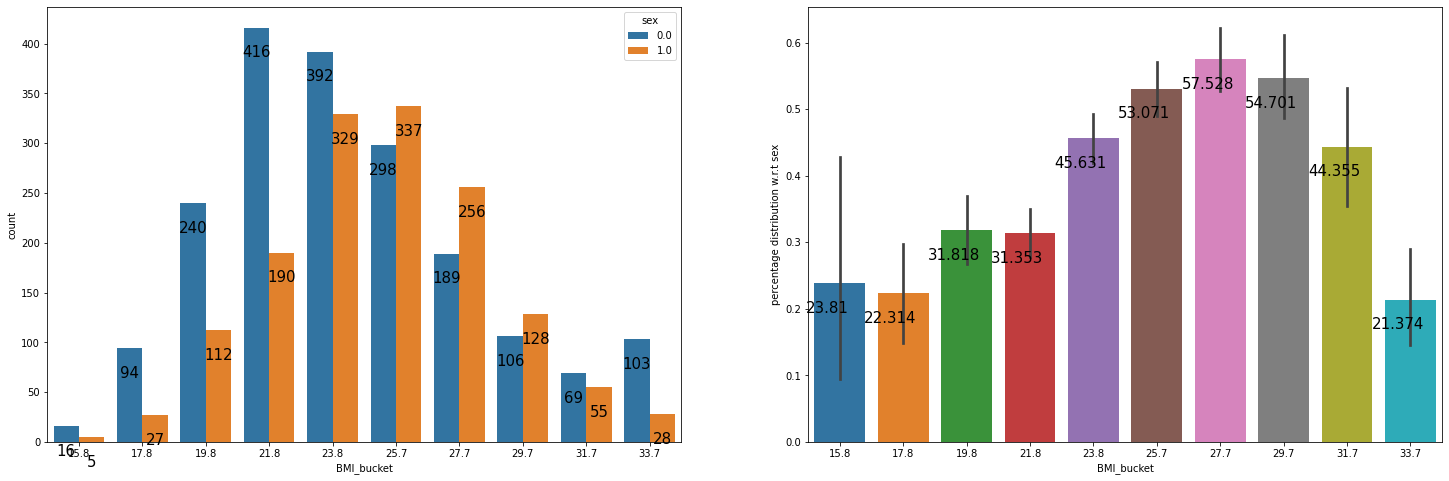

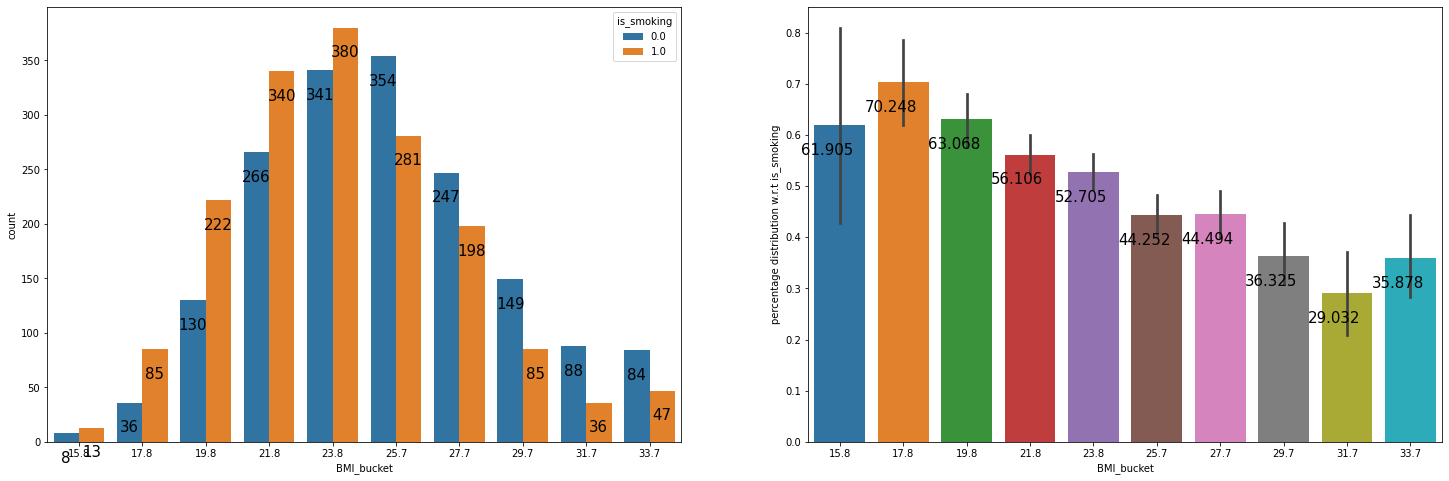

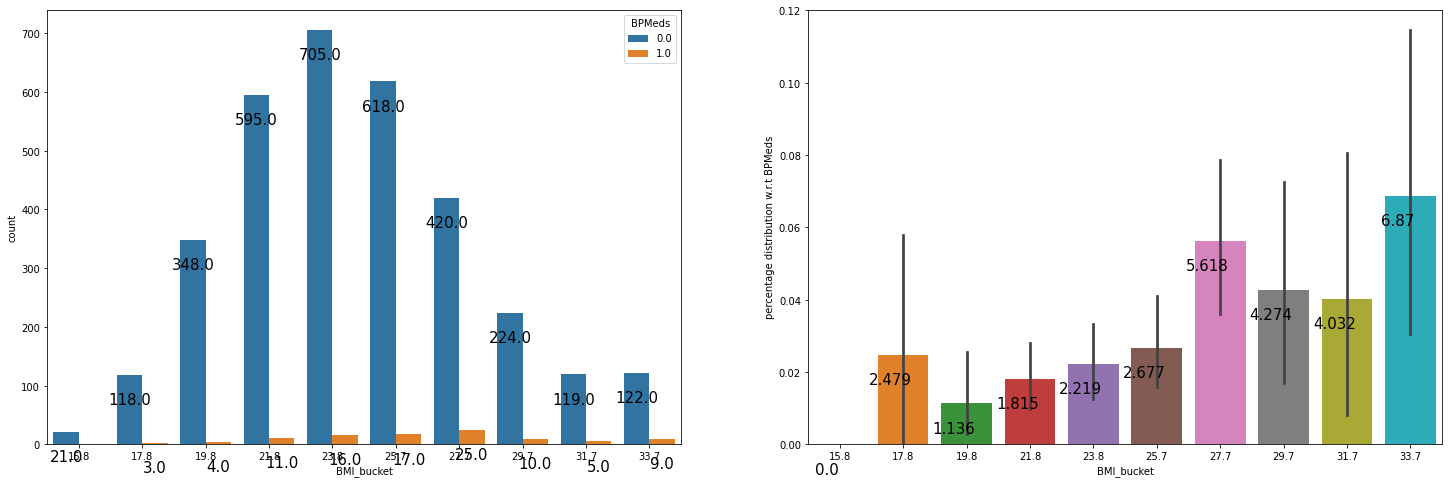

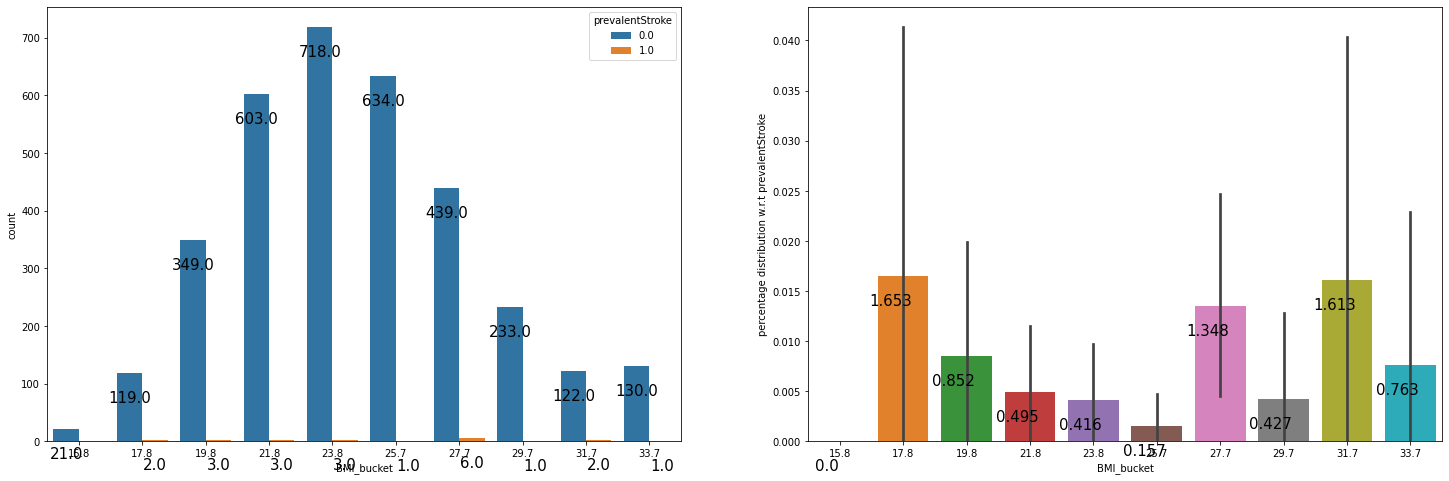

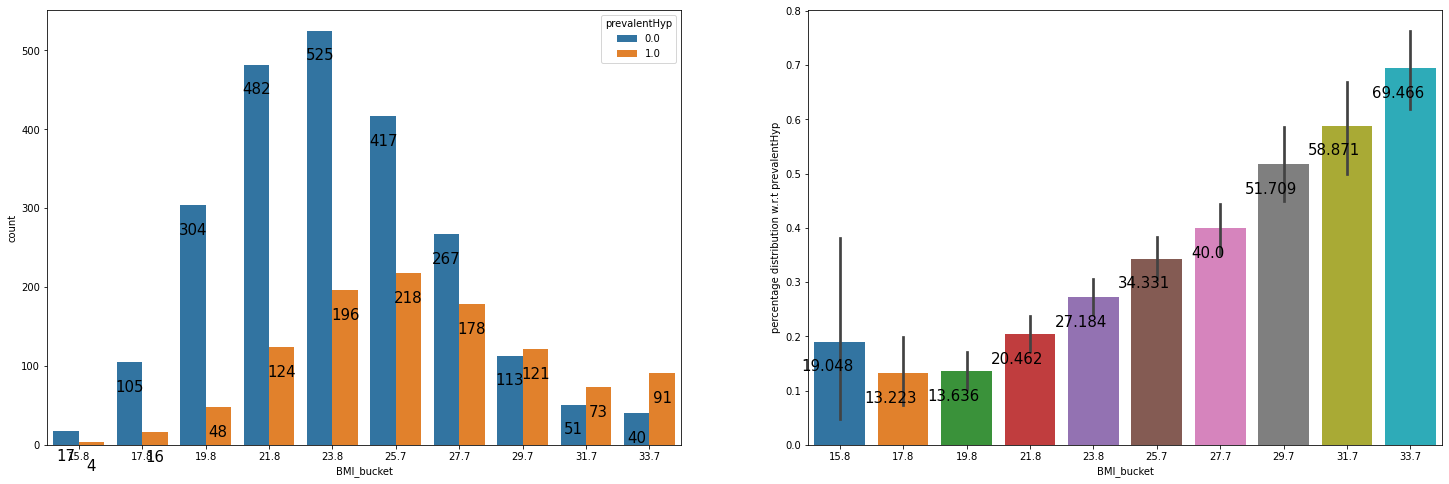

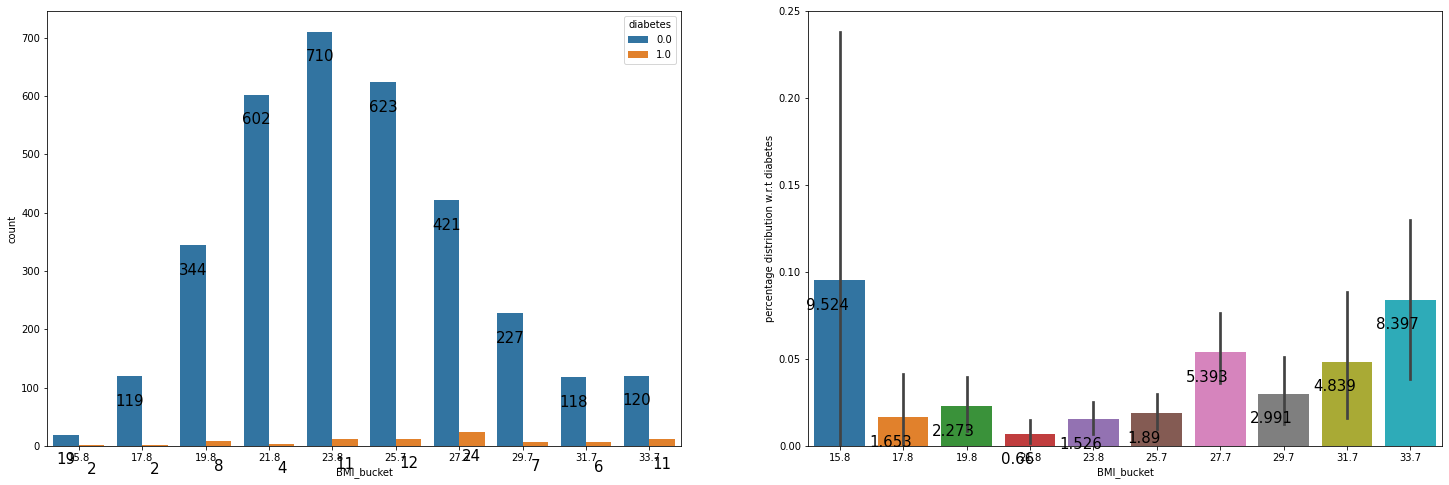

In [24]:
#For better further analysis binning is implemented on age feature
data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   BMI levels from 15 to 22 and 30 to 34 are more prevalent in females.
*   Smokers tend to have lower BMI.
*   People with prevalent hypertension tend to have higher BMI.





### Analysis with respect to heartRate

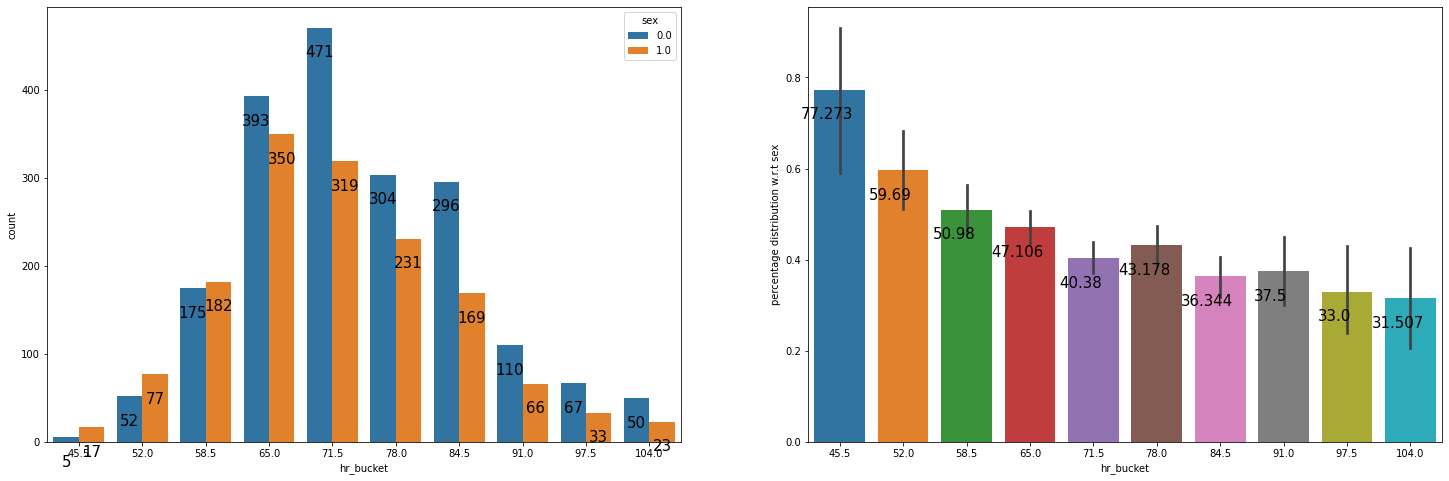

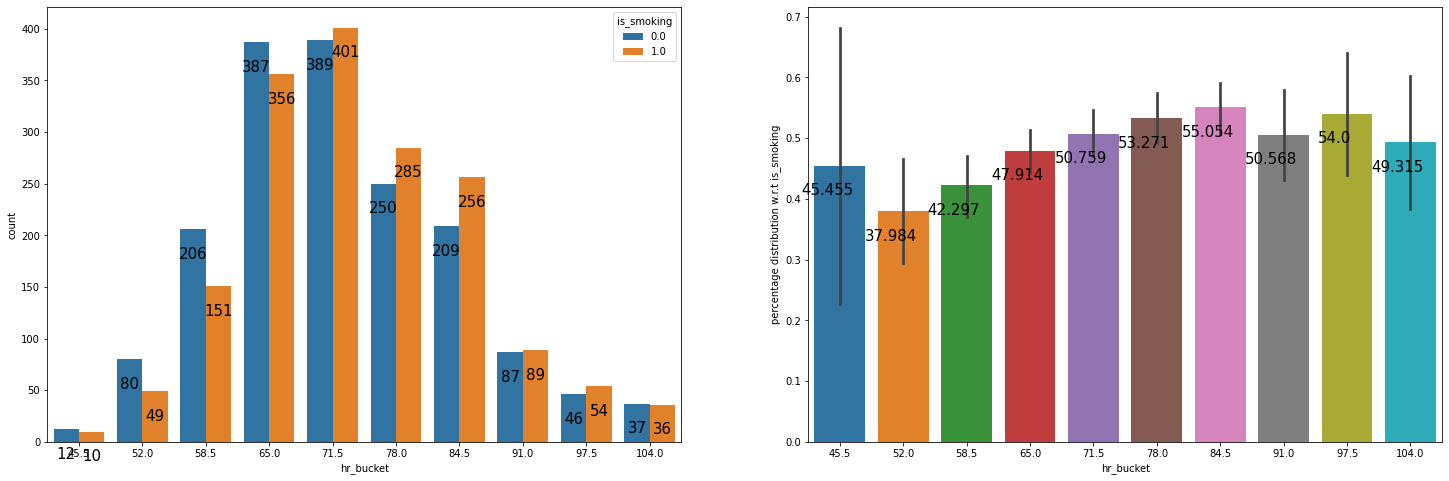

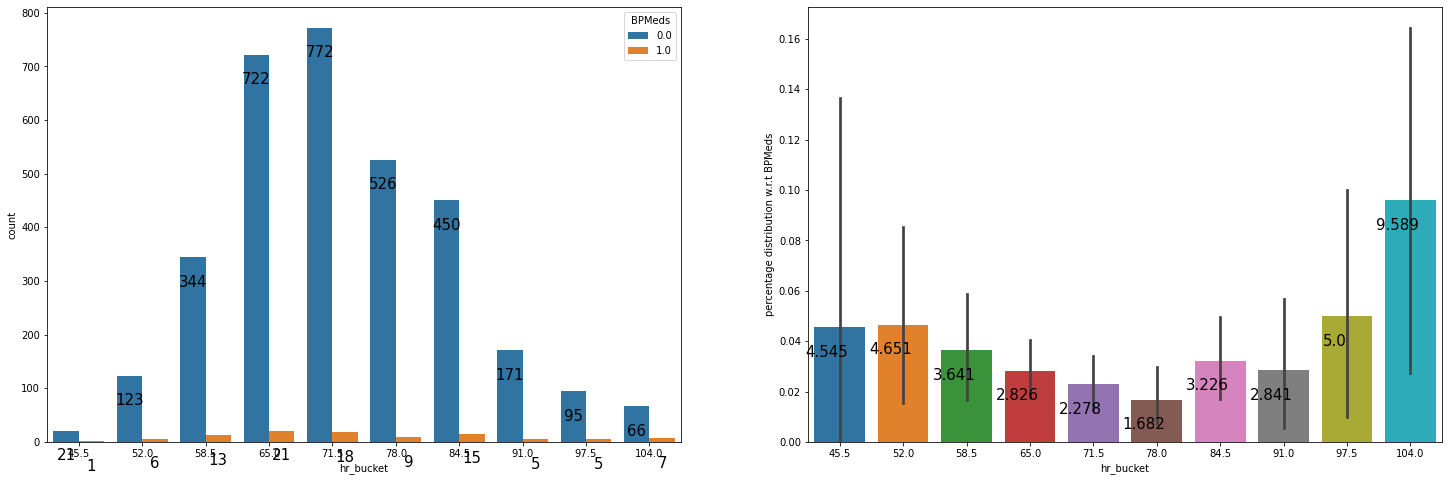

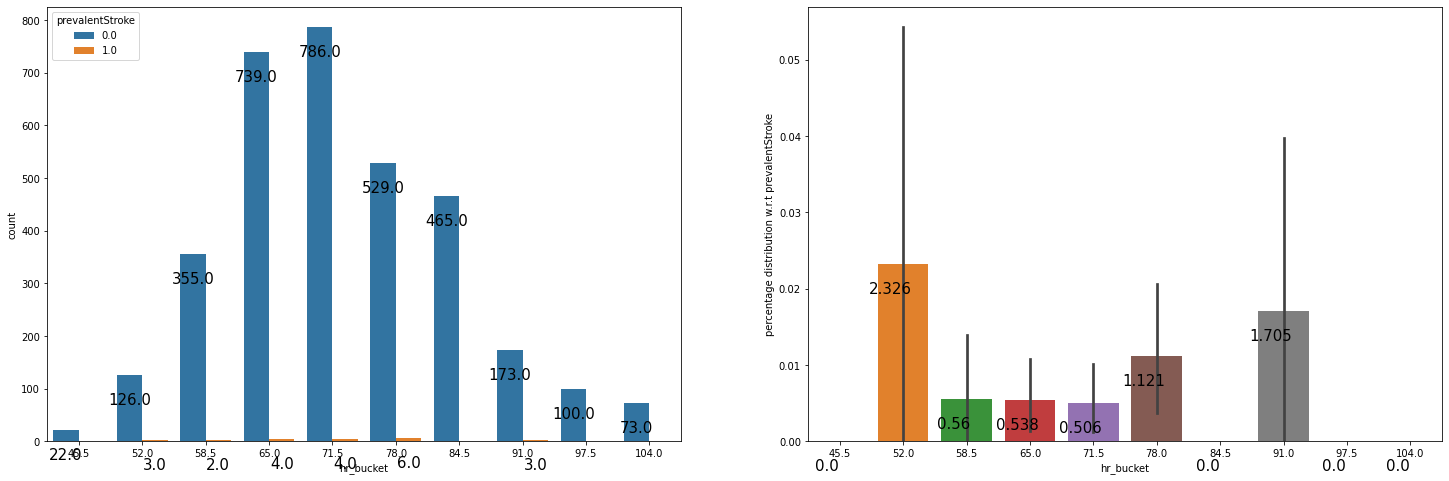

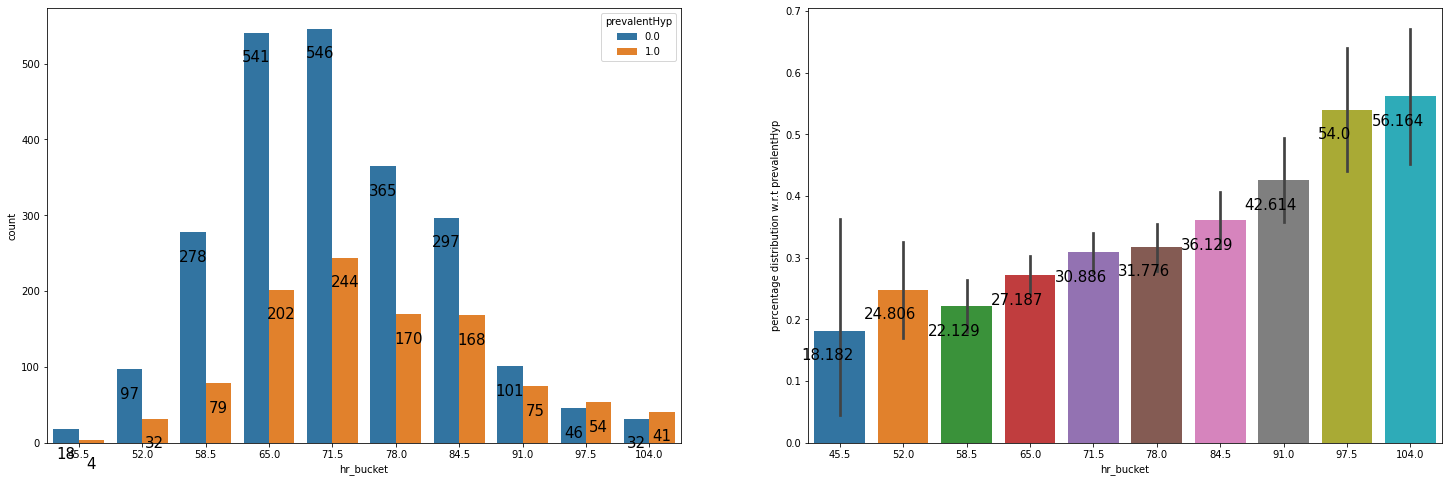

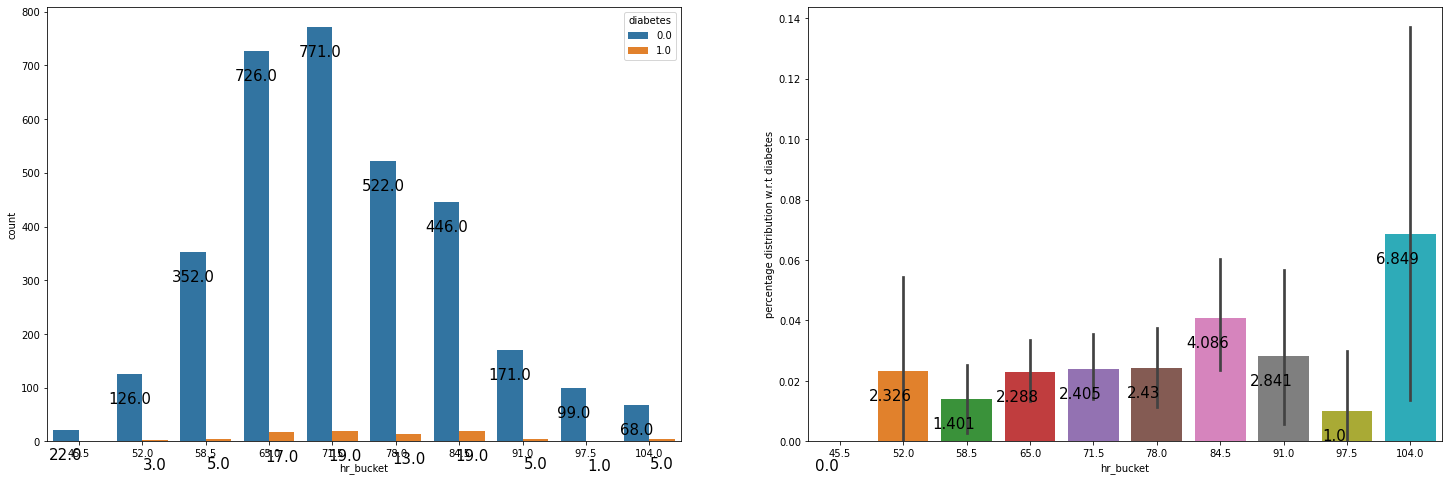

In [25]:
#For better further analysis binning is implemented on age feature
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   Females and people with prevalent hypertension tend to have higher heart rates.



### Analysis with respect to glucose

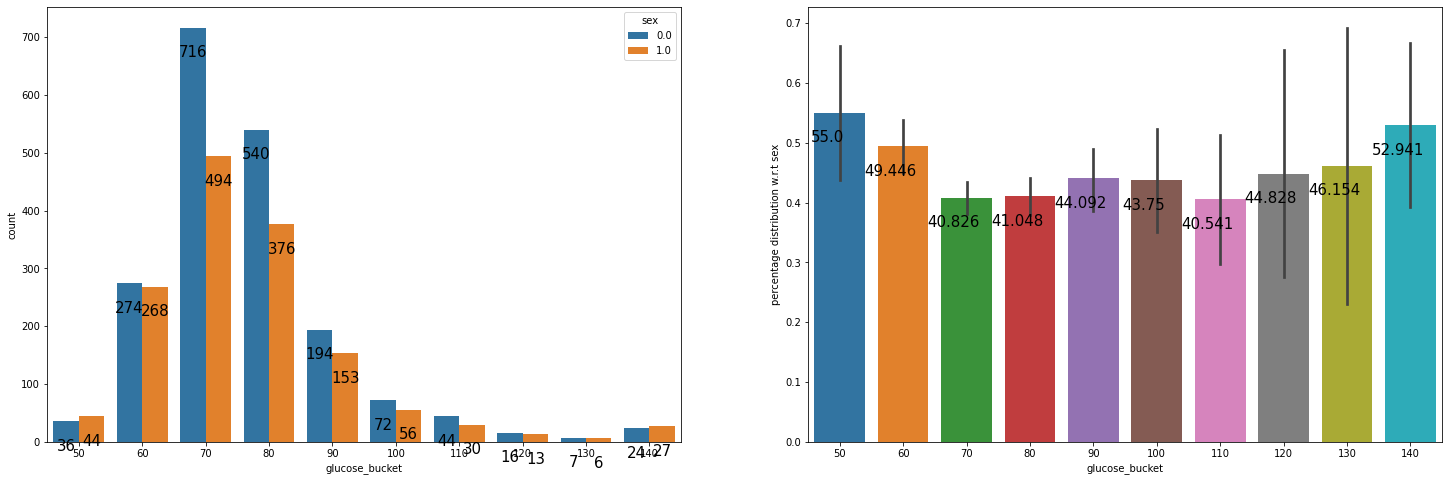

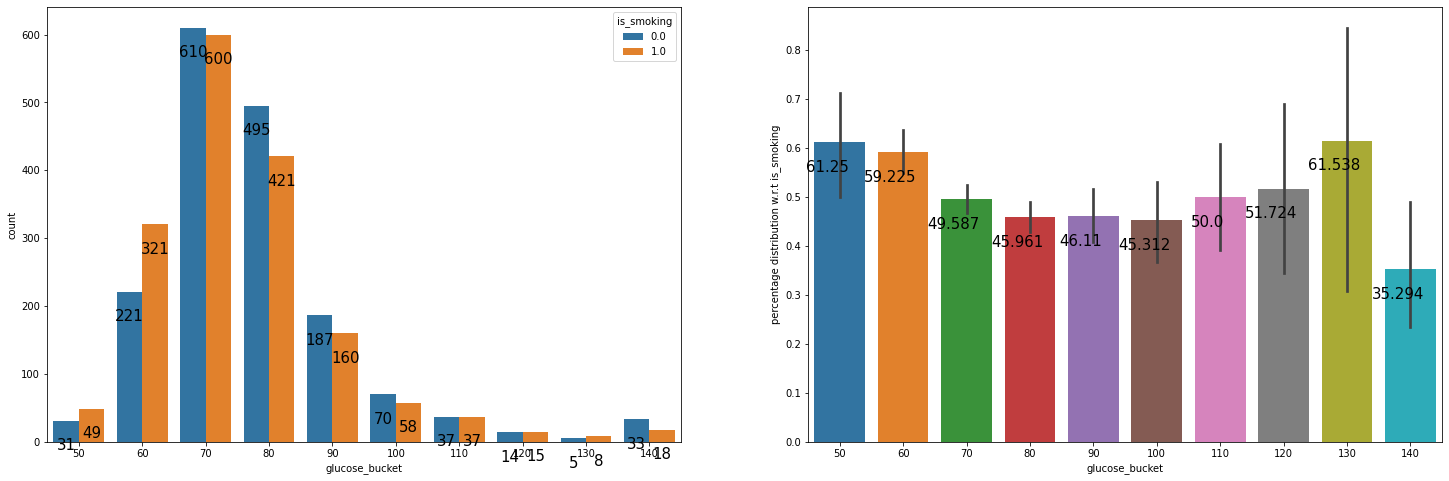

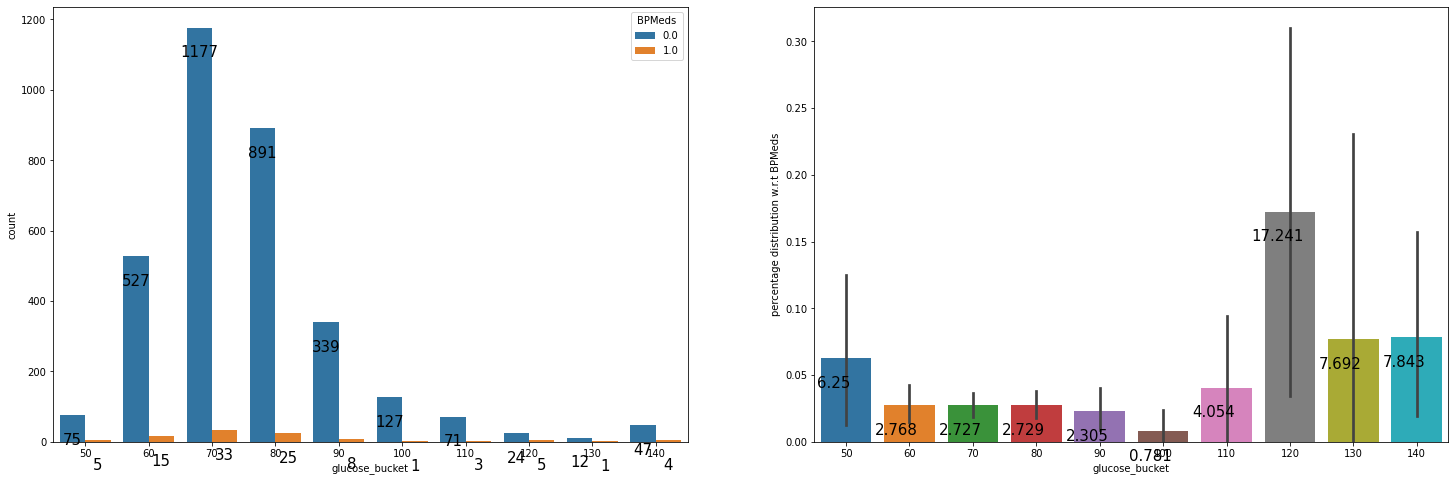

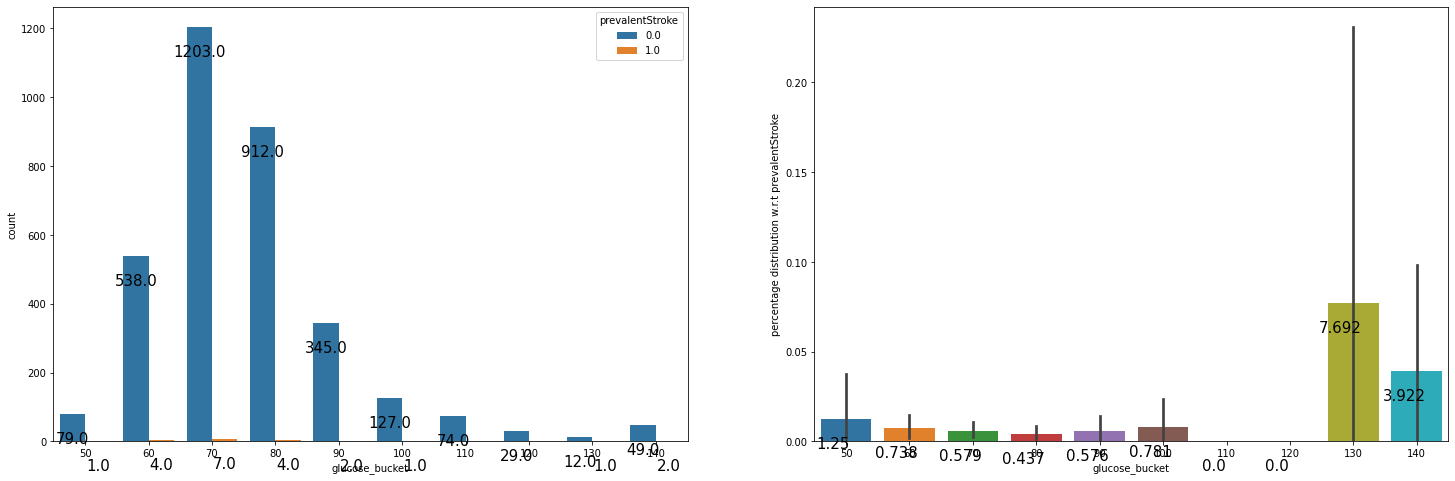

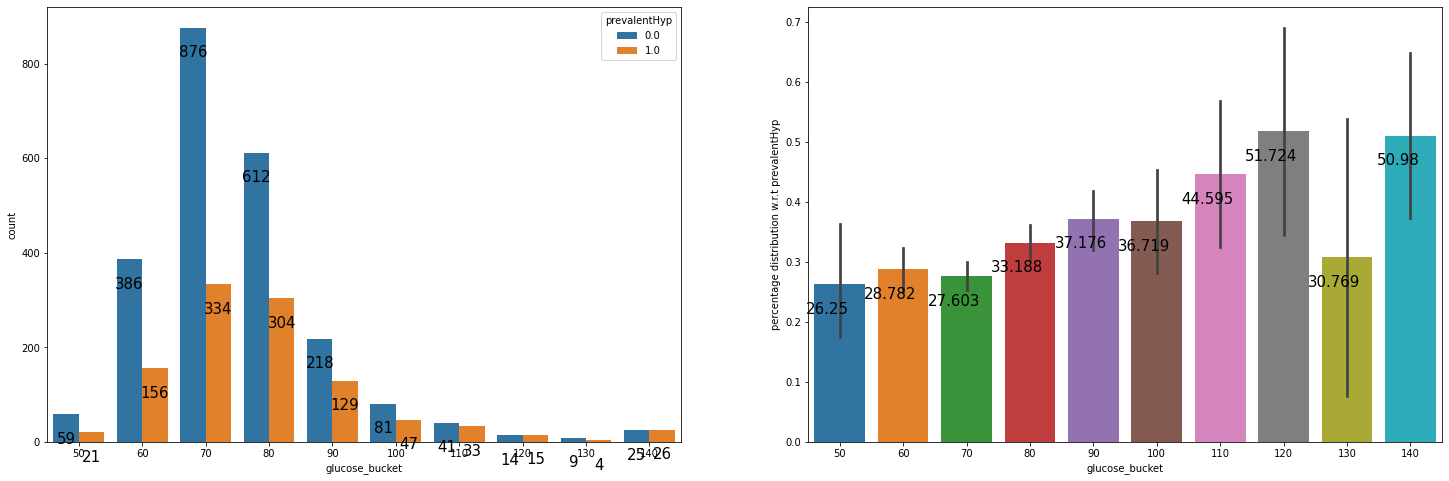

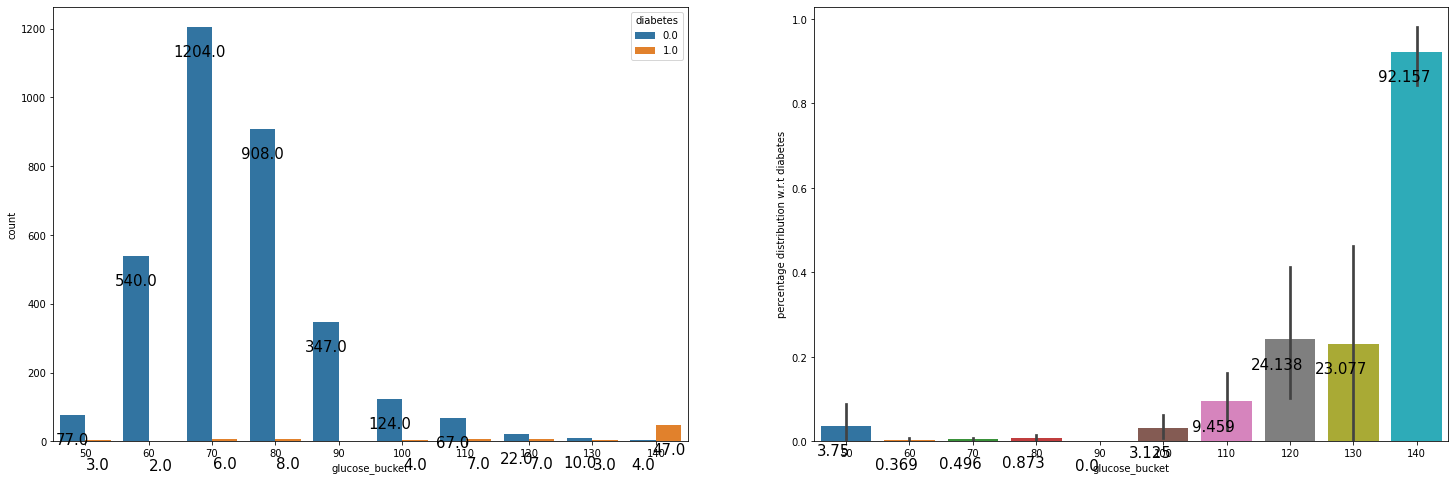

In [26]:
#For better further analysis binning is implemented on age feature
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10)))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   People with prevalent hypertension tend to have higher glucose levels.



## Analysing numerical features with respect to target feature 

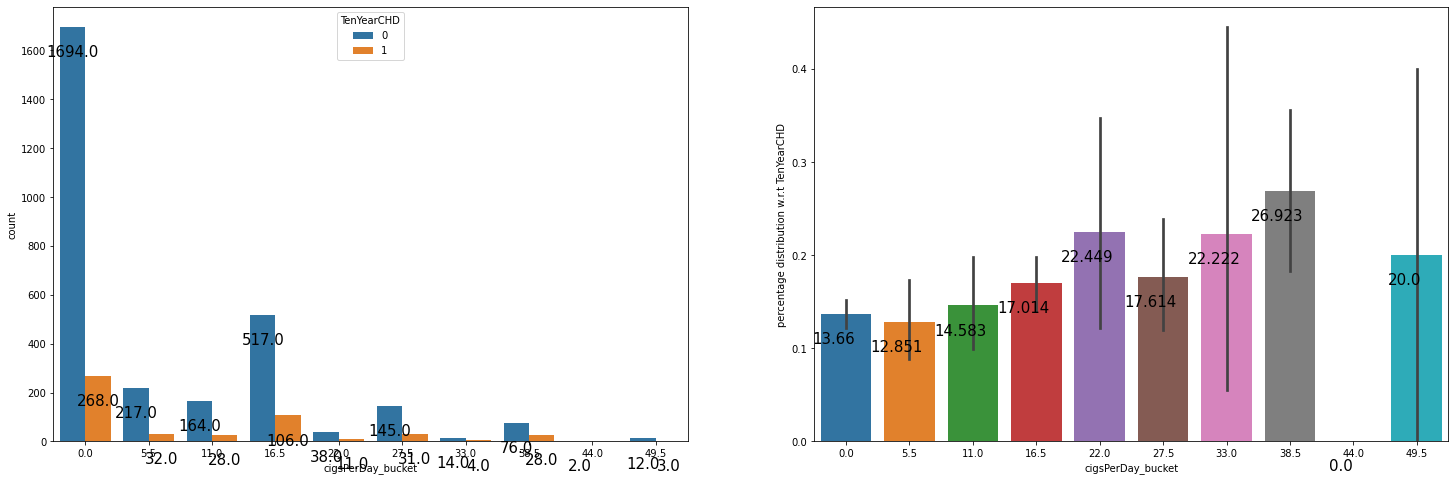

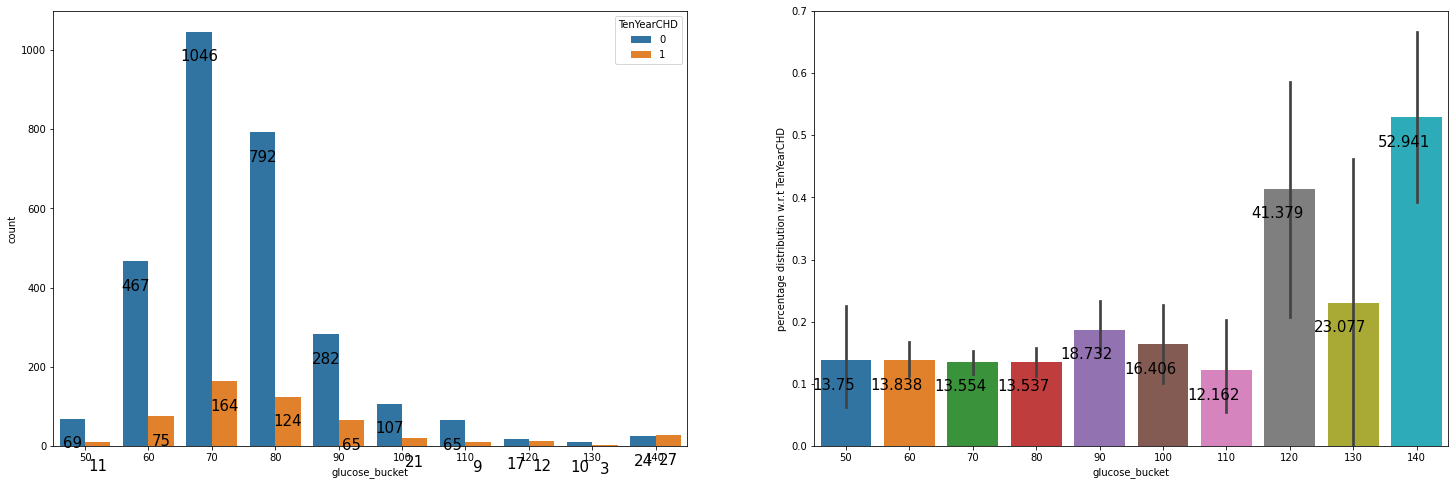

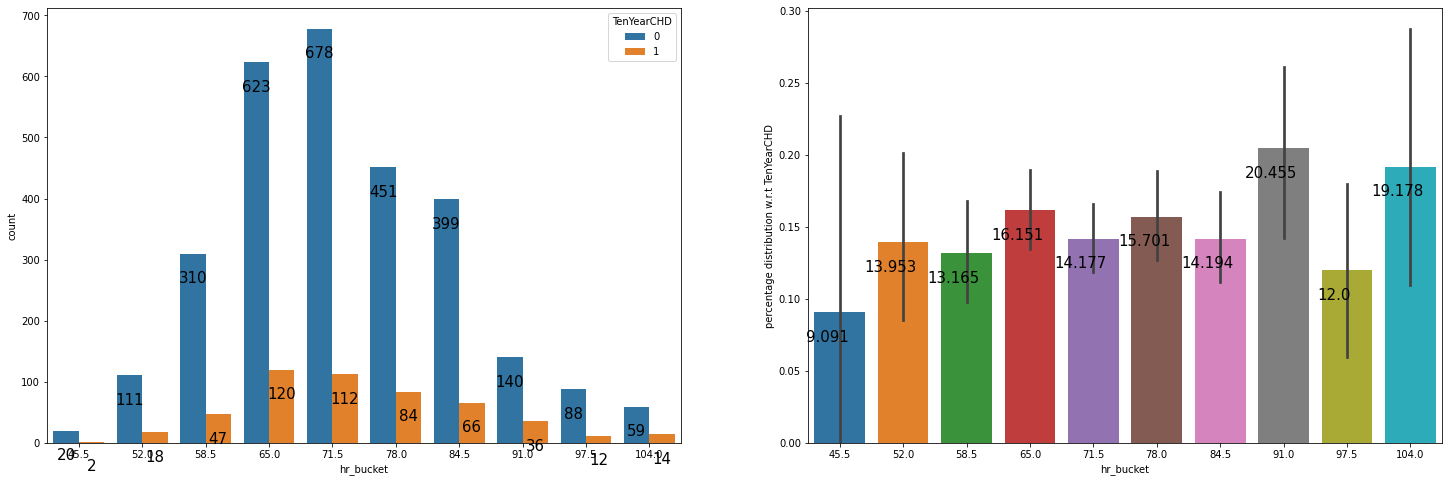

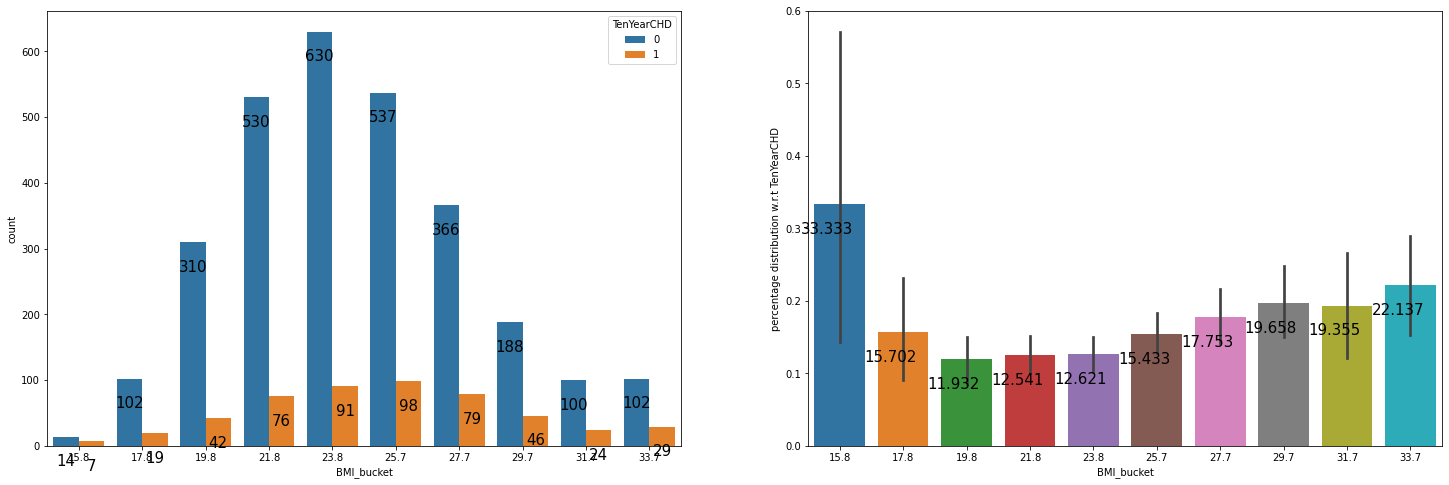

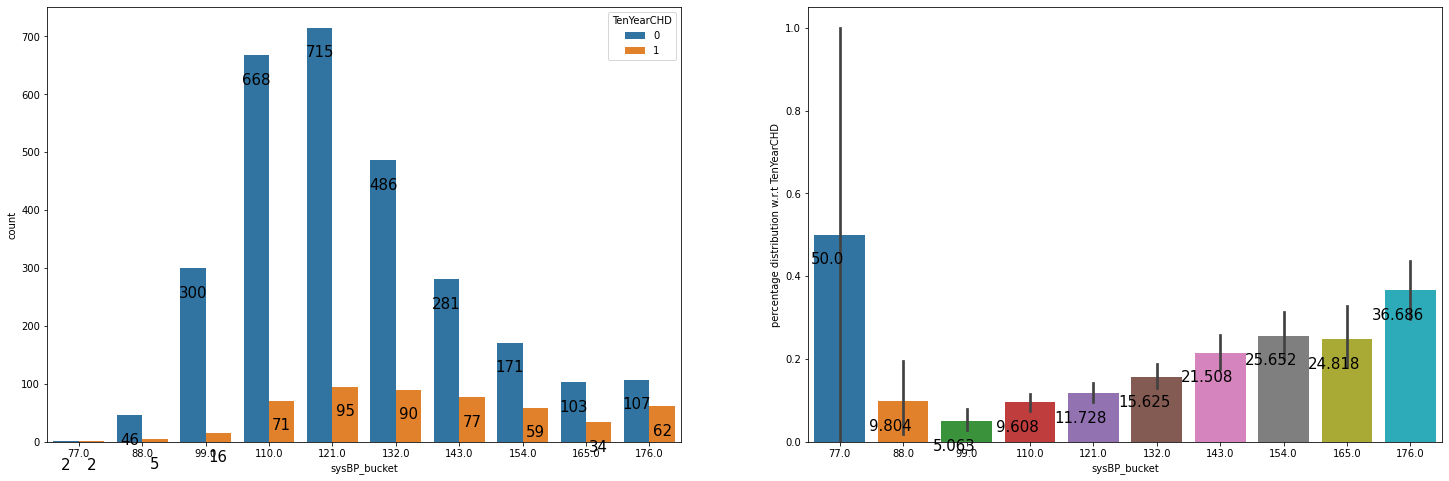

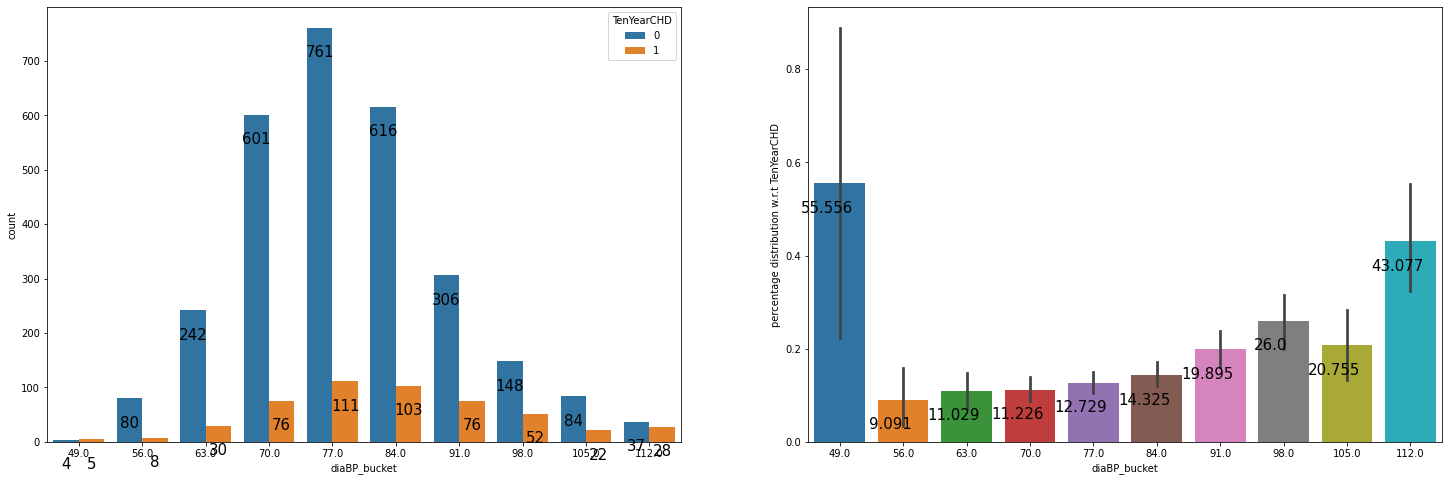

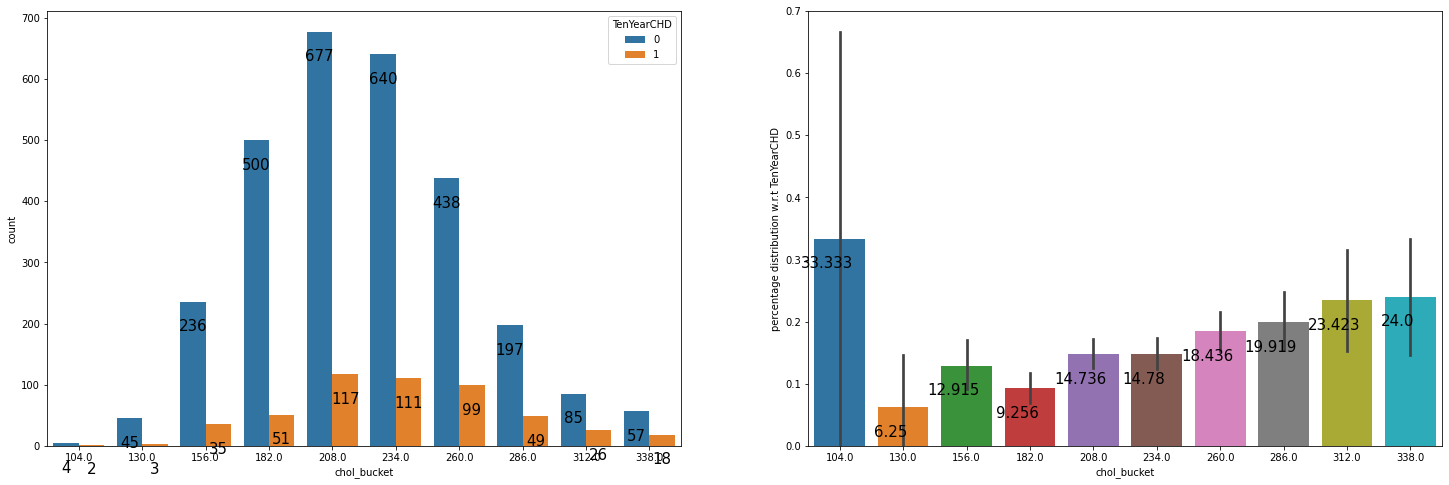

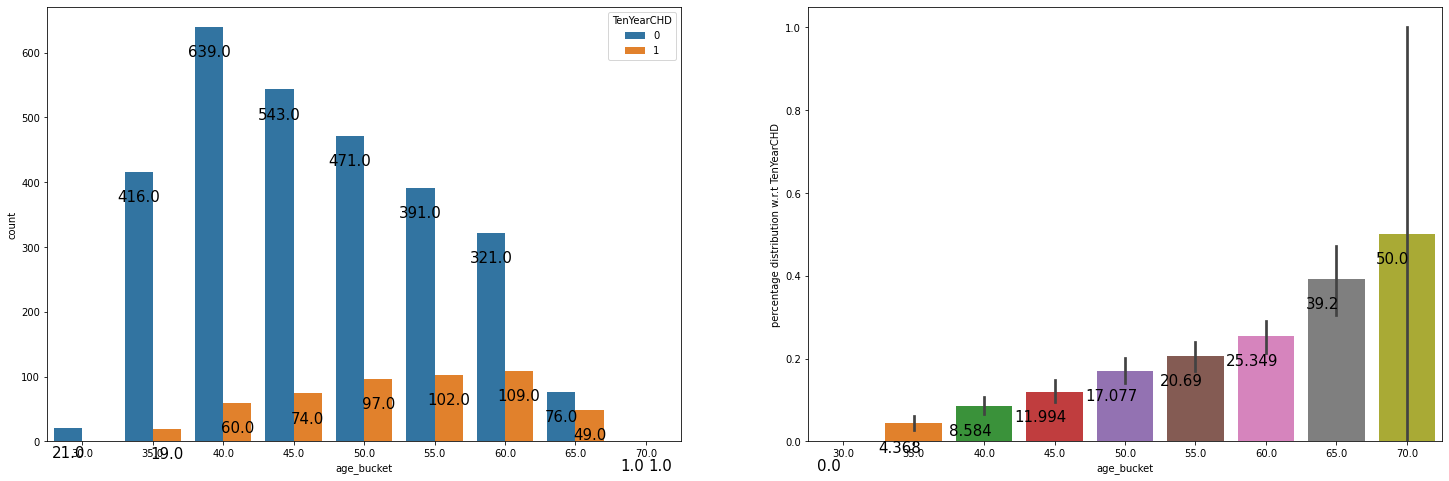

In [27]:
#Analysising age feature with respect to other categorical features
for v in ['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(v,'TenYearCHD', data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.



# Feature selection and final data processing

In [28]:
#droping those binned features which were created while doing EDA
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

In [30]:
data_df=data_df.apply(pd.to_numeric)#for further analysis,converting data values to numeric since some values are encoded as 'object' Dtype


## correlation analysis

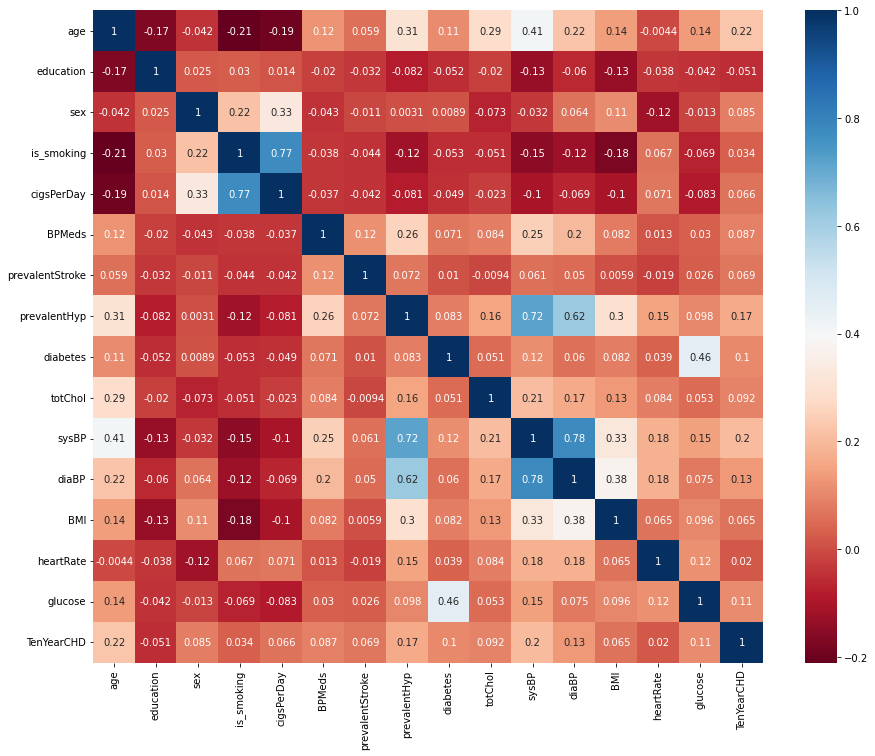

In [33]:
#Checking correlation between each features
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

REMARKS:

'SysBP' and 'DiaBp' is having high correlation of 0.78 followed by 'cigsPerDay' and 'is_smoking' with 0.77, 'SysBP' and 'prevalentHyp' with 0.72  and 'DiaBp' and 'prevalentHyp' with 0.62.

In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.



In [34]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])#Introducing 'PP' feature in the dataset
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])#removing other irrelevant highly correlated features 

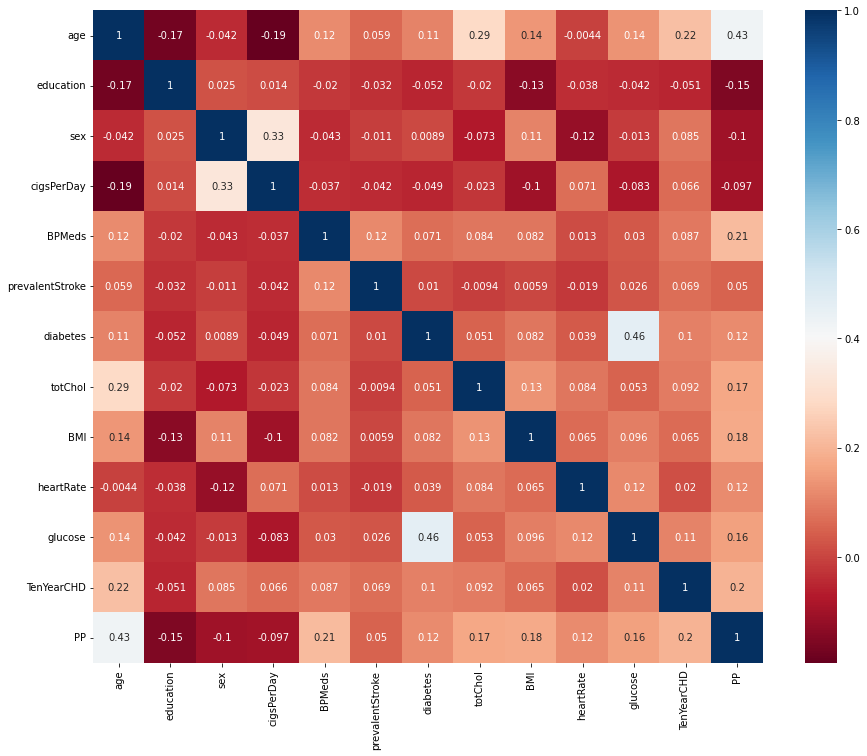

In [35]:
#Rechecking correlation after necessary changes
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

## Handling class imbalance

In [36]:
#Assigning x and y variables
X = data_df.drop(columns=['TenYearCHD'], axis=1)
y = data_df['TenYearCHD']

In [37]:
#checking value count of target variable
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Class imbalance is observed w.r.t target variable.

inorder to resolve class imbalance Synthetic Minority Over-sampling Technique is used here. 

In [38]:
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [39]:
#checking value count of target variable
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

## Feature selection based on information gain and feature importance

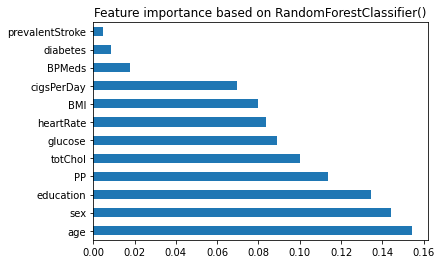

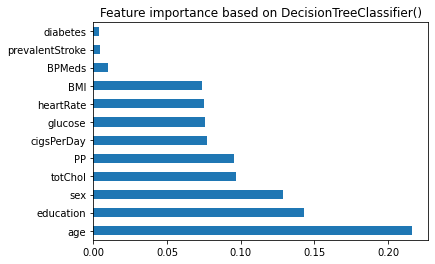

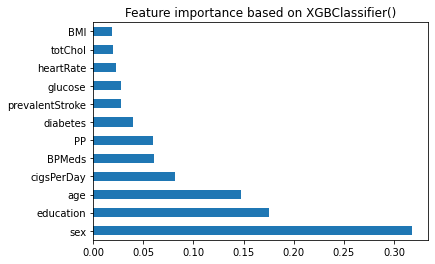

In [40]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

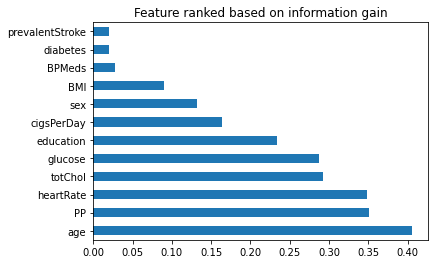

In [41]:
#Analysing feature based on information gain using mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
ranked_features=pd.Series(mutual_data,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')#barplot based based on information gain
plt.title('Feature ranked based on information gain')
plt.show()

REMARKS:

After analysing feature importance and mutual information, features such as 'prevalentStroke','diabetes','BPMeds' and 'BMI' are having less preference.

In [42]:
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])#Droping features from x variables for further model implementation.

# Model Implementation

## Initialising Train and Test data sets

In [43]:
#Initialising train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [44]:
#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model implementation preprocessing

In [112]:
# Creating a dataframe for feeding evaluation score based on each model implemented
model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1'])
 
# Creating necessary dictionaries for feeding the confusion matrix and ROC curve for each model implemented
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [50]:
# Creating a function for model implementation as well as feeding the evalution metrics  to the above dataframes dictionaries 
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df):
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:#for gridsearchcv
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      #model prediction
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      #model prediction
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    test_probs = test_probs[:,1]

    # Evaluation scores
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, test_preds))
    # Appendin the dataframe for each iteration
    model_df=model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve#This fuction returns the a dataframe with model evaluation score,
                                                                       #confusion_matrix and ROC curve

The below function is used during loop based cross validation and hyperparameter tuning

In [51]:
# Creating a function for model implementation
def model_build_param_wise(X_train, y_train, X_test, y_test, model_dict,model_df_1):
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)
    #For better understanding of parameter based performance rank feature is introduced with respect to each evaluation matric
    #new feature for ranking the evaluation scores
    model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
    model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

    model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
    model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

    model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
    model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

    model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
    model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

    model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
    model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

    #introducing new feature 'score' which is sum of all test score ranks
    model_df_1['score']=0
    for col in ["Test Accuracy Rank",
            "Test Precision Rank","Test Recall Rank",
            "Test ROC AUC Rank","Test F1 Rank"]:
        model_df_1['score']= model_df_1['score']+ model_df_1[col]
    #Sorting the dataframe based on the 'score'
    model_df_1=model_df_1.sort_values(by='score',ascending=False)
    

  return model_df_1

## 1. Decision Tree Classifier

In [113]:
# Creating a dictionary for model for passing in model built function
models = {'Decision Tree Classifier'        : DecisionTreeClassifier(random_state=42) }

# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       733
           1       0.80      0.85      0.82       707

    accuracy                           0.82      1440
   macro avg       0.82      0.82      0.82      1440
weighted avg       0.82      0.82      0.82      1440



In [114]:
model_df#Evaluation score

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Decision Tree Classifier             1.0       0.822917              1.0   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.803763           1.0     0.845827            1.0      0.823323   

   Train F1   Test F1  
0       1.0  0.824259

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**


In [54]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                  'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters'])  

In [55]:
#Cross validation and hyperparameter tuning
for x in range(5,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)                                                            


In [56]:
Decision_Tree_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Decision_Tree_param_wise

Model  Train Accuracy  Test Accuracy  \
0     Decision Tree Classifier tunned        0.967346       0.850000   
2     Decision Tree Classifier tunned        0.933071       0.848611   
1     Decision Tree Classifier tunned        0.933071       0.848611   
3     Decision Tree Classifier tunned        0.933071       0.847917   
11    Decision Tree Classifier tunned        0.933071       0.847917   
...                               ...             ...            ...   
7971  Decision Tree Classifier tunned        0.764243       0.710417   
7975  Decision Tree Classifier tunned        0.740852       0.708333   
7976  Decision Tree Classifier tunned        0.740852       0.708333   
7977  Decision Tree Classifier tunned        0.740621       0.708333   
7978  Decision Tree Classifier tunned        0.740621       0.708333   

      Train Precision  Test Precision  Train Recall  Test Recall  \
0            0.981965        0.849218      0.952578     0.844413   
2            0.952862        0.848787      0.912063     0.841584   
1            0.952862        0.848787      0.912063     0.841584   
3            0.952862        0.847578      0.912063     0.841584   
11           0.952862        0.847578      0.912063     0.841584   
...               ...             ...           ...          ...   
7971         0.783957        0.727987      0.733425     0.654880   
7975         0.776378        0.722481      0.680939     0.659123   
7976         0.776378        0.722481      0.680939     0.659123   
7977         0.775971        0.722481      0.680939     0.659123   
7978         0.775971        0.722481      0.680939     0.659123   

      Train ROC AUC  Test ROC AUC  Train F1  ...  Test Accuracy Rank  \
0          0.967435      0.849901  0.967048  ...              7980.0   
2          0.933198      0.848486  0.932016  ...              7978.5   
1          0.933198      0.848486  0.932016  ...              7978.5   
3          0.933198      0.847804  0.932016  ...              7970.5   
11         0.933198      0.847804  0.932016  ...              7970.5   
...             ...           ...       ...  ...                 ...   
7971       0.764429      0.709432  0.757850  ...               110.5   
7975       0.741215      0.707461  0.725533  ...               103.5   
7976       0.741215      0.707461  0.725533  ...               103.5   
7977       0.740982      0.707461  0.725356  ...               103.5   
7978       0.740982      0.707461  0.725356  ...               103.5   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
0                  7609.0               7528.0             7646.0   
2                  7165.5               7516.5             6986.0   
1                  7165.5               7516.5             6986.0   
3                  7165.5               7479.5             6986.0   
11                 7165.5               7479.5             6986.0   
...                   ...                  ...                ...   
7971                506.5                302.5              776.5   
7975                396.5                264.5              262.5   
7976                396.5                264.5              262.5   
7977                389.5                264.5              262.5   
7978                389.5                264.5              262.5   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
0               7868.0              7666.0             7980.0         7670.0   
2               7797.0              7124.5             7978.5         7121.5   
1               7797.0              7124.5             7978.5         7121.5   
3               7797.0              7124.5             7970.5         7121.5   
11              7797.0              7124.5             7970.5         7121.5   
...                ...                 ...                ...            ...   
7971             203.5               676.5              107.5          729.5   
7975            

In [57]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
Decision_Tree_param_wise[Decision_Tree_param_wise['Test Recall']>0.850071][['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6117        0.746410       0.723611         0.692528        0.662461   
6420        0.710283       0.692361         0.657651        0.632797   
606         1.000000       0.833333         1.000000        0.807642   
607         1.000000       0.833333         1.000000        0.807642   
608         1.000000       0.833333         1.000000        0.807642   
605         1.000000       0.833333         1.000000        0.807642   
713         0.991894       0.831250         0.989016        0.805263   
712         0.991894       0.831250         0.989016        0.805263   
489         0.998610       0.834722         0.999078        0.810596   
488         0.998610       0.834722         0.999078        0.810596   
645         0.999768       0.831944         0.999540        0.807133   
646         0.999768       0.831944         0.999540        0.807133   
5383        0.759611       0.760417         0.719258        0.710956   
5386        0.759611       0.760417         0.719258        0.710956   
5385        0.759611       0.760417         0.719258        0.710956   
5384        0.759611       0.760417         0.719258        0.710956   
901         0.998610       0.826389         0.998160        0.801054   
902         0.998610       0.826389         0.998160        0.801054   
421         0.998379       0.835417         0.997701        0.815860   
422         0.998379       0.835417         0.997701        0.815860   
97          0.995831       0.843750         0.994490        0.829235   
96          0.995831       0.843750         0.994490        0.829235   
1133        0.986568       0.822917         0.982648        0.798153   
1134        0.986568       0.822917         0.982648        0.798153   
819         0.998379       0.827083         0.996788        0.805333   
886         0.992358       0.826389         0.992177        0.804261   
885         0.992358       0.826389         0.992177        0.804261   
818         0.998379       0.827083         0.996788        0.805333   
786         0.952524       0.827778         0.953017        0.806409   
785         0.952524       0.827778         0.953017        0.806409   
1234        0.996063       0.821528         0.993135        0.797619   
89          0.952524       0.842361         0.957655        0.830579   
88          0.952524       0.842361         0.957655        0.830579   
1400        0.993979       0.819444         0.993560        0.795244   
5027        0.796897       0.772222         0.762040        0.729697   
5028        0.796897       0.772222         0.762040        0.729697   
5029        0.796897       0.772222         0.762040        0.729697   
5030        0.796897       0.772222         0.762040        0.729697   

      Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
6117      0.891805     0.891089       0.745530      0.726581  0.759952   
6420      0.884438     0.889675       0.709228      0.695861  0.739565   
606       1.000000     0.867044       1.000000      0.833931  0.836289   
607       1.000000     0.867044       1.000000      0.833931  0.836289   
608       1.000000     0.867044       1.000000      0.833931  0.836289   
605       1.000000     0.867044       1.000000      0.833931  0.836289   
713       0.994936     0.865629       0.991876      0.831860  0.834356   
712       0.994936     0.865629       0.991876      0.831860  0.834356   
489       0.998158     0.865629       0.998613      0.835270  0.837209   
488       0.998158     0.865629       0.998613      0.835270  0.837209   
645       1.000000     0.864215       0.999767      0.832517  0.834699   
646       1.000000     0.864215       0.999767      0.832517  0.834699   
5383      0.856354     0.862801       0.759025      0.762232  0.779553   
5386      0.856354     0.862801       0.759025      0.762232  0.779553   
5385      0.856354     0.862801       0.759025      0.762232  0.779553   
5384      0.8

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [110]:
#the best parameters
Decision_Tree_param_wise['Parameters'][489]

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 7,
 'min_samples_leaf': 1}

In [115]:
#Appending the the same to the main dataframe for future comparison
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           param_grid={'max_depth':  [20],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': [7],
                                                                      'criterion': ['gini']},cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)                                                                     

DecisionTreeClassifier(max_depth=20, max_features=7, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       733
           1       0.81      0.87      0.84       707

    accuracy                           0.83      1440
   macro avg       0.84      0.84      0.83      1440
weighted avg       0.84      0.83      0.83      1440



Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier         1.00000       0.822917   
1  Decision Tree Classifier tunned         0.99861       0.834722   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.803763      1.000000     0.845827       1.000000   
1         0.999078        0.810596      0.998158     0.865629       0.998613   

   Test ROC AUC  Train F1   Test F1  
0      0.823323  1.000000  0.824259  
1      0.835270  0.998618  0.837209

Train and test confusion matrix for Decision Tree Classifier


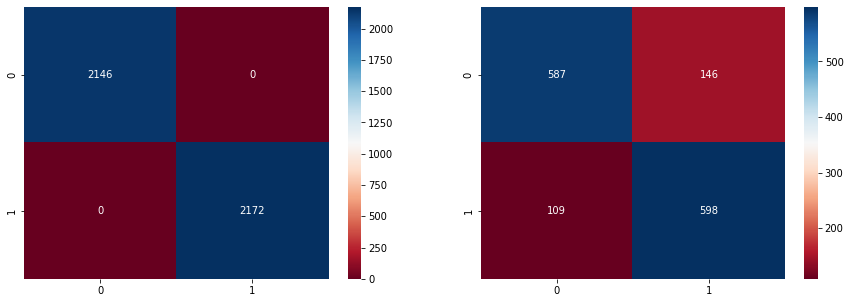

Train and test confusion matrix for Decision Tree Classifier tunned


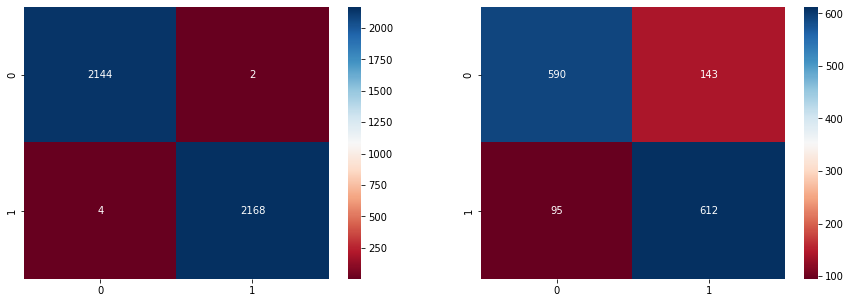

Text(0.5, 1.0, 'ROC CURVE')

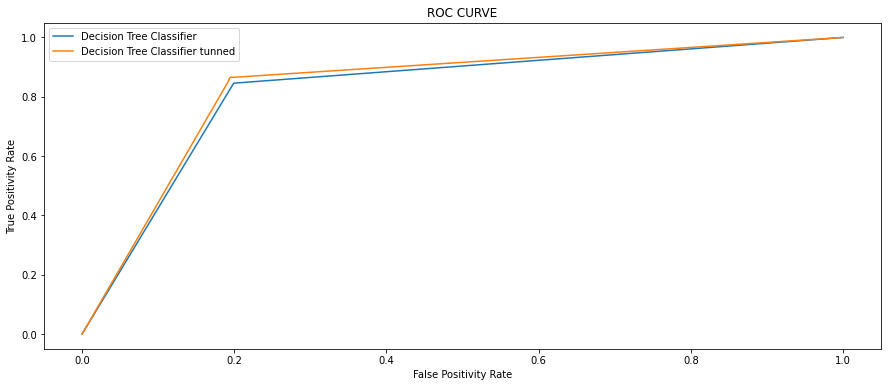

In [180]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Decision Tree Classifier','Decision Tree Classifier tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Decision Tree Classifier')
sns.heatmap(train_confusion_matrix['Decision Tree Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Decision Tree Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Decision Tree Classifier tunned')
sns.heatmap(train_confusion_matrix['Decision Tree Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Decision Tree Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Decision Tree Classifier']
sns.lineplot(x = value[0], y = value[1], label = 'Decision Tree Classifier')#ROC curve for untunned model
value=curve['Decision Tree Classifier tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Decision Tree Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 2. Logistic Regression classification

In [117]:
# Creating a dictionary for model for passing in model built function
models = {'Logistic Regression'        : LogisticRegression(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       733
           1       0.66      0.69      0.67       707

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



In [118]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.822917   
1  Decision Tree Classifier tunned        0.998610       0.834722   
2              Logistic Regression        0.660954       0.671528   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.803763      1.000000     0.845827       1.000000   
1         0.999078        0.810596      0.998158     0.865629       0.998613   
2         0.659892        0.657258      0.672652     0.691655       0.660883   

   Test ROC AUC  Train F1   Test F1  
0      0.823323  1.000000  0.824259  
1      0.835270  0.998618  0.837209  
2      0.671885  0.666211  0.674018

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [63]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])  

In [64]:
#Hyperparameter tuning for liblinear solver and updating model_df_1 for every parameter combination
for x in ['l1', 'l2']:
  for y in np.logspace(-5, 4, 30):
    for z in ['liblinear']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)  

#Hyperparameter tuning for 'lbfgs' & 'newton-cg' solver and updating model_df_1 for every parameter combination
for x in ['l2','none']:
  for y in np.logspace(-5, 4, 30):
    for z in ['lbfgs','newton-cg']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)   
          
#Hyperparameter tuning for 'elasticnet' solver and updating model_df_1 for every parameter combination
for x in ['elasticnet']:
  for y in np.logspace(-5, 4, 30):
    for z in ['saga']:
      for a in np.logspace(-5, 0, 30):
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z],
                                                                   'l1_ratio' :[a]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)    

In [65]:
Logistic_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Logistic_param_wise

Model  Train Accuracy  Test Accuracy  \
0     Logistic Regression tunned        0.664428       0.681944   
1     Logistic Regression tunned        0.666281       0.681944   
2     Logistic Regression tunned        0.665354       0.681250   
13    Logistic Regression tunned        0.662112       0.680556   
3     Logistic Regression tunned        0.662112       0.680556   
...                          ...             ...            ...   
1047  Logistic Regression tunned        0.496989       0.509028   
1048  Logistic Regression tunned        0.496989       0.509028   
1049  Logistic Regression tunned        0.496989       0.509028   
1051  Logistic Regression tunned        0.496989       0.509028   
1034  Logistic Regression tunned        0.496989       0.509028   

      Train Precision  Test Precision  Train Recall  Test Recall  \
0            0.663353        0.669850      0.675875     0.694484   
1            0.665310        0.669850      0.677256     0.694484   
2            0.664405        0.668937      0.676335     0.694484   
13           0.660803        0.668027      0.674494     0.694484   
3            0.660803        0.668027      0.674494     0.694484   
...               ...             ...           ...          ...   
1047         0.000000        0.000000      0.000000     0.000000   
1048         0.000000        0.000000      0.000000     0.000000   
1049         0.000000        0.000000      0.000000     0.000000   
1051         0.000000        0.000000      0.000000     0.000000   
1034         0.000000        0.000000      0.000000     0.000000   

      Train ROC AUC  Test ROC AUC   Test F1  ...  Test Accuracy Rank  \
0          0.664359      0.682167  0.681944  ...              1079.5   
1          0.666214      0.682167  0.681944  ...              1079.5   
2          0.665288      0.681485  0.681471  ...              1078.0   
13         0.662037      0.680803  0.680999  ...              1067.5   
3          0.662037      0.680803  0.680999  ...              1067.5   
...             ...           ...       ...  ...                 ...   
1047       0.500000      0.500000  0.000000  ...                39.5   
1048       0.500000      0.500000  0.000000  ...                39.5   
1049       0.500000      0.500000  0.000000  ...                39.5   
1051       0.500000      0.500000  0.000000  ...                39.5   
1034       0.500000      0.500000  0.000000  ...                39.5   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
0                  1046.0               1079.5              865.0   
1                  1069.0               1079.5              890.0   
2                  1059.0               1078.0              869.5   
13                  946.5               1066.0              841.5   
3                   946.5               1066.0              841.5   
...                   ...                  ...                ...   
1047                 26.5                 26.5               26.5   
1048                 26.5                 26.5               26.5   
1049                 26.5                 26.5               26.5   
1051                 26.5                 26.5               26.5   
1034                 26.5                 26.5               26.5   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
0                957.5              1013.0             1079.5          894.0   
1                957.5              1070.0             1079.5          941.0   
2                957.5              1058.0             1078.0          910.0   
13               957.5               911.5             1068.0          837.5   
3                957.5               911.5             1068.0          837.5   
...                ...                 ...                ...            ...   
1047              26.5                32.5               32.5           26.5   
1048              26.5                32.5               32.5          

In [66]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
df=Logistic_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].sort_values(by='Train Precision',ascending=False)
df[(df['Test Recall']>0.691655) & (df['Test Accuracy']>0.676389)].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
40        0.666281       0.679167         0.665459        0.665765   
41        0.665354       0.679167         0.664405        0.665765   
42        0.668597       0.679167         0.667875        0.666214   
9         0.662112       0.680556         0.660803        0.668027   
24        0.662575       0.679861         0.661109        0.667120   
12        0.662575       0.680556         0.661109        0.668027   
6         0.662344       0.680556         0.661101        0.668027   
4         0.662344       0.680556         0.661101        0.668027   
15        0.662112       0.680556         0.660803        0.668027   
5         0.662112       0.680556         0.660803        0.668027   
11        0.662112       0.680556         0.660803        0.668027   
14        0.662112       0.680556         0.660803        0.668027   
7         0.662112       0.680556         0.660803        0.668027   
10        0.662112       0.680556         0.660803        0.668027   
25        0.664196       0.679861         0.662759        0.667120   
17        0.662112       0.680556         0.660803        0.668027   
8         0.662112       0.680556         0.660803        0.668027   
3         0.662112       0.680556         0.660803        0.668027   
13        0.662112       0.680556         0.660803        0.668027   
18        0.662112       0.680556         0.660803        0.668027   
20        0.662112       0.680556         0.660803        0.668027   
16        0.662112       0.680556         0.660803        0.668027   
21        0.662112       0.680556         0.660803        0.668027   
23        0.663270       0.679861         0.661712        0.667120   
19        0.662112       0.680556         0.660803        0.668027   
47        0.667670       0.677778         0.666516        0.664411   
43        0.666049       0.678472         0.665458        0.665312   
1         0.666281       0.681944         0.665310        0.669850   
2         0.665354       0.681250         0.664405        0.668937   
0         0.664428       0.681944         0.663353        0.669850   
46        0.664196       0.677778         0.663348        0.664411   
44        0.667439       0.678472         0.666969        0.665761   
48        0.663733       0.677778         0.662602        0.664858   
45        0.666281       0.678472         0.665011        0.665761   
28        0.665354       0.679861         0.664257        0.667575   
29        0.664660       0.679861         0.662770        0.667575   
33        0.664660       0.679861         0.662770        0.667575   
38        0.664660       0.679861         0.662770        0.667575   
30        0.664660       0.679861         0.662770        0.667575   
37        0.664660       0.679861         0.662770        0.667575   
36        0.664660       0.679861         0.662770        0.667575   
31        0.664660       0.679861         0.662770        0.667575   
27        0.664660       0.679861         0.662770        0.667575   
26        0.664660       0.679861         0.662770        0.667575   
32        0.664660       0.679861         0.662770        0.667575   
39        0.664660       0.679861         0.662770        0.667575   
22        0.662575       0.680556         0.661545        0.668486   
35        0.664660       0.679861         0.662770        0.667575   
34        0.664660       0.679861         0.662770        0.667575   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
40      0.676796     0.695898       0.666217      0.679463  0.680498   
41      0.676335     0.695898       0.665288      0.679463  0.680498   
42      0.678637     0.694484       0.668536      0.679438  0.680055   
9       0.674494     0.694484       0.662037      0.680803  0.680999   
24      0.675414     0.694484       0.662497      0.680120  0.680527   
12      0.675414     0.694484       0.662497      0.680803  0.680999   

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [119]:
#the best parameters
Logistic_param_wise['Parameters'][40]

{'C': 0.006210169418915616,
 'l1_ratio': 0.20433597178569438,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [120]:
#Appending the the same to the main dataframe for future comparison
models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : ['elasticnet'],
                                                                   'C'       : [0.006210169418915616],
                                                                   'solver'  : ['saga'],
                                                                   'l1_ratio' :[0.20433597178569438]}
                                                      )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

LogisticRegression(C=0.006210169418915616, l1_ratio=0.20433597178569438,
                   penalty='elasticnet', random_state=42, solver='saga')
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       733
           1       0.67      0.70      0.68       707

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
2         Logistic Regression        0.660954       0.671528         0.659892   
3  Logistic Regression tunned        0.666281       0.679167         0.665459   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
2        0.657258      0.672652     0.691655       0.660883      0.671885   
3        0.665765      0.676796     0.695898       0.666217      0.679463   

   Train F1   Test F1  
2  0.666211  0.674018  
3  0.671080  0.680498

Train and test confusion matrix for Logistic Regression


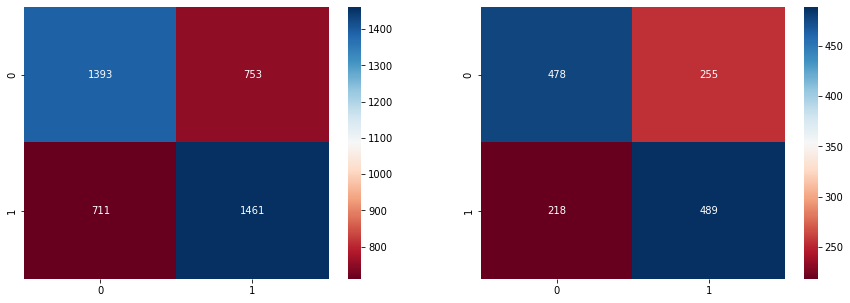

Train and test confusion matrix for Logistic Regression tunned


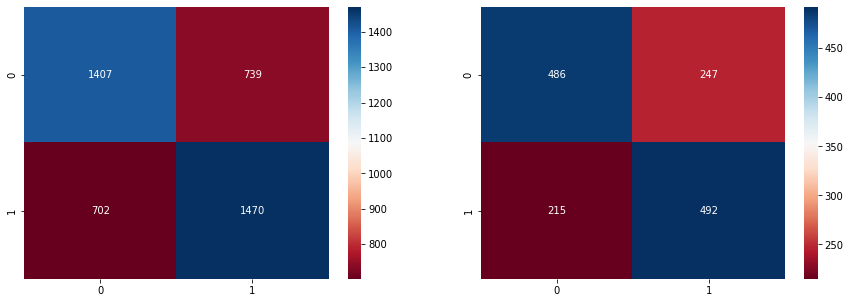

Text(0.5, 1.0, 'ROC CURVE')

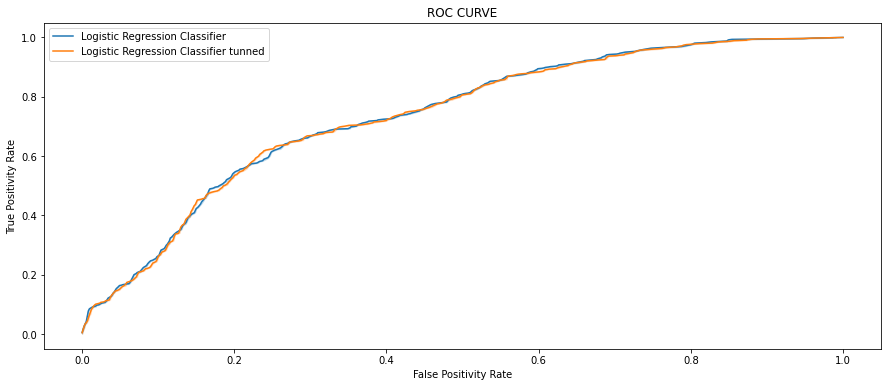

In [182]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Logistic Regression','Logistic Regression tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Logistic Regression')
sns.heatmap(train_confusion_matrix['Logistic Regression'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Logistic Regression'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Logistic Regression tunned')
sns.heatmap(train_confusion_matrix['Logistic Regression tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Logistic Regression tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Logistic Regression']
sns.lineplot(x = value[0], y = value[1], label = 'Logistic Regression Classifier')#ROC curve for untunned model
value=curve['Logistic Regression tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Logistic Regression Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 3. KN Classifier

In [122]:
# Creating a dictionary for model for passing in model built function
models = {'KNN' : KNeighborsClassifier()}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       733
           1       0.75      0.94      0.83       707

    accuracy                           0.82      1440
   macro avg       0.84      0.82      0.81      1440
weighted avg       0.84      0.82      0.81      1440



In [123]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.822917   
1  Decision Tree Classifier tunned        0.998610       0.834722   
2              Logistic Regression        0.660954       0.671528   
3       Logistic Regression tunned        0.666281       0.679167   
4                              KNN        0.879111       0.816667   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.803763      1.000000     0.845827       1.000000   
1         0.999078        0.810596      0.998158     0.865629       0.998613   
2         0.659892        0.657258      0.672652     0.691655       0.660883   
3         0.665459        0.665765      0.676796     0.695898       0.666217   
4         0.820513        0.748597      0.972376     0.943423       0.878546   

   Test ROC AUC  Train F1   Test F1  
0      0.823323  1.000000  0.824259  
1      0.835270  0.998618  0.837209  
2      0.671885  0.666211  0.674018  
3      0.679463  0.671080  0.680498  
4      0.818915  0.890013  0.834793

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [72]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [73]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in range(1,10):
  for y in ['uniform','distance']:
    for z in ['minkowski','euclidean','manhattan']:
        models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [x],
                                                   'weights' : [y],
                                                   'metric' : [z]},
                                      cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [74]:
KNN_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
KNN_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0   KNN tunned        1.000000       0.900000         1.000000   
1   KNN tunned        1.000000       0.900000         1.000000   
2   KNN tunned        1.000000       0.900000         1.000000   
3   KNN tunned        1.000000       0.879861         1.000000   
4   KNN tunned        1.000000       0.879861         1.000000   
5   KNN tunned        1.000000       0.879861         1.000000   
6   KNN tunned        1.000000       0.879861         1.000000   
7   KNN tunned        1.000000       0.879861         1.000000   
8   KNN tunned        1.000000       0.879861         1.000000   
9   KNN tunned        1.000000       0.879861         1.000000   
10  KNN tunned        1.000000       0.872917         1.000000   
11  KNN tunned        0.983789       0.891667         1.000000   
12  KNN tunned        1.000000       0.870833         1.000000   
13  KNN tunned        1.000000       0.865278         1.000000   
14  KNN tunned        1.000000       0.868750         1.000000   
17  KNN tunned        0.984715       0.872222         1.000000   
18  KNN tunned        0.984715       0.872222         1.000000   
15  KNN tunned        1.000000       0.856250         1.000000   
16  KNN tunned        1.000000       0.856250         1.000000   
19  KNN tunned        1.000000       0.863194         1.000000   
22  KNN tunned        0.932839       0.863889         0.890781   
20  KNN tunned        1.000000       0.847222         1.000000   
21  KNN tunned        1.000000       0.847222         1.000000   
53  KNN tunned        1.000000       0.863194         1.000000   
23  KNN tunned        0.934924       0.865278         0.922664   
24  KNN tunned        0.905743       0.848611         0.860057   
25  KNN tunned        1.000000       0.838194         1.000000   
26  KNN tunned        1.000000       0.838194         1.000000   
27  KNN tunned        0.916628       0.838889         0.863563   
28  KNN tunned        0.916628       0.838889         0.863563   
29  KNN tunned        0.917786       0.841667         0.891426   
30  KNN tunned        0.917786       0.841667         0.891426   
31  KNN tunned        1.000000       0.830556         1.000000   
32  KNN tunned        1.000000       0.830556         1.000000   
33  KNN tunned        0.905743       0.838194         0.887231   
34  KNN tunned        0.888837       0.836111         0.845024   
35  KNN tunned        1.000000       0.828472         1.000000   
36  KNN tunned        1.000000       0.828472         1.000000   
37  KNN tunned        1.000000       0.827083         1.000000   
38  KNN tunned        1.000000       0.827083         1.000000   
39  KNN tunned        0.888143       0.830556         0.873177   
40  KNN tunned        0.888606       0.825694         0.855401   
41  KNN tunned        0.888606       0.825694         0.855401   
42  KNN tunned        1.000000       0.824306         1.000000   
43  KNN tunned        1.000000       0.824306         1.000000   
44  KNN tunned        0.873089       0.826389         0.834156   
45  KNN tunned        0.879111       0.816667         0.820513   
46  KNN tunned        0.879111       0.816667         0.820513   
47  KNN tunned        0.870310       0.813889         0.837521   
48  KNN tunned        0.870310       0.813889         0.837521   
49  KNN tunned        0.860352       0.806944         0.802079   
50  KNN tunned        0.860352       0.806944         0.802079   
51  KNN tunned        0.845530       0.797222         0.790653   
52  KNN tunned        0.845530       0.797222         0.790653   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.846248      1.000000     0.973126       1.000000      0.901297   
1         0.846248      1.000000     0.973126       1.000000      0.901297   
2         0.846248      1.000000     0.973126       1.000000      0.901297   
3         0.817857      1.000000     0.971711       1.000000      

In [75]:
#Dataframe of evalustion scores for each combination of parameters
KNN_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
21        1.000000       0.847222         1.000000        0.770857   
20        1.000000       0.847222         1.000000        0.770857   
15        1.000000       0.856250         1.000000        0.783447   
10        1.000000       0.872917         1.000000        0.805361   
16        1.000000       0.856250         1.000000        0.783447   
1         1.000000       0.900000         1.000000        0.846248   
0         1.000000       0.900000         1.000000        0.846248   
2         1.000000       0.900000         1.000000        0.846248   
7         1.000000       0.879861         1.000000        0.817857   
13        1.000000       0.865278         1.000000        0.797909   
3         1.000000       0.879861         1.000000        0.817857   
8         1.000000       0.879861         1.000000        0.817857   
5         1.000000       0.879861         1.000000        0.817857   
4         1.000000       0.879861         1.000000        0.817857   
12        1.000000       0.870833         1.000000        0.805393   
6         1.000000       0.879861         1.000000        0.817857   
9         1.000000       0.879861         1.000000        0.818616   
25        1.000000       0.838194         1.000000        0.763920   
26        1.000000       0.838194         1.000000        0.763920   
19        1.000000       0.863194         1.000000        0.796512   
37        1.000000       0.827083         1.000000        0.751648   
38        1.000000       0.827083         1.000000        0.751648   
36        1.000000       0.828472         1.000000        0.753863   
28        0.916628       0.838889         0.863563        0.766554   
32        1.000000       0.830556         1.000000        0.756368   
35        1.000000       0.828472         1.000000        0.753863   
31        1.000000       0.830556         1.000000        0.756368   
27        0.916628       0.838889         0.863563        0.766554   
53        1.000000       0.863194         1.000000        0.798595   
42        1.000000       0.824306         1.000000        0.750000   
43        1.000000       0.824306         1.000000        0.750000   
22        0.932839       0.863889         0.890781        0.801653   
14        1.000000       0.868750         1.000000        0.808333   
45        0.879111       0.816667         0.820513        0.748597   
46        0.879111       0.816667         0.820513        0.748597   
24        0.905743       0.848611         0.860057        0.792814   
30        0.917786       0.841667         0.891426        0.791717   
29        0.917786       0.841667         0.891426        0.791717   
34        0.888837       0.836111         0.845024        0.786148   
40        0.888606       0.825694         0.855401        0.775362   
41        0.888606       0.825694         0.855401        0.775362   
23        0.934924       0.865278         0.922664        0.833550   
18        0.984715       0.872222         1.000000        0.844532   
17        0.984715       0.872222         1.000000        0.844532   
11        0.983789       0.891667         1.000000        0.876881   
47        0.870310       0.813889         0.837521        0.764140   
48        0.870310       0.813889         0.837521        0.764140   
44        0.873089       0.826389         0.834156        0.782447   
33        0.905743       0.838194         0.887231        0.811842   
39        0.888143       0.830556         0.873177        0.810738   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
21      1.000000     0.980198       1.000000      0.849581  0.863014   
20      1.000000     0.980198       1.000000      0.849581  0.863014   
15      1.000000     0.977369       1.000000      0.858398  0.869729   
10      1.000000     0.977369       1.000000      0.874769  0.883067   
16      1.000000     0.977369       1.000000      0.858398  0.869729   
1

In [125]:
#the best parameters
KNN_param_wise['Parameters'][3]

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}

In [126]:
#Appending the the same to the main dataframe for future comparison
models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [2],
                                                   'weights' : ['distance'],
                                                   'metric' : ['minkowski']},
                                      cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KNeighborsClassifier(n_neighbors=2, weights='distance')
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       733
           1       0.82      0.97      0.89       707

    accuracy                           0.88      1440
   macro avg       0.89      0.88      0.88      1440
weighted avg       0.89      0.88      0.88      1440



Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4         KNN        0.879111       0.816667         0.820513        0.748597   
5  KNN tunned        1.000000       0.879861         1.000000        0.817857   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
4      0.972376     0.943423       0.878546      0.818915  0.890013  0.834793  
5      1.000000     0.971711       1.000000      0.881490  1.000000  0.888171

Train and test confusion matrix for KNN


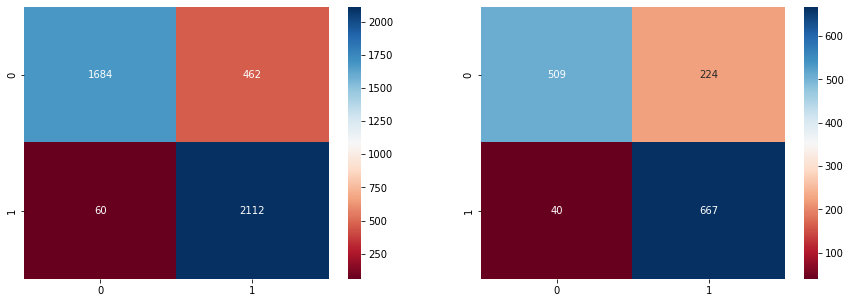

Train and test confusion matrix for KNN tunned


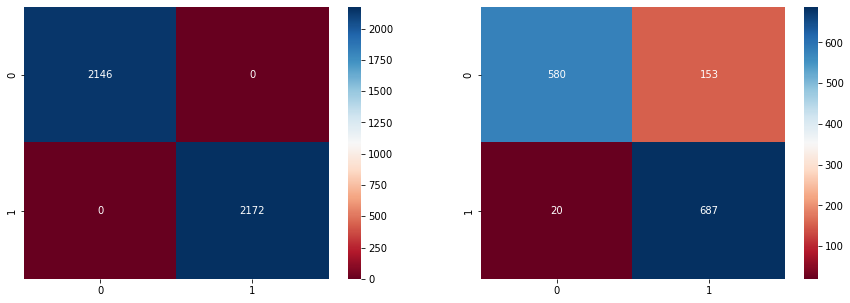

Text(0.5, 1.0, 'ROC CURVE')

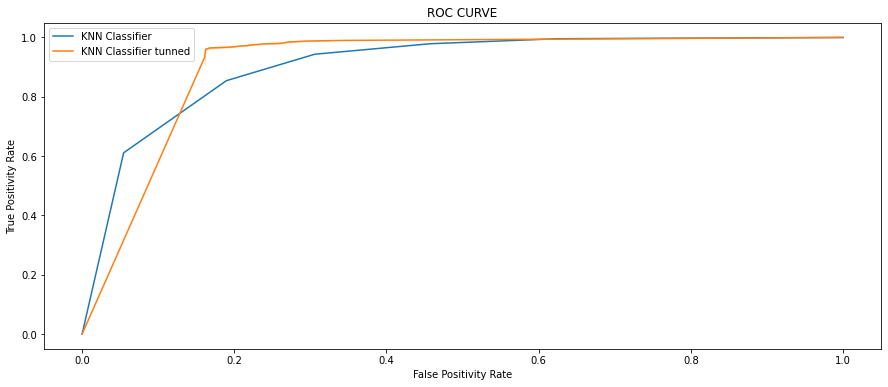

In [183]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['KNN','KNN tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for KNN')
sns.heatmap(train_confusion_matrix['KNN'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['KNN'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for KNN tunned')
sns.heatmap(train_confusion_matrix['KNN tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['KNN tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['KNN']
sns.lineplot(x = value[0], y = value[1], label = 'KNN Classifier')#ROC curve for untunned model
value=curve['KNN tunned']
sns.lineplot(x = value[0], y = value[1], label = 'KNN Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 4. Support vector classifier

In [128]:
# Creating a dictionary for model for passing in model built function
models = {'SVC'        : SVC(probability=True,random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       733
           1       0.78      0.75      0.76       707

    accuracy                           0.77      1440
   macro avg       0.77      0.77      0.77      1440
weighted avg       0.77      0.77      0.77      1440



In [129]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.822917   
1  Decision Tree Classifier tunned        0.998610       0.834722   
2              Logistic Regression        0.660954       0.671528   
3       Logistic Regression tunned        0.666281       0.679167   
4                              KNN        0.879111       0.816667   
5                       KNN tunned        1.000000       0.879861   
6                              SVC        0.789717       0.771528   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.803763      1.000000     0.845827       1.000000   
1         0.999078        0.810596      0.998158     0.865629       0.998613   
2         0.659892        0.657258      0.672652     0.691655       0.660883   
3         0.665459        0.665765      0.676796     0.695898       0.666217   
4         0.820513        0.748597      0.972376     0.943423       0.878546   
5         1.000000        0.817857      1.000000     0.971711       1.000000   
6         0.816951        0.776316      0.750000     0.751061       0.789958   

   Test ROC AUC  Train F1   Test F1  
0      0.823323  1.000000  0.824259  
1      0.835270  0.998618  0.837209  
2      0.671885  0.666211  0.674018  
3      0.679463  0.671080  0.680498  
4      0.818915  0.890013  0.834793  
5      0.881490  1.000000  0.888171  
6      0.771165  0.782045  0.763480

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [81]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [82]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [0.1, 1, 10, 100, 1000]:
        models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [x]}
                                            )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [83]:
SVC_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
SVC_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4  SVC tunned        0.977999       0.846528         0.973552        0.808376   
0  SVC tunned        0.935387       0.842361         0.930032        0.811688   
1  SVC tunned        0.863594       0.803472         0.875296        0.788043   
2  SVC tunned        0.789717       0.771528         0.816951        0.776316   
3  SVC tunned        0.707503       0.704861         0.705007        0.691576   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  ...  \
4      0.982965     0.900990       0.977969      0.847494  0.852174  ...   
0      0.942449     0.884017       0.935344      0.843100  0.846310  ...   
1      0.849908     0.820368       0.863677      0.803772  0.803881  ...   
2      0.750000     0.751061       0.789958      0.771165  0.763480  ...   
3      0.719613     0.719943       0.707430      0.705129  0.705475  ...   

   Test Accuracy Rank Train Precision Rank  Test Precision Rank  \
4                 5.0                  5.0                  4.0   
0                 4.0                  4.0                  5.0   
1                 3.0                  3.0                  3.0   
2                 2.0                  2.0                  2.0   
3                 1.0                  1.0                  1.0   

   Train Recall Rank  Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  \
4                5.0               5.0                 5.0                5.0   
0                4.0               4.0                 4.0                4.0   
1                3.0               3.0                 3.0                3.0   
2                2.0               2.0                 2.0                2.0   
3                1.0               1.0                 1.0                1.0   

   Train F1 Rank  Test F1 Rank  score  
4            5.0           5.0   24.0  
0            4.0           4.0   21.0  
1            3.0           3.0   15.0  
2            2.0           2.0   10.0  
3            1.0           1.0    5.0  

[5 rows x 23 columns]

In [84]:
#Dataframe of evalustion scores for each combination of parameters
SVC_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4        0.977999       0.846528         0.973552        0.808376   
0        0.935387       0.842361         0.930032        0.811688   
1        0.863594       0.803472         0.875296        0.788043   
2        0.789717       0.771528         0.816951        0.776316   
3        0.707503       0.704861         0.705007        0.691576   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  \
4      0.982965     0.900990       0.977969      0.847494  0.978236  0.852174   
0      0.942449     0.884017       0.935344      0.843100  0.936199  0.846310   
1      0.849908     0.820368       0.863677      0.803772  0.862415  0.803881   
2      0.750000     0.751061       0.789958      0.771165  0.782045  0.763480   
3      0.719613     0.719943       0.707430      0.705129  0.712235  0.705475   

                     Parameters  
4  {'C': 1000, 'kernel': 'rbf'}  
0   {'C': 100, 'kernel': 'rbf'}  
1    {'C': 10, 'kernel': 'rbf'}  
2     {'C': 1, 'kernel': 'rbf'}  
3   {'C': 0.1, 'kernel': 'rbf'}

In [85]:
#the best parameters
SVC_param_wise['Parameters'][4]

{'C': 1000, 'kernel': 'rbf'}

In [130]:
#Appending the the same to the main dataframe for future comparison
models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [1000]}
                                            )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

SVC(C=1000, probability=True, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       733
           1       0.81      0.90      0.85       707

    accuracy                           0.85      1440
   macro avg       0.85      0.85      0.85      1440
weighted avg       0.85      0.85      0.85      1440



Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6         SVC        0.789717       0.771528         0.816951        0.776316   
7  SVC tunned        0.977999       0.846528         0.973552        0.808376   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  
6      0.750000     0.751061       0.789958      0.771165  0.782045  0.763480  
7      0.982965     0.900990       0.977969      0.847494  0.978236  0.852174

Train and test confusion matrix for SVC


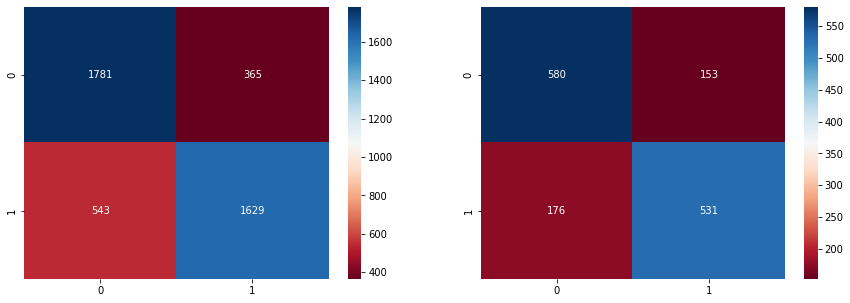

Train and test confusion matrix for SVC tunned


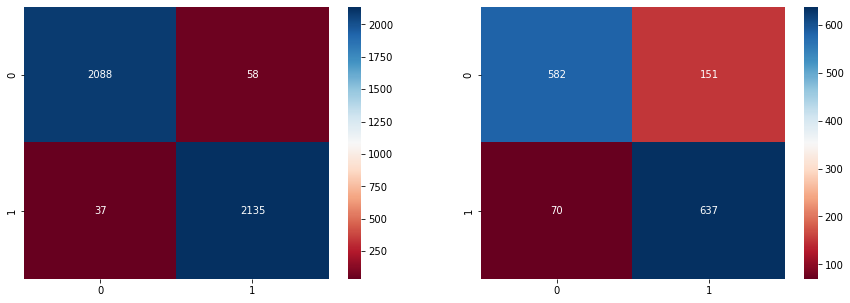

Text(0.5, 1.0, 'ROC CURVE')

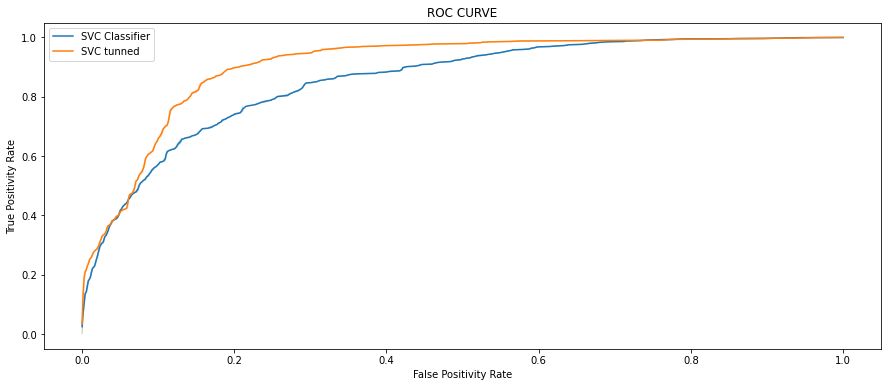

In [184]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['SVC','SVC tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for SVC')
sns.heatmap(train_confusion_matrix['SVC'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['SVC'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for SVC tunned')
sns.heatmap(train_confusion_matrix['SVC tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['SVC tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['SVC']
sns.lineplot(x = value[0], y = value[1], label = 'SVC Classifier')#ROC curve for untunned model
value=curve['SVC tunned']
sns.lineplot(x = value[0], y = value[1], label = 'SVC tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 5. XGB Classifier

In [132]:
# Creating a dictionary for model for passing in model built function
models = {'XGB Classifier'        : XGBClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       733
           1       0.92      0.79      0.85       707

    accuracy                           0.86      1440
   macro avg       0.87      0.86      0.86      1440
weighted avg       0.87      0.86      0.86      1440



In [133]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.822917   
1  Decision Tree Classifier tunned        0.998610       0.834722   
2              Logistic Regression        0.660954       0.671528   
3       Logistic Regression tunned        0.666281       0.679167   
4                              KNN        0.879111       0.816667   
5                       KNN tunned        1.000000       0.879861   
6                              SVC        0.789717       0.771528   
7                       SVC tunned        0.977999       0.846528   
8                   XGB Classifier        0.880269       0.863194   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.803763      1.000000     0.845827       1.000000   
1         0.999078        0.810596      0.998158     0.865629       0.998613   
2         0.659892        0.657258      0.672652     0.691655       0.660883   
3         0.665459        0.665765      0.676796     0.695898       0.666217   
4         0.820513        0.748597      0.972376     0.943423       0.878546   
5         1.000000        0.817857      1.000000     0.971711       1.000000   
6         0.816951        0.776316      0.750000     0.751061       0.789958   
7         0.973552        0.808376      0.982965     0.900990       0.977969   
8         0.945611        0.916667      0.808471     0.793494       0.880704   

   Test ROC AUC  Train F1   Test F1  
0      0.823323  1.000000  0.824259  
1      0.835270  0.998618  0.837209  
2      0.671885  0.666211  0.674018  
3      0.679463  0.671080  0.680498  
4      0.818915  0.890013  0.834793  
5      0.881490  1.000000  0.888171  
6      0.771165  0.782045  0.763480  
7      0.847494  0.978236  0.852174  
8      0.861958  0.871680  0.850644

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [90]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [91]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [3,  5,  7,  9,  11, 13]:
  for y in np.arange(0.0,40.0,5):
        models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [x],
                                                                    'gamma'   : [y]},  
                                                       )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [92]:
XGB_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0   XGB Classifier tunned        0.937934       0.891667         0.980323   
1   XGB Classifier tunned        0.999305       0.893750         1.000000   
2   XGB Classifier tunned        0.991200       0.893056         0.997204   
3   XGB Classifier tunned        0.959935       0.886806         0.987323   
4   XGB Classifier tunned        0.938397       0.886111         0.979859   
5   XGB Classifier tunned        0.922881       0.885417         0.967939   
6   XGB Classifier tunned        1.000000       0.889583         1.000000   
7   XGB Classifier tunned        0.910375       0.878472         0.960289   
8   XGB Classifier tunned        0.926123       0.879167         0.974885   
9   XGB Classifier tunned        0.901806       0.873611         0.955208   
10  XGB Classifier tunned        0.895785       0.870139         0.953158   
11  XGB Classifier tunned        0.894627       0.870139         0.950656   
12  XGB Classifier tunned        0.896480       0.868750         0.953709   
13  XGB Classifier tunned        0.889069       0.868056         0.947174   
14  XGB Classifier tunned        0.880269       0.866667         0.946092   
15  XGB Classifier tunned        0.870774       0.865278         0.931090   
16  XGB Classifier tunned        0.874711       0.865278         0.943448   
17  XGB Classifier tunned        0.880269       0.863194         0.945611   
18  XGB Classifier tunned        0.877258       0.862500         0.940451   
19  XGB Classifier tunned        0.868921       0.859028         0.932651   
20  XGB Classifier tunned        0.878648       0.859028         0.938298   
21  XGB Classifier tunned        0.873553       0.858333         0.941848   
22  XGB Classifier tunned        0.873784       0.857639         0.935259   
23  XGB Classifier tunned        0.860352       0.855556         0.929392   
24  XGB Classifier tunned        0.863363       0.854861         0.918076   
25  XGB Classifier tunned        0.863363       0.855556         0.930828   
26  XGB Classifier tunned        0.865910       0.854167         0.931240   
27  XGB Classifier tunned        0.851088       0.852083         0.904283   
28  XGB Classifier tunned        0.851088       0.852083         0.904283   
29  XGB Classifier tunned        0.845067       0.847222         0.885978   
30  XGB Classifier tunned        0.844141       0.848611         0.895932   
31  XGB Classifier tunned        0.857110       0.851389         0.924631   
47  XGB Classifier tunned        0.845994       0.846528         0.889406   
32  XGB Classifier tunned        0.845994       0.846528         0.889406   
34  XGB Classifier tunned        0.855257       0.848611         0.925702   
35  XGB Classifier tunned        0.855257       0.848611         0.925702   
33  XGB Classifier tunned        0.840667       0.843750         0.882080   
36  XGB Classifier tunned        0.854331       0.847917         0.918611   
37  XGB Classifier tunned        0.844604       0.843750         0.890276   
38  XGB Classifier tunned        0.845994       0.838889         0.881133   
39  XGB Classifier tunned        0.854099       0.845833         0.915858   
40  XGB Classifier tunned        0.850394       0.844444         0.914674   
41  XGB Classifier tunned        0.842983       0.839583         0.886646   
42  XGB Classifier tunned        0.841130       0.842361         0.921202   
43  XGB Classifier tunned        0.847615       0.842361         0.905246   
44  XGB Classifier tunned        0.819592       0.815972         0.852658   
45  XGB Classifier tunned        0.826077       0.825000         0.866048   
46  XGB Classifier tunned        0.800834       0.795833         0.827672   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.943639      0.894567     0.828854       0.938197      0.890553   
1         0.931464      0.998619     0.845827       0.999309      0.892900   
2         0.

In [93]:
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6         1.000000       0.889583         1.000000        0.913897   
1         0.999305       0.893750         1.000000        0.931464   
2         0.991200       0.893056         0.997204        0.930016   
3         0.959935       0.886806         0.987323        0.931746   
0         0.937934       0.891667         0.980323        0.943639   
4         0.938397       0.886111         0.979859        0.935795   
5         0.922881       0.885417         0.967939        0.939935   
8         0.926123       0.879167         0.974885        0.929147   
7         0.910375       0.878472         0.960289        0.936066   
15        0.870774       0.865278         0.931090        0.917073   
12        0.896480       0.868750         0.953709        0.927393   
29        0.845067       0.847222         0.885978        0.882261   
17        0.880269       0.863194         0.945611        0.916667   
38        0.845994       0.838889         0.881133        0.868217   
33        0.840667       0.843750         0.882080        0.877743   
32        0.845994       0.846528         0.889406        0.883281   
47        0.845994       0.846528         0.889406        0.883281   
9         0.901806       0.873611         0.955208        0.942664   
11        0.894627       0.870139         0.950656        0.934783   
10        0.895785       0.870139         0.953158        0.936242   
13        0.889069       0.868056         0.947174        0.932998   
16        0.874711       0.865278         0.943448        0.926789   
24        0.863363       0.854861         0.918076        0.905537   
30        0.844141       0.848611         0.895932        0.894992   
27        0.851088       0.852083         0.904283        0.903595   
28        0.851088       0.852083         0.904283        0.903595   
41        0.842983       0.839583         0.886646        0.877778   
37        0.844604       0.843750         0.890276        0.887460   
44        0.819592       0.815972         0.852658        0.835866   
14        0.880269       0.866667         0.946092        0.941681   
20        0.878648       0.859028         0.938298        0.925676   
18        0.877258       0.862500         0.940451        0.935043   
19        0.868921       0.859028         0.932651        0.930034   
22        0.873784       0.857639         0.935259        0.928328   
23        0.860352       0.855556         0.929392        0.925043   
21        0.873553       0.858333         0.941848        0.931389   
31        0.857110       0.851389         0.924631        0.918506   
36        0.854331       0.847917         0.918611        0.910774   
26        0.865910       0.854167         0.931240        0.924786   
43        0.847615       0.842361         0.905246        0.898671   
45        0.826077       0.825000         0.866048        0.864000   
35        0.855257       0.848611         0.925702        0.913706   
34        0.855257       0.848611         0.925702        0.913706   
25        0.863363       0.855556         0.930828        0.929432   
40        0.850394       0.844444         0.914674        0.907251   
39        0.854099       0.845833         0.915858        0.910321   
46        0.800834       0.795833         0.827672        0.815267   
42        0.841130       0.842361         0.921202        0.924028   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
6       1.000000     0.855728       1.000000      0.888983  1.000000   
1       0.998619     0.845827       0.999309      0.892900  0.999309   
2       0.985267     0.845827       0.991236      0.892218  0.991200   
3       0.932320     0.830269       0.960102      0.885803  0.959034   
0       0.894567     0.828854       0.938197      0.890553  0.935484   
4       0.895948     0.824611       0.938655      0.885020  0.936027   
5       0.875691     0.818953       0.923167      0.884238  0.919507 

In [134]:
#the best parameters
XGB_param_wise['Parameters'][2]

{'gamma': 0.0, 'max_depth': 9}

In [135]:
#Appending the the same to the main dataframe for future comparison
models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [9],
                                                                    'gamma'   : [0]},  
                                                       )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

XGBClassifier(max_depth=9, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       733
           1       0.93      0.85      0.89       707

    accuracy                           0.89      1440
   macro avg       0.90      0.89      0.89      1440
weighted avg       0.90      0.89      0.89      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
8         XGB Classifier        0.880269       0.863194         0.945611   
9  XGB Classifier tunned        0.991200       0.893056         0.997204   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
8        0.916667      0.808471     0.793494       0.880704      0.861958   
9        0.930016      0.985267     0.845827       0.991236      0.892218   

   Train F1   Test F1  
8   0.87168  0.850644  
9   0.99120  0.885926

Train and test confusion matrix for XGB Classifier


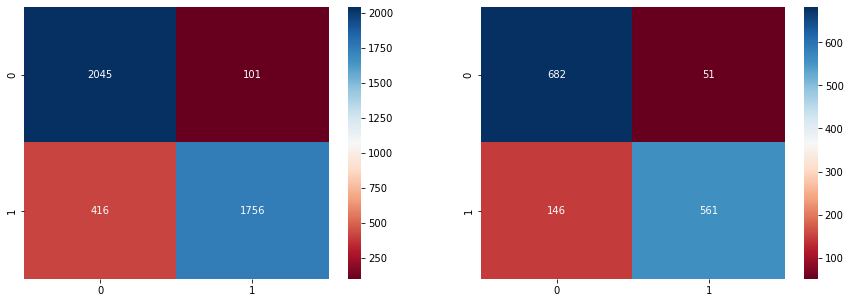

Train and test confusion matrix for XGB Classifier tunned


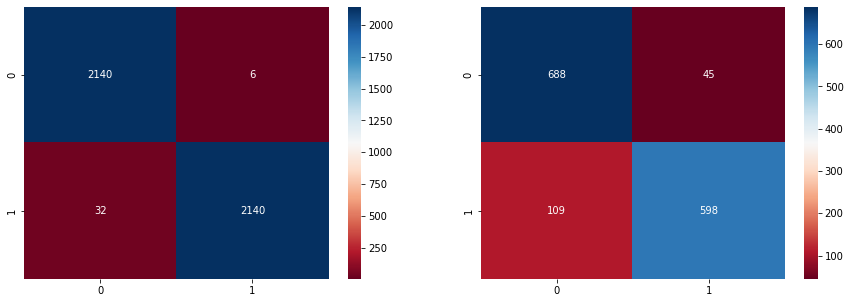

Text(0.5, 1.0, 'ROC CURVE')

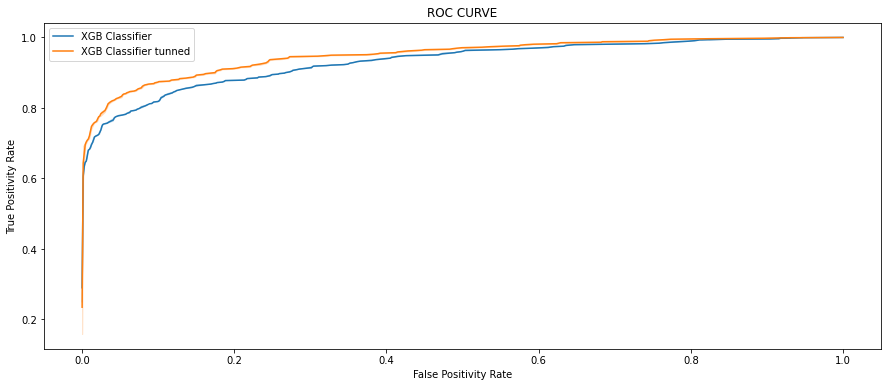

In [185]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['XGB Classifier','XGB Classifier tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for XGB Classifier')
sns.heatmap(train_confusion_matrix['XGB Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['XGB Classifier'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for XGB Classifier tunned')
sns.heatmap(train_confusion_matrix['XGB Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['XGB Classifier tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['XGB Classifier']
sns.lineplot(x = value[0], y = value[1], label = 'XGB Classifier')#ROC curve for untunned model
value=curve['XGB Classifier tunned']
sns.lineplot(x = value[0], y = value[1], label = 'XGB Classifier tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

## 6. RandomForest Classifier

In [137]:
# Creating a dictionary for model for passing in model built function
models = {'Random Forest' : RandomForestClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       733
           1       0.93      0.88      0.90       707

    accuracy                           0.90      1440
   macro avg       0.91      0.90      0.90      1440
weighted avg       0.91      0.90      0.90      1440



In [138]:
#Evaluation scores
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.822917   
1   Decision Tree Classifier tunned        0.998610       0.834722   
2               Logistic Regression        0.660954       0.671528   
3        Logistic Regression tunned        0.666281       0.679167   
4                               KNN        0.879111       0.816667   
5                        KNN tunned        1.000000       0.879861   
6                               SVC        0.789717       0.771528   
7                        SVC tunned        0.977999       0.846528   
8                    XGB Classifier        0.880269       0.863194   
9             XGB Classifier tunned        0.991200       0.893056   
10                    Random Forest        1.000000       0.904861   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.803763      1.000000     0.845827       1.000000   
1          0.999078        0.810596      0.998158     0.865629       0.998613   
2          0.659892        0.657258      0.672652     0.691655       0.660883   
3          0.665459        0.665765      0.676796     0.695898       0.666217   
4          0.820513        0.748597      0.972376     0.943423       0.878546   
5          1.000000        0.817857      1.000000     0.971711       1.000000   
6          0.816951        0.776316      0.750000     0.751061       0.789958   
7          0.973552        0.808376      0.982965     0.900990       0.977969   
8          0.945611        0.916667      0.808471     0.793494       0.880704   
9          0.997204        0.930016      0.985267     0.845827       0.991236   
10         1.000000        0.926647      1.000000     0.875530       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.823323  1.000000  0.824259  
1       0.835270  0.998618  0.837209  
2       0.671885  0.666211  0.674018  
3       0.679463  0.671080  0.680498  
4       0.818915  0.890013  0.834793  
5       0.881490  1.000000  0.888171  
6       0.771165  0.782045  0.763480  
7       0.847494  0.978236  0.852174  
8       0.861958  0.871680  0.850644  
9       0.892218  0.991200  0.885926  
10      0.904341  1.000000  0.900364

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [99]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [100]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in ['entropy', 'gini']:
  for y in [6,9,11,15,17,19,21,24]:
    for z in [50,100]:
      for a in ["auto", "sqrt", "log2",None,1,3,5,7]:
        models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': [x],
                                                                'max_depth': [y],
                                                                'n_estimators': [z],
                                                                'max_features': [a] },
                                                          cv = 3)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)          

In [101]:
Random_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0    Random Classifier tunned        1.000000       0.908333         1.000000   
1    Random Classifier tunned        0.997684       0.910417         0.996783   
2    Random Classifier tunned        1.000000       0.906944         1.000000   
3    Random Classifier tunned        1.000000       0.906944         1.000000   
4    Random Classifier tunned        1.000000       0.906250         1.000000   
..                        ...             ...            ...              ...   
250  Random Classifier tunned        0.841130       0.824306         0.911863   
251  Random Classifier tunned        0.842751       0.822917         0.897709   
252  Random Classifier tunned        0.823066       0.814583         0.822049   
253  Random Classifier tunned        0.843214       0.820833         0.917365   
254  Random Classifier tunned        0.826077       0.811111         0.822515   

     Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0          0.928465      1.000000     0.881188       1.000000      0.907852   
1          0.923754      0.998619     0.891089       0.997678      0.910074   
2          0.928251      1.000000     0.878359       1.000000      0.906437   
3          0.928251      1.000000     0.878359       1.000000      0.906437   
4          0.923077      1.000000     0.882603       1.000000      0.905831   
..              ...           ...          ...            ...           ...   
250        0.886054      0.757366     0.736917       0.841638      0.822756   
251        0.858730      0.775783     0.765205       0.843157      0.821893   
252        0.808123      0.827348     0.816124       0.823040      0.814611   
253        0.882453      0.756446     0.732673       0.843740      0.819270   
254        0.802503      0.834254     0.816124       0.826027      0.811200   

      Test F1  ...  Test Accuracy Rank Train Precision Rank  \
0    0.904209  ...               255.0                205.0   
1    0.907127  ...               256.0                124.5   
2    0.902616  ...               253.5                205.0   
3    0.902616  ...               253.5                205.0   
4    0.902386  ...               249.0                205.0   
..        ...  ...                 ...                  ...   
250  0.804633  ...                 9.0                 26.0   
251  0.809274  ...                 6.0                 22.0   
252  0.812104  ...                 2.0                  1.0   
253  0.800618  ...                 4.5                 30.0   
254  0.809257  ...                 1.0                  2.0   

     Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0                  252.0              202.0             245.5   
1                  232.0              118.0             256.0   
2                  250.5              202.0             225.5   
3                  250.5              202.0             225.5   
4                  228.5              202.0             250.5   
..                   ...                ...               ...   
250                 37.0                4.0               4.0   
251                 21.0                9.0              10.0   
252                  2.0               29.0              30.0   
253                 34.0                2.0               1.5   
254                  1.0               32.0              30.0   

     Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank  \
0                 208.5              255.0          208.5         255.0   
1                 124.5              256.0          124.5         256.0   
2                 208.5              253.5          208.5         253.5   
3                 208.5              253.5          208.5         253.5   
4                 208.5              251.5          208.5         251.5   
..                  ...                ...            ...           ...   
250                10.0                

In [102]:
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
1         0.997684       0.910417         0.996783        0.923754   
20        1.000000       0.905556         1.000000        0.916788   
24        1.000000       0.904861         1.000000        0.916667   
45        1.000000       0.901389         1.000000        0.912409   
4         1.000000       0.906250         1.000000        0.923077   
5         1.000000       0.906250         1.000000        0.923077   
23        1.000000       0.904167         1.000000        0.918999   
0         1.000000       0.908333         1.000000        0.928465   
36        1.000000       0.902778         1.000000        0.917526   
9         1.000000       0.905556         1.000000        0.922963   
10        1.000000       0.905556         1.000000        0.922963   
11        1.000000       0.905556         1.000000        0.922963   
44        1.000000       0.901389         1.000000        0.914831   
18        1.000000       0.904861         1.000000        0.922849   
35        1.000000       0.902778         1.000000        0.918759   
19        1.000000       0.904861         1.000000        0.922849   
34        1.000000       0.902778         1.000000        0.918759   
12        0.999537       0.905556         1.000000        0.924220   
8         1.000000       0.906250         1.000000        0.925595   
7         1.000000       0.906250         1.000000        0.925595   
6         1.000000       0.906250         1.000000        0.925595   
15        1.000000       0.905556         1.000000        0.925484   
17        1.000000       0.905556         1.000000        0.925484   
43        0.996758       0.901389         0.995864        0.917282   
39        1.000000       0.902083         1.000000        0.918639   
40        1.000000       0.902083         1.000000        0.918639   
3         1.000000       0.906944         1.000000        0.928251   
2         1.000000       0.906944         1.000000        0.928251   
31        0.998147       0.903472         0.997700        0.921365   
16        1.000000       0.905556         1.000000        0.925484   
33        1.000000       0.903472         1.000000        0.922619   
42        1.000000       0.902083         1.000000        0.919881   
41        1.000000       0.902083         1.000000        0.919881   
26        1.000000       0.904167         1.000000        0.923994   
32        1.000000       0.903472         1.000000        0.922619   
25        0.999537       0.904167         0.999540        0.923994   
27        0.999537       0.904167         0.999540        0.923994   
28        1.000000       0.904167         1.000000        0.923994   
22        1.000000       0.904861         1.000000        0.925373   
21        1.000000       0.904861         1.000000        0.925373   
30        1.000000       0.904167         1.000000        0.925262   
29        1.000000       0.904167         1.000000        0.925262   
14        1.000000       0.906250         1.000000        0.929429   
13        1.000000       0.906250         1.000000        0.929429   
48        0.999305       0.901389         0.998621        0.921013   
49        1.000000       0.901389         1.000000        0.921013   
37        0.999305       0.904167         0.999080        0.929110   
38        0.999305       0.904167         0.999080        0.929110   
46        0.999768       0.902083         0.999540        0.926205   
47        0.999768       0.902083         0.999540        0.926205   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
1       0.998619     0.891089       0.997678      0.910074  0.997700   
20      1.000000     0.888260       1.000000      0.905249  1.000000   
24      1.000000     0.886846       1.000000      0.904542  1.000000   
45      1.000000     0.884017       1.000000      0.901081  1.000000   
4       1.000000     0.882603       1.000000      0.905831  1.000000   
5

In [139]:
#the best parameters
Random_param_wise['Parameters'][1]

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 1,
 'n_estimators': 50}

In [188]:
#Appending the the same to the main dataframe for future comparison
models = {'Random Forest tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy'],
                                                                'max_depth': [17],
                                                                'n_estimators': [50],
                                                                'max_features': [1] },
                                                          cv = 3)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=1,
                       n_estimators=50, random_state=42)
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       733
           1       0.92      0.89      0.91       707

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



Model  Train Accuracy  Test Accuracy  Train Precision  \
10         Random Forest        1.000000       0.904861         1.000000   
11  Random Forest tunned        0.997684       0.910417         0.996783   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
10        0.926647      1.000000     0.875530       1.000000      0.904341   
11        0.923754      0.998619     0.891089       0.997678      0.910074   

    Train F1   Test F1  
10    1.0000  0.900364  
11    0.9977  0.907127

Train and test confusion matrix for Random Forest Classifier


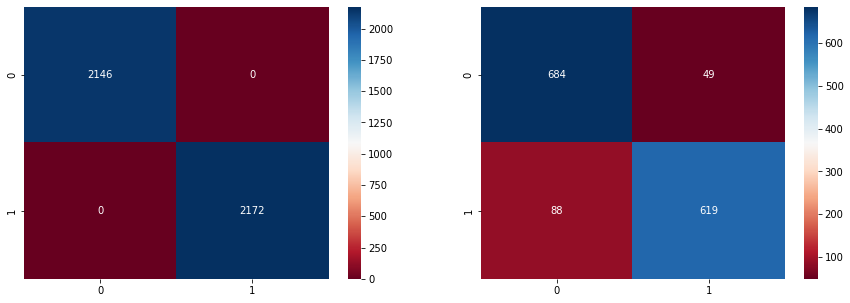

Train and test confusion matrix for Random Forest Classifier tunned


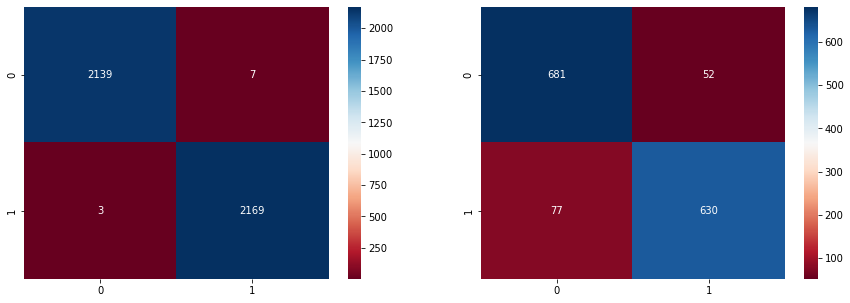

Text(0.5, 1.0, 'ROC CURVE')

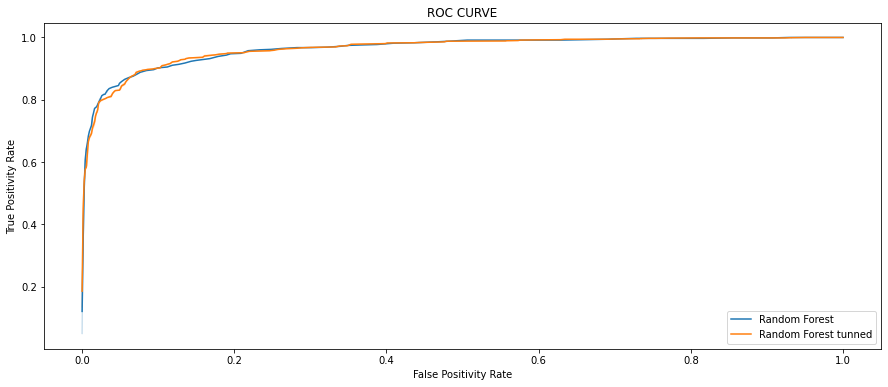

In [189]:
#Summarising evaluation
display(model_df[model_df['Model'].isin(['Random Forest','Random Forest tunned'])])
#Confusion matrix heat map
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Random Forest Classifier')
sns.heatmap(train_confusion_matrix['Random Forest'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Random Forest'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#Confusion matrix heat map for tunned model
fig, axes = plt.subplots(1,2,figsize=(15,5))
print('Train and test confusion matrix for Random Forest Classifier tunned')
sns.heatmap(train_confusion_matrix['Random Forest tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[0])
sns.heatmap(test_confusion_matrix['Random Forest tunned'], cmap='RdBu', annot=True, fmt='d',ax=axes[1])
plt.show()
#ROC curve
plt.figure(figsize=(15,6))
value=curve['Random Forest']
sns.lineplot(x = value[0], y = value[1], label = 'Random Forest')#ROC curve for untunned model
value=curve['Random Forest tunned']
sns.lineplot(x = value[0], y = value[1], label = 'Random Forest tunned')#ROC curve for tunned model
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Results and Conclusion :**

In [190]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.822917   
1   Decision Tree Classifier tunned        0.998610       0.834722   
2               Logistic Regression        0.660954       0.671528   
3        Logistic Regression tunned        0.666281       0.679167   
4                               KNN        0.879111       0.816667   
5                        KNN tunned        1.000000       0.879861   
6                               SVC        0.789717       0.771528   
7                        SVC tunned        0.977999       0.846528   
8                    XGB Classifier        0.880269       0.863194   
9             XGB Classifier tunned        0.991200       0.893056   
10                    Random Forest        1.000000       0.904861   
11             Random Forest tunned        0.997684       0.910417   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.803763      1.000000     0.845827       1.000000   
1          0.999078        0.810596      0.998158     0.865629       0.998613   
2          0.659892        0.657258      0.672652     0.691655       0.660883   
3          0.665459        0.665765      0.676796     0.695898       0.666217   
4          0.820513        0.748597      0.972376     0.943423       0.878546   
5          1.000000        0.817857      1.000000     0.971711       1.000000   
6          0.816951        0.776316      0.750000     0.751061       0.789958   
7          0.973552        0.808376      0.982965     0.900990       0.977969   
8          0.945611        0.916667      0.808471     0.793494       0.880704   
9          0.997204        0.930016      0.985267     0.845827       0.991236   
10         1.000000        0.926647      1.000000     0.875530       1.000000   
11         0.996783        0.923754      0.998619     0.891089       0.997678   

    Test ROC AUC  Train F1   Test F1  
0       0.823323  1.000000  0.824259  
1       0.835270  0.998618  0.837209  
2       0.671885  0.666211  0.674018  
3       0.679463  0.671080  0.680498  
4       0.818915  0.890013  0.834793  
5       0.881490  1.000000  0.888171  
6       0.771165  0.782045  0.763480  
7       0.847494  0.978236  0.852174  
8       0.861958  0.871680  0.850644  
9       0.892218  0.991200  0.885926  
10      0.904341  1.000000  0.900364  
11      0.910074  0.997700  0.907127

Text(0.5, 1.0, 'ROC CURVE')

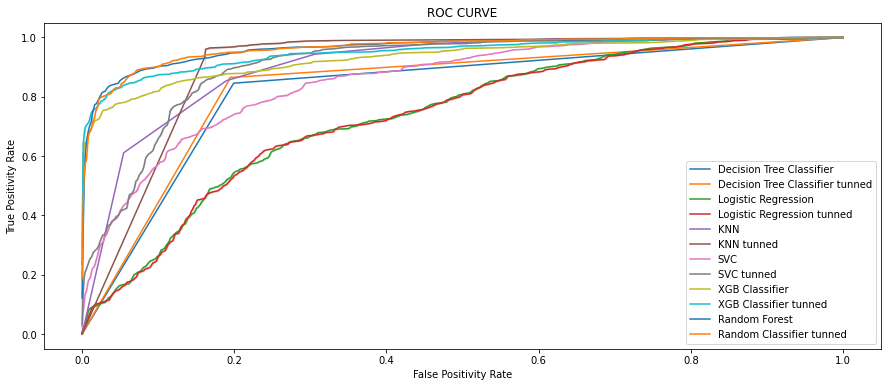

In [145]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.